In [1]:
%cd /ocean/projects/atm200007p/jlin96/nnspreadtesting_good

/ocean/projects/atm200007p/jlin96/nnspreadtesting_good


In [2]:
!pwd

/ocean/projects/atm200007p/jlin96/nnspreadtesting_good


In [3]:
!hostname

r271.ib.bridges2.psc.edu


In [4]:
import numpy as np
import pandas as pd
import xarray as xr
from scipy import stats
import scipy
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.pylab as plb
from scipy.stats import ranksums
import os
import pickle
from scipy.stats import norm
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
from scipy.stats import gaussian_kde
from scipy.signal import argrelextrema
from matplotlib.lines import Line2D
from collections import Counter

from tqdm import tqdm

from preprocessing_functions import *

In [5]:
color_dict = {
    'standard': 'silver',
    'specific': 'lime',
    'nomemory': 'red',
    'nowind': 'green',
    'noozone': 'purple',
    'nocoszrs': 'orange',
    'mae': 'pink',
    'nodropout': 'blue',
    'multiclimate': 'gold'
}

color_dict2 = {
    'standard': 'silver',
    'specific': 'lime',
    'no memory': 'red',
    'no wind': 'green',
    'no ozone': 'purple',
    'no zenith angle': 'orange',
    'MAE':'pink',
    'no dropout': 'blue',
    'multiclimate': 'gold'
}

label_dict = {
    'standard': 'standard',
    'specific': 'specific humidity',
    'nomemory': 'no memory',
    'nowind': 'no wind',
    'noozone': 'no ozone',
    'nocoszrs': 'no zenith angle',
    'mae': 'MAE',
    'nodropout': 'no dropout',
    'multiclimate': 'multiclimate'
}

config_names = ['standard', 'specific humidity', 'no memory', 'no wind', 'no ozone', 'no zenith angle', 'MAE', 'no dropout', 'multiclimate']

average_heating_rmse = 4.567616448322416e-05
average_moistening_rmse = 2.8896629675143484e-05
martingale_heating_rmse = 3.1405422356850924e-05
martingale_moistening_rmse = 2.9224563847088255e-05
mlr_heating_rmse = 2.600916471955618e-05
mlr_moistening_rmse = 2.229119069533864e-05

def get_model_info(config_name):
    model_info = pd.read_pickle(f'{config_name}/coupling_folder/{config_name}_df.pandas.pkl')
    with open(f'{config_name}/coupling_folder/prognostic_T.pkl', 'rb') as f:
        prognostic_T = pickle.load(f)
    with open(f'{config_name}/coupling_folder/prognostic_Q.pkl', 'rb') as f:
        prognostic_Q = pickle.load(f)
    return model_info, prognostic_T, prognostic_Q

def get_drift_col(prognostic_diffs, model_info, name, threshold):
    return pd.Series([sum(prognostic_diffs[x]>threshold)!=0 for x in prognostic_diffs], name = name, index = model_info.index)

standard_model_info, standard_prognostic_T, standard_prognostic_Q = get_model_info('standard')
specific_model_info, specific_prognostic_T, specific_prognostic_Q = get_model_info('specific')
nomemory_model_info, nomemory_prognostic_T, nomemory_prognostic_Q = get_model_info('nomemory')
nowind_model_info, nowind_prognostic_T, nowind_prognostic_Q = get_model_info('nowind')
noozone_model_info, noozone_prognostic_T, noozone_prognostic_Q = get_model_info('noozone')
nocoszrs_model_info, nocoszrs_prognostic_T, nocoszrs_prognostic_Q = get_model_info('nocoszrs')
mae_model_info, mae_prognostic_T, mae_prognostic_Q = get_model_info('mae')
nodropout_model_info, nodropout_prognostic_T, nodropout_prognostic_Q = get_model_info('nodropout')
multiclimate_model_info, multiclimate_prognostic_T, multiclimate_prognostic_Q = get_model_info('multiclimate')

standard_model_info['offline_heating'] = standard_model_info['offline_heating']*86400
specific_model_info['offline_heating'] = specific_model_info['offline_heating']*86400
nomemory_model_info['offline_heating'] = nomemory_model_info['offline_heating']*86400
nowind_model_info['offline_heating'] = nowind_model_info['offline_heating']*86400
noozone_model_info['offline_heating'] = noozone_model_info['offline_heating']*86400
nocoszrs_model_info['offline_heating'] = nocoszrs_model_info['offline_heating']*86400
mae_model_info['offline_heating'] = mae_model_info['offline_heating']*86400
nodropout_model_info['offline_heating'] = nodropout_model_info['offline_heating']*86400
multiclimate_model_info['offline_heating'] = multiclimate_model_info['offline_heating']*86400

standard_model_info['offline_heating_2x'] = standard_model_info['offline_heating_2x']*86400
specific_model_info['offline_heating_2x'] = specific_model_info['offline_heating_2x']*86400
nomemory_model_info['offline_heating_2x'] = nomemory_model_info['offline_heating_2x']*86400
nowind_model_info['offline_heating_2x'] = nowind_model_info['offline_heating_2x']*86400
noozone_model_info['offline_heating_2x'] = noozone_model_info['offline_heating_2x']*86400
nocoszrs_model_info['offline_heating_2x'] = nocoszrs_model_info['offline_heating_2x']*86400
mae_model_info['offline_heating_2x'] = mae_model_info['offline_heating_2x']*86400
nodropout_model_info['offline_heating_2x'] = nodropout_model_info['offline_heating_2x']*86400
multiclimate_model_info['offline_heating_2x'] = multiclimate_model_info['offline_heating_2x']*86400

standard_model_info['offline_heating_4x'] = standard_model_info['offline_heating_4x']*86400
specific_model_info['offline_heating_4x'] = specific_model_info['offline_heating_4x']*86400
nomemory_model_info['offline_heating_4x'] = nomemory_model_info['offline_heating_4x']*86400
nowind_model_info['offline_heating_4x'] = nowind_model_info['offline_heating_4x']*86400
noozone_model_info['offline_heating_4x'] = noozone_model_info['offline_heating_4x']*86400
nocoszrs_model_info['offline_heating_4x'] = nocoszrs_model_info['offline_heating_4x']*86400
mae_model_info['offline_heating_4x'] = mae_model_info['offline_heating_4x']*86400
nodropout_model_info['offline_heating_4x'] = nodropout_model_info['offline_heating_4x']*86400
multiclimate_model_info['offline_heating_4x'] = multiclimate_model_info['offline_heating_4x']*86400

standard_model_info['offline_heating_multi'] = standard_model_info['offline_heating_multi']*86400
specific_model_info['offline_heating_multi'] = specific_model_info['offline_heating_multi']*86400
nomemory_model_info['offline_heating_multi'] = nomemory_model_info['offline_heating_multi']*86400
nowind_model_info['offline_heating_multi'] = nowind_model_info['offline_heating_multi']*86400
noozone_model_info['offline_heating_multi'] = noozone_model_info['offline_heating_multi']*86400
nocoszrs_model_info['offline_heating_multi'] = nocoszrs_model_info['offline_heating_multi']*86400
mae_model_info['offline_heating_multi'] = mae_model_info['offline_heating_multi']*86400
nodropout_model_info['offline_heating_multi'] = nodropout_model_info['offline_heating_multi']*86400
multiclimate_model_info['offline_heating_multi'] = multiclimate_model_info['offline_heating_multi']*86400

standard_model_info['offline_moistening'] = standard_model_info['offline_moistening']*86400
specific_model_info['offline_moistening'] = specific_model_info['offline_moistening']*86400
nomemory_model_info['offline_moistening'] = nomemory_model_info['offline_moistening']*86400
nowind_model_info['offline_moistening'] = nowind_model_info['offline_moistening']*86400
noozone_model_info['offline_moistening'] = noozone_model_info['offline_moistening']*86400
nocoszrs_model_info['offline_moistening'] = nocoszrs_model_info['offline_moistening']*86400
mae_model_info['offline_moistening'] = mae_model_info['offline_moistening']*86400
nodropout_model_info['offline_moistening'] = nodropout_model_info['offline_moistening']*86400
multiclimate_model_info['offline_moistening'] = multiclimate_model_info['offline_moistening']*86400

standard_model_info['offline_moistening_2x'] = standard_model_info['offline_moistening_2x']*86400
specific_model_info['offline_moistening_2x'] = specific_model_info['offline_moistening_2x']*86400
nomemory_model_info['offline_moistening_2x'] = nomemory_model_info['offline_moistening_2x']*86400
nowind_model_info['offline_moistening_2x'] = nowind_model_info['offline_moistening_2x']*86400
noozone_model_info['offline_moistening_2x'] = noozone_model_info['offline_moistening_2x']*86400
nocoszrs_model_info['offline_moistening_2x'] = nocoszrs_model_info['offline_moistening_2x']*86400
mae_model_info['offline_moistening_2x'] = mae_model_info['offline_moistening_2x']*86400
nodropout_model_info['offline_moistening_2x'] = nodropout_model_info['offline_moistening_2x']*86400
multiclimate_model_info['offline_moistening_2x'] = multiclimate_model_info['offline_moistening_2x']*86400

standard_model_info['offline_moistening_4x'] = standard_model_info['offline_moistening_4x']*86400
specific_model_info['offline_moistening_4x'] = specific_model_info['offline_moistening_4x']*86400
nomemory_model_info['offline_moistening_4x'] = nomemory_model_info['offline_moistening_4x']*86400
nowind_model_info['offline_moistening_4x'] = nowind_model_info['offline_moistening_4x']*86400
noozone_model_info['offline_moistening_4x'] = noozone_model_info['offline_moistening_4x']*86400
nocoszrs_model_info['offline_moistening_4x'] = nocoszrs_model_info['offline_moistening_4x']*86400
mae_model_info['offline_moistening_4x'] = mae_model_info['offline_moistening_4x']*86400
nodropout_model_info['offline_moistening_4x'] = nodropout_model_info['offline_moistening_4x']*86400
multiclimate_model_info['offline_moistening_4x'] = multiclimate_model_info['offline_moistening_4x']*86400

standard_model_info['offline_moistening_multi'] = standard_model_info['offline_moistening_multi']*86400
specific_model_info['offline_moistening_multi'] = specific_model_info['offline_moistening_multi']*86400
nomemory_model_info['offline_moistening_multi'] = nomemory_model_info['offline_moistening_multi']*86400
nowind_model_info['offline_moistening_multi'] = nowind_model_info['offline_moistening_multi']*86400
noozone_model_info['offline_moistening_multi'] = noozone_model_info['offline_moistening_multi']*86400
nocoszrs_model_info['offline_moistening_multi'] = nocoszrs_model_info['offline_moistening_multi']*86400
mae_model_info['offline_moistening_multi'] = mae_model_info['offline_moistening_multi']*86400
nodropout_model_info['offline_moistening_multi'] = nodropout_model_info['offline_moistening_multi']*86400
multiclimate_model_info['offline_moistening_multi'] = multiclimate_model_info['offline_moistening_multi']*86400

config_dict = {
    'standard': standard_model_info,
    'specific': specific_model_info,
    'nomemory': nomemory_model_info,
    'nowind': nowind_model_info,
    'noozone': noozone_model_info,
    'nocoszrs': nocoszrs_model_info,
    'mae': mae_model_info,
    'nodropout': nodropout_model_info,
    'multiclimate': multiclimate_model_info
}

survived_dict = {
    'standard': standard_model_info[standard_model_info['num_months']==12].copy(),
    'specific': specific_model_info[specific_model_info['num_months']==12].copy(),
    'nomemory': nomemory_model_info[nomemory_model_info['num_months']==12].copy(),
    'nowind': nowind_model_info[nowind_model_info['num_months']==12].copy(),
    'noozone': noozone_model_info[noozone_model_info['num_months']==12].copy(),
    'nocoszrs': nocoszrs_model_info[nocoszrs_model_info['num_months']==12].copy(),
    'mae': mae_model_info[mae_model_info['num_months']==12].copy(),
    'nodropout': nodropout_model_info[nodropout_model_info['num_months']==12].copy(),
    'multiclimate': multiclimate_model_info[multiclimate_model_info['num_months']==12].copy()
}

for config_name in survived_dict:
    survived_dict[config_name].loc[:, 'config_name'] = config_name

for config_name in config_dict:
    config_dict[config_name].loc[:, 'config_name'] = config_name

combined_df = pd.concat([survived_dict['standard'], \
                         survived_dict['specific'], \
                         survived_dict['nomemory'], \
                         survived_dict['nowind'], \
                         survived_dict['noozone'], \
                         survived_dict['nocoszrs'], \
                         survived_dict['mae'], \
                         survived_dict['nodropout'], \
                         survived_dict['multiclimate']])

combined_df_complete = pd.concat([config_dict['standard'], \
                                  config_dict['specific'], \
                                  config_dict['nomemory'], \
                                  config_dict['nowind'], \
                                  config_dict['noozone'], \
                                  config_dict['nocoszrs'], \
                                  config_dict['mae'], \
                                  config_dict['nodropout'], \
                                  config_dict['multiclimate']])

combined_df_complete['stable'] = combined_df_complete['num_months']==12

combined_df_dropout = combined_df[combined_df['config_name']!='nodropout']

combined_df_dropout_complete = combined_df_complete[combined_df_complete['config_name']!='nodropout']

online_temperature_overall = pd.concat([survived_dict['standard']['online_temperature'], \
                                        survived_dict['specific']['offline_moistening'], \
                                        survived_dict['nomemory']['online_temperature'], \
                                        survived_dict['nowind']['online_temperature'], \
                                        survived_dict['noozone']['online_temperature'], \
                                        survived_dict['nocoszrs']['online_temperature'], \
                                        survived_dict['mae']['online_temperature'], \
                                        survived_dict['nodropout']['online_temperature'], \
                                        survived_dict['multiclimate']['online_temperature']], axis = 0)
                            
online_moisture_overall = pd.concat([survived_dict['standard']['online_moisture'], \
                                     survived_dict['specific']['offline_moistening'], \
                                     survived_dict['nomemory']['online_moisture'], \
                                     survived_dict['nowind']['online_moisture'], \
                                     survived_dict['noozone']['online_moisture'], \
                                     survived_dict['nocoszrs']['online_moisture'], \
                                     survived_dict['mae']['online_moisture'], \
                                     survived_dict['nodropout']['online_moisture'], \
                                     survived_dict['multiclimate']['online_moisture']], axis = 0)

median_online_diff_T = [np.median(survived_dict['specific']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), \
                        np.median(survived_dict['nomemory']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), \
                        np.median(survived_dict['nowind']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), \
                        np.median(survived_dict['noozone']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), \
                        np.median(survived_dict['nocoszrs']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), \
                        np.median(survived_dict['mae']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), \
                        np.median(survived_dict['nodropout']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), \
                        np.median(survived_dict['multiclimate']['online_temperature']) - np.median(survived_dict['standard']['online_temperature'])]

median_online_diff_Q = [np.median(survived_dict['specific']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), \
                        np.median(survived_dict['nomemory']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), \
                        np.median(survived_dict['nowind']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), \
                        np.median(survived_dict['noozone']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), \
                        np.median(survived_dict['nocoszrs']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), \
                        np.median(survived_dict['mae']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), \
                        np.median(survived_dict['nodropout']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), \
                        np.median(survived_dict['multiclimate']['online_moisture']) - np.median(survived_dict['standard']['online_moisture'])]

mean_offline_diff_T = [np.mean(specific_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), \
                       np.mean(nomemory_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), \
                       np.mean(nowind_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), \
                       np.mean(noozone_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), \
                       np.mean(nocoszrs_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), \
                       np.mean(mae_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), \
                       np.mean(nodropout_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), \
                       np.mean(multiclimate_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating'])]

mean_offline_diff_Q = [np.mean(specific_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), \
                       np.mean(nomemory_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), \
                       np.mean(nowind_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), \
                       np.mean(noozone_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), \
                       np.mean(nocoszrs_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), \
                       np.mean(mae_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), \
                       np.mean(nodropout_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), \
                       np.mean(multiclimate_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening'])]

def get_top_models(config_name):
    top_models = set(sorted(list(survived_dict[config_name].sort_values('online_temperature').head().index) + list(survived_dict[config_name].sort_values('online_moisture').head().index)))
    print(len(top_models))
    return top_models

# Offline story

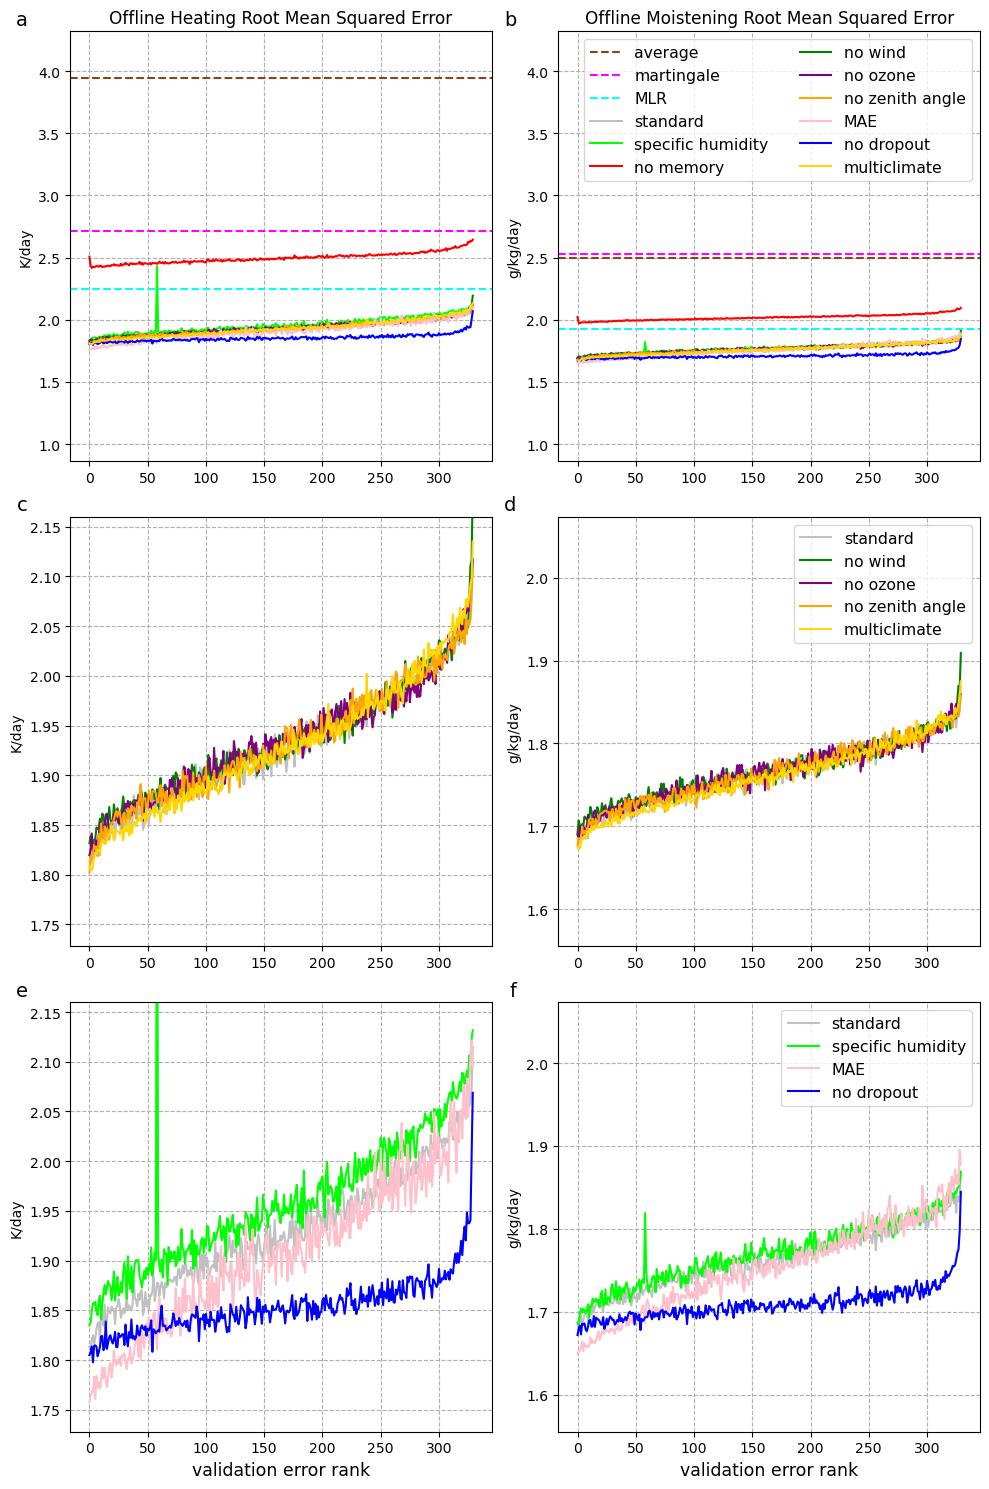

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))
title_fontsize = 12.1

heating_standard, = axs[0,0].plot(np.arange(330), standard_model_info['offline_heating'], color = color_dict['standard'], label='standard')
heating_specific = axs[0,0].plot(np.arange(330), specific_model_info['offline_heating'], color = color_dict['specific'], label='specific humidity')
heating_nomemory, = axs[0,0].plot(np.arange(330), nomemory_model_info['offline_heating'], color = color_dict['nomemory'], label='no memory')
heating_nowind, = axs[0,0].plot(np.arange(330), nowind_model_info['offline_heating'], color = color_dict['nowind'], label='no wind')
heating_noozone, = axs[0,0].plot(np.arange(330), noozone_model_info['offline_heating'], color = color_dict['noozone'], label='no ozone')
heating_nocoszrs, = axs[0,0].plot(np.arange(330), nocoszrs_model_info['offline_heating'], color = color_dict['nocoszrs'], label='no zenith angle')
heating_mae, = axs[0,0].plot(np.arange(330), mae_model_info['offline_heating'], color = color_dict['mae'], label='MAE')
heating_nodropout, = axs[0,0].plot(np.arange(330), nodropout_model_info['offline_heating'], color = color_dict['nodropout'], label='no dropout')
heating_multiclimate, = axs[0,0].plot(np.arange(330), multiclimate_model_info['offline_heating'], color = color_dict['multiclimate'], label='multiclimate')

heating_standard, = axs[1,0].plot(np.arange(330), standard_model_info['offline_heating'], color = color_dict['standard'], label='standard')
heating_nowind, = axs[1,0].plot(np.arange(330), nowind_model_info['offline_heating'], color = color_dict['nowind'], label='no wind')
heating_noozone, = axs[1,0].plot(np.arange(330), noozone_model_info['offline_heating'], color = color_dict['noozone'], label='no ozone')
heating_nocoszrs, = axs[1,0].plot(np.arange(330), nocoszrs_model_info['offline_heating'], color = color_dict['nocoszrs'], label='no zenith angle')
heating_multiclimate, = axs[1,0].plot(np.arange(330), multiclimate_model_info['offline_heating'], color = color_dict['multiclimate'], label='multiclimate')

heating_standard, = axs[2,0].plot(np.arange(330), standard_model_info['offline_heating'], color = color_dict['standard'], label='standard')
heating_specific = axs[2,0].plot(np.arange(330), specific_model_info['offline_heating'], color = color_dict['specific'], label='specific humidity')
heating_mae, = axs[2,0].plot(np.arange(330), mae_model_info['offline_heating'], color = color_dict['mae'], label='MAE')
heating_nodropout, = axs[2,0].plot(np.arange(330), nodropout_model_info['offline_heating'], color = color_dict['nodropout'], label='no dropout')

moistening_standard, = axs[0,1].plot(np.arange(330), standard_model_info['offline_moistening'], color = color_dict['standard'], label='standard')
moistening_specific, = axs[0,1].plot(np.arange(330), specific_model_info['offline_moistening'], color = color_dict['specific'], label='specific humidity')
moistening_nomemory, = axs[0,1].plot(np.arange(330), nomemory_model_info['offline_moistening'], color = color_dict['nomemory'], label='no memory')
moistening_nowind, = axs[0,1].plot(np.arange(330), nowind_model_info['offline_moistening'], color = color_dict['nowind'], label='no wind')
moistening_noozone, = axs[0,1].plot(np.arange(330), noozone_model_info['offline_moistening'], color = color_dict['noozone'], label='no ozone')
moistening_nocoszrs, = axs[0,1].plot(np.arange(330), nocoszrs_model_info['offline_moistening'], color = color_dict['nocoszrs'], label='no zenith angle')
moistening_mae, = axs[0,1].plot(np.arange(330), mae_model_info['offline_moistening'], color = color_dict['mae'], label='MAE')
moistening_nodropout, = axs[0,1].plot(np.arange(330), nodropout_model_info['offline_moistening'], color = color_dict['nodropout'], label='no dropout')
moistening_multiclimate, = axs[0,1].plot(np.arange(330), multiclimate_model_info['offline_moistening'], color = color_dict['multiclimate'], label='multiclimate')

moistening_standard, = axs[1,1].plot(np.arange(330), standard_model_info['offline_moistening'], color = color_dict['standard'], label='standard')
moistening_nowind, = axs[1,1].plot(np.arange(330), nowind_model_info['offline_moistening'], color = color_dict['nowind'], label='no wind')
moistening_noozone, = axs[1,1].plot(np.arange(330), noozone_model_info['offline_moistening'], color = color_dict['noozone'], label='no ozone')
moistening_nocoszrs, = axs[1,1].plot(np.arange(330), nocoszrs_model_info['offline_moistening'], color = color_dict['nocoszrs'], label='no zenith angle')
moistening_multiclimate, = axs[1,1].plot(np.arange(330), multiclimate_model_info['offline_moistening'], color = color_dict['multiclimate'], label='multiclimate')

moistening_standard, = axs[2,1].plot(np.arange(330), standard_model_info['offline_moistening'], color = color_dict['standard'], label='standard')
moistening_specific, = axs[2,1].plot(np.arange(330), specific_model_info['offline_moistening'], color = color_dict['specific'], label='specific humidity')
moistening_mae, = axs[2,1].plot(np.arange(330), mae_model_info['offline_moistening'], color = color_dict['mae'], label='MAE')
moistening_nodropout, = axs[2,1].plot(np.arange(330), nodropout_model_info['offline_moistening'], color = color_dict['nodropout'], label='no dropout')

axs[0,0].yaxis.get_offset_text().set_size(8) 
axs[0,0].set_title('Offline Heating Root Mean Squared Error', fontsize = title_fontsize)
axs[2,0].set_xlabel('validation error rank', fontsize = 12.5)
axs[0,0].set_ylabel('K/day')
axs[1,0].set_ylabel('K/day')
axs[2,0].set_ylabel('K/day')
axs[0,0].set_ylim(1e-5*86400, 5e-5*86400)
axs[1,0].set_ylim(2e-5*86400, 2.5e-5*86400)
axs[2,0].set_ylim(2e-5*86400, 2.5e-5*86400)
axs[0,0].grid(True, which="both", ls="--")
axs[1,0].grid(True, which="both", ls="--")
axs[2,0].grid(True, which="both", ls="--")
axs[0,0].axhline(y = average_heating_rmse*86400, color='#8B4513', linestyle='--', label='average heating RMSE')
axs[0,0].axhline(y = martingale_heating_rmse*86400, color='#FF00FF', linestyle='--', label='martingale heating RMSE')
axs[0,0].axhline(y = mlr_heating_rmse*86400, color='#00FFFF', linestyle='--', label='MLR heating RMSE')

axs[0,1].yaxis.get_offset_text().set_size(8) 
axs[0,1].set_title('Offline Moistening Root Mean Squared Error', fontsize = title_fontsize)
axs[2,1].set_xlabel('validation error rank', fontsize = 12.5)
axs[0,1].set_ylabel('g/kg/day')
axs[1,1].set_ylabel('g/kg/day')
axs[2,1].set_ylabel('g/kg/day')
axs[0,1].set_ylim(1e-5*86400, 5e-5*86400)
axs[1,1].set_ylim(1.8e-5*86400, 2.4e-5*86400)
axs[2,1].set_ylim(1.8e-5*86400, 2.4e-5*86400)
axs[0,1].grid(True, which="both", ls="--")
axs[1,1].grid(True, which="both", ls="--")
axs[2,1].grid(True, which="both", ls="--")
line_average = axs[0,1].axhline(y = average_moistening_rmse*86400, color='#8B4513', linestyle='--', label='average moistening RMSE')
line_martingale = axs[0,1].axhline(y = martingale_moistening_rmse*86400, color='#FF00FF', linestyle='--', label='martingale moistening RMSE')
line_mlr = axs[0,1].axhline(y = mlr_moistening_rmse*86400, color='#00FFFF', linestyle='--', label='MLR moistening RMSE')
axs[0,1].legend([line_average, \
                 line_martingale, \
                 line_mlr, \
                 moistening_standard, \
                 moistening_specific, \
                 moistening_nomemory, \
                 moistening_nowind, \
                 moistening_noozone, \
                 moistening_nocoszrs, \
                 moistening_mae, \
                 moistening_nodropout, \
                 moistening_multiclimate], \
               ['average', 'martingale', 'MLR'] + config_names, loc='upper right', ncol = 2, fontsize = 11.3)
axs[1,1].legend([moistening_standard, \
                 moistening_nowind, \
                 moistening_noozone, \
                 moistening_nocoszrs, \
                 moistening_multiclimate], \
               ['standard', 'no wind', 'no ozone', 'no zenith angle', 'multiclimate'], loc='upper right', fontsize = 11.3)
axs[2,1].legend([moistening_standard, \
                 moistening_specific, \
                 moistening_mae, \
                 moistening_nodropout], \
               ['standard', 'specific humidity', 'MAE', 'no dropout'], loc='upper right', fontsize = 11.3)
sublabels = ['a', 'b', 'c', 'd', 'e', 'f']
for i, ax in enumerate(axs.flat):
    ax.text(-0.1, 1.05, sublabels[i], transform=ax.transAxes,
            fontsize=14, va='top', ha='right')

plt.tight_layout()
plt.show()

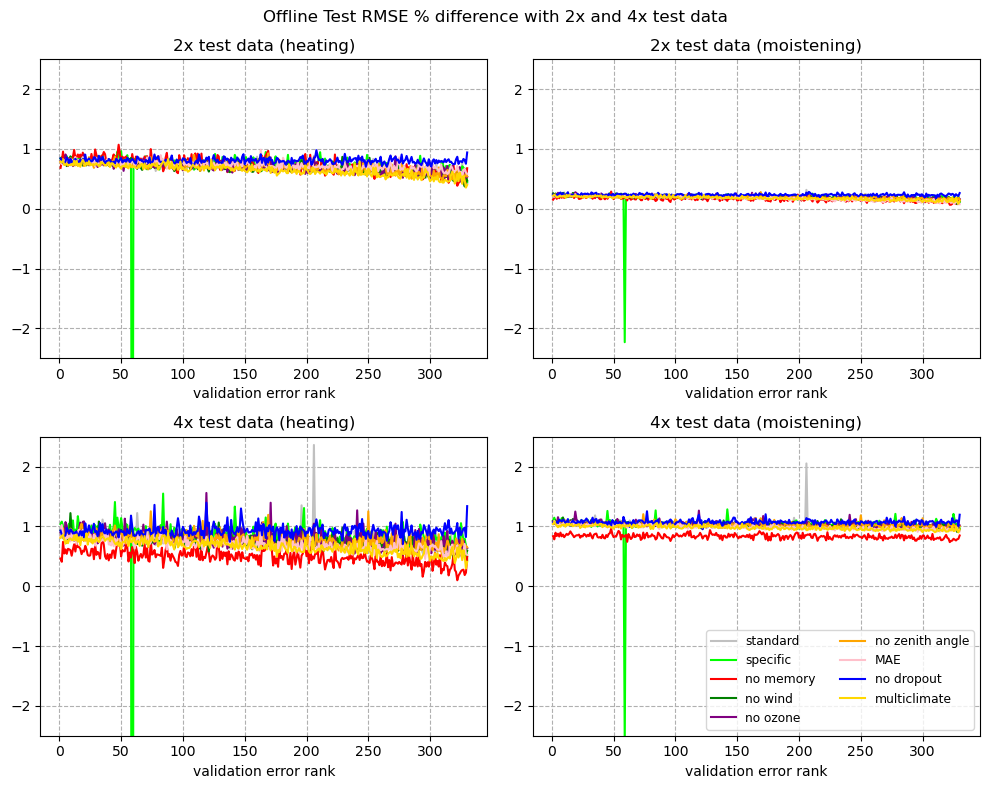

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

axs[0].plot(100*(standard_model_info['offline_heating_2x'] - standard_model_info['offline_heating'])/standard_model_info['offline_heating'], label = 'standard', color = color_dict['standard'])
axs[0].plot(100*(specific_model_info['offline_heating_2x'] - specific_model_info['offline_heating'])/specific_model_info['offline_heating'], label = 'specific', color = color_dict['specific'])
axs[0].plot(100*(nomemory_model_info['offline_heating_2x'] - nomemory_model_info['offline_heating'])/nomemory_model_info['offline_heating'], label = 'no memory', color = color_dict['nomemory'])
axs[0].plot(100*(nowind_model_info['offline_heating_2x'] - nowind_model_info['offline_heating'])/nowind_model_info['offline_heating'], label = 'no wind', color = color_dict['nowind'])
axs[0].plot(100*(noozone_model_info['offline_heating_2x'] - noozone_model_info['offline_heating'])/noozone_model_info['offline_heating'], label = 'no ozone', color = color_dict['noozone'])
axs[0].plot(100*(nocoszrs_model_info['offline_heating_2x'] - nocoszrs_model_info['offline_heating'])/nocoszrs_model_info['offline_heating'], label = 'no zenith angle', color = color_dict['nocoszrs'])
axs[0].plot(100*(mae_model_info['offline_heating_2x'] - mae_model_info['offline_heating'])/mae_model_info['offline_heating'], label = 'MAE', color = color_dict['mae'])
axs[0].plot(100*(nodropout_model_info['offline_heating_2x'] - nodropout_model_info['offline_heating'])/nodropout_model_info['offline_heating'], label = 'no dropout', color = color_dict['nodropout'])
axs[0].plot(100*(multiclimate_model_info['offline_heating_2x'] - multiclimate_model_info['offline_heating'])/multiclimate_model_info['offline_heating'], label = 'multiclimate', color = color_dict['multiclimate'])
axs[0].set_title('2x test data (heating)')
axs[0].set_ylim(-2.5,2.5)
axs[0].set_xlabel('validation error rank')
axs[0].grid(True, which="both", ls="--")

axs[1].plot(100*(standard_model_info['offline_moistening_2x'] - standard_model_info['offline_moistening'])/standard_model_info['offline_moistening'], label = 'standard', color = color_dict['standard'])
axs[1].plot(100*(specific_model_info['offline_moistening_2x'] - specific_model_info['offline_moistening'])/specific_model_info['offline_moistening'], label = 'specific', color = color_dict['specific'])
axs[1].plot(100*(nomemory_model_info['offline_moistening_2x'] - nomemory_model_info['offline_moistening'])/nomemory_model_info['offline_moistening'], label = 'no memory', color = color_dict['nomemory'])
axs[1].plot(100*(nowind_model_info['offline_moistening_2x'] - nowind_model_info['offline_moistening'])/nowind_model_info['offline_moistening'], label = 'no wind', color = color_dict['nowind'])
axs[1].plot(100*(noozone_model_info['offline_moistening_2x'] - noozone_model_info['offline_moistening'])/noozone_model_info['offline_moistening'], label = 'no ozone', color = color_dict['noozone'])
axs[1].plot(100*(nocoszrs_model_info['offline_moistening_2x'] - nocoszrs_model_info['offline_moistening'])/nocoszrs_model_info['offline_moistening'], label = 'no zenith angle', color = color_dict['nocoszrs'])
axs[1].plot(100*(mae_model_info['offline_moistening_2x'] - mae_model_info['offline_moistening'])/mae_model_info['offline_moistening'], label = 'MAE', color = color_dict['mae'])
axs[1].plot(100*(nodropout_model_info['offline_moistening_2x'] - nodropout_model_info['offline_moistening'])/nodropout_model_info['offline_moistening'], label = 'no dropout', color = color_dict['nodropout'])
axs[1].plot(100*(multiclimate_model_info['offline_moistening_2x'] - multiclimate_model_info['offline_moistening'])/multiclimate_model_info['offline_moistening'], label = 'multiclimate', color = color_dict['multiclimate'])
axs[1].set_title('2x test data (moistening)')
axs[1].set_ylim(-2.5,2.5)
axs[1].set_xlabel('validation error rank')
axs[1].grid(True, which="both", ls="--")

axs[2].plot(100*(standard_model_info['offline_heating_4x'] - standard_model_info['offline_heating'])/standard_model_info['offline_heating'], label = 'standard', color = color_dict['standard'])
axs[2].plot(100*(specific_model_info['offline_heating_4x'] - specific_model_info['offline_heating'])/specific_model_info['offline_heating'], label = 'specific', color = color_dict['specific'])
axs[2].plot(100*(nomemory_model_info['offline_heating_4x'] - nomemory_model_info['offline_heating'])/nomemory_model_info['offline_heating'], label = 'no memory', color = color_dict['nomemory'])
axs[2].plot(100*(nowind_model_info['offline_heating_4x'] - nowind_model_info['offline_heating'])/nowind_model_info['offline_heating'], label = 'no wind', color = color_dict['nowind'])
axs[2].plot(100*(noozone_model_info['offline_heating_4x'] - noozone_model_info['offline_heating'])/noozone_model_info['offline_heating'], label = 'no ozone', color = color_dict['noozone'])
axs[2].plot(100*(nocoszrs_model_info['offline_heating_4x'] - nocoszrs_model_info['offline_heating'])/nocoszrs_model_info['offline_heating'], label = 'no zenith angle', color = color_dict['nocoszrs'])
axs[2].plot(100*(mae_model_info['offline_heating_4x'] - mae_model_info['offline_heating'])/mae_model_info['offline_heating'], label = 'MAE', color = color_dict['mae'])
axs[2].plot(100*(nodropout_model_info['offline_heating_4x'] - nodropout_model_info['offline_heating'])/nodropout_model_info['offline_heating'], label = 'no dropout', color = color_dict['nodropout'])
axs[2].plot(100*(multiclimate_model_info['offline_heating_4x'] - multiclimate_model_info['offline_heating'])/multiclimate_model_info['offline_heating'], label = 'multiclimate', color = color_dict['multiclimate'])
axs[2].set_title('4x test data (heating)')
axs[2].set_ylim(-2.5,2.5)
axs[2].set_xlabel('validation error rank')
axs[2].grid(True, which="both", ls="--")

axs[3].plot(100*(standard_model_info['offline_moistening_4x'] - standard_model_info['offline_moistening'])/standard_model_info['offline_moistening'], label = 'standard', color = color_dict['standard'])
axs[3].plot(100*(specific_model_info['offline_moistening_4x'] - specific_model_info['offline_moistening'])/specific_model_info['offline_moistening'], label = 'specific', color = color_dict['specific'])
axs[3].plot(100*(nomemory_model_info['offline_moistening_4x'] - nomemory_model_info['offline_moistening'])/nomemory_model_info['offline_moistening'], label = 'no memory', color = color_dict['nomemory'])
axs[3].plot(100*(nowind_model_info['offline_moistening_4x'] - nowind_model_info['offline_moistening'])/nowind_model_info['offline_moistening'], label = 'no wind', color = color_dict['nowind'])
axs[3].plot(100*(noozone_model_info['offline_moistening_4x'] - noozone_model_info['offline_moistening'])/noozone_model_info['offline_moistening'], label = 'no ozone', color = color_dict['noozone'])
axs[3].plot(100*(nocoszrs_model_info['offline_moistening_4x'] - nocoszrs_model_info['offline_moistening'])/nocoszrs_model_info['offline_moistening'], label = 'no zenith angle', color = color_dict['nocoszrs'])
axs[3].plot(100*(mae_model_info['offline_moistening_4x'] - mae_model_info['offline_moistening'])/mae_model_info['offline_moistening'], label = 'MAE', color = color_dict['mae'])
axs[3].plot(100*(nodropout_model_info['offline_moistening_4x'] - nodropout_model_info['offline_moistening'])/nodropout_model_info['offline_moistening'], label = 'no dropout', color = color_dict['nodropout'])
axs[3].plot(100*(multiclimate_model_info['offline_moistening_4x'] - multiclimate_model_info['offline_moistening'])/multiclimate_model_info['offline_moistening'], label = 'multiclimate', color = color_dict['multiclimate'])
axs[3].set_title('4x test data (moistening)')
axs[3].legend(ncol = 2, fontsize = 8.8)
axs[3].set_ylim(-2.5,2.5)
axs[3].set_xlabel('validation error rank')
axs[3].grid(True, which="both", ls="--")

fig.suptitle('Offline Test RMSE % difference with 2x and 4x test data', fontsize = 12)
plt.tight_layout()

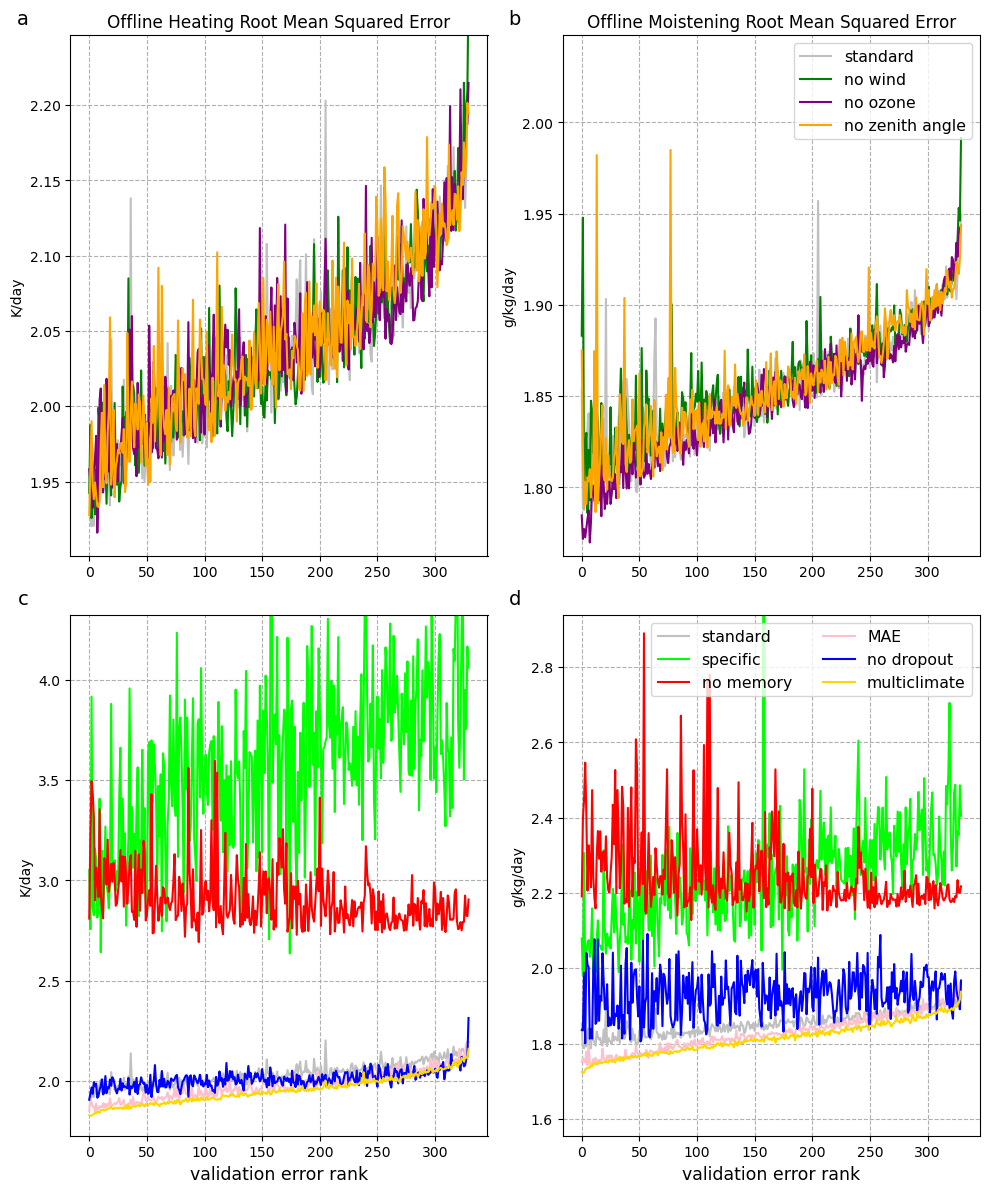

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 12))
title_fontsize = 12.1

heating_standard, = axs[0,0].plot(np.arange(330), standard_model_info['offline_heating_multi'], color = color_dict['standard'], label='standard')
heating_nowind, = axs[0,0].plot(np.arange(330), nowind_model_info['offline_heating_multi'], color = color_dict['nowind'], label='no wind')
heating_noozone, = axs[0,0].plot(np.arange(330), noozone_model_info['offline_heating_multi'], color = color_dict['noozone'], label='no ozone')
heating_nocoszrs, = axs[0,0].plot(np.arange(330), nocoszrs_model_info['offline_heating_multi'], color = color_dict['nocoszrs'], label='no zenith angle')

heating_standard, = axs[1,0].plot(np.arange(330), standard_model_info['offline_heating_multi'], color = color_dict['standard'], label='standard')
heating_specific = axs[1,0].plot(np.arange(330), specific_model_info['offline_heating_multi'], color = color_dict['specific'], label='specific humidity')
heating_nomemory, = axs[1,0].plot(np.arange(330), nomemory_model_info['offline_heating_multi'], color = color_dict['nomemory'], label='no memory')
heating_mae, = axs[1,0].plot(np.arange(330), mae_model_info['offline_heating_multi'], color = color_dict['mae'], label='MAE')
heating_nodropout, = axs[1,0].plot(np.arange(330), nodropout_model_info['offline_heating_multi'], color = color_dict['nodropout'], label='no dropout')
heating_multiclimate, = axs[1,0].plot(np.arange(330), multiclimate_model_info['offline_heating_multi'], color = color_dict['multiclimate'], label='multiclimate')

moistening_standard, = axs[0,1].plot(np.arange(330), standard_model_info['offline_moistening_multi'], color = color_dict['standard'], label='standard')
moistening_nowind, = axs[0,1].plot(np.arange(330), nowind_model_info['offline_moistening_multi'], color = color_dict['nowind'], label='no wind')
moistening_noozone, = axs[0,1].plot(np.arange(330), noozone_model_info['offline_moistening_multi'], color = color_dict['noozone'], label='no ozone')
moistening_nocoszrs, = axs[0,1].plot(np.arange(330), nocoszrs_model_info['offline_moistening_multi'], color = color_dict['nocoszrs'], label='no zenith angle')

moistening_standard, = axs[1,1].plot(np.arange(330), standard_model_info['offline_moistening_multi'], color = color_dict['standard'], label='standard')
moistening_specific, = axs[1,1].plot(np.arange(330), specific_model_info['offline_moistening_multi'], color = color_dict['specific'], label='specific humidity')
moistening_nomemory, = axs[1,1].plot(np.arange(330), nomemory_model_info['offline_moistening_multi'], color = color_dict['nomemory'], label='no memory')
moistening_mae, = axs[1,1].plot(np.arange(330), mae_model_info['offline_moistening_multi'], color = color_dict['mae'], label='MAE')
moistening_nodropout, = axs[1,1].plot(np.arange(330), nodropout_model_info['offline_moistening_multi'], color = color_dict['nodropout'], label='no dropout')
moistening_multiclimate, = axs[1,1].plot(np.arange(330), multiclimate_model_info['offline_moistening_multi'], color = color_dict['multiclimate'], label='multiclimate')

axs[0,0].yaxis.get_offset_text().set_size(8) 
axs[0,0].set_title('Offline Heating Root Mean Squared Error', fontsize = title_fontsize)
axs[1,0].set_xlabel('validation error rank', fontsize = 12.5)
axs[0,0].set_ylabel('K/day')
axs[1,0].set_ylabel('K/day')
axs[0,0].set_ylim(2.2e-5*86400, 2.6e-5*86400)
axs[1,0].set_ylim(2e-5*86400, 5e-5*86400)
axs[0,0].grid(True, which="both", ls="--")
axs[1,0].grid(True, which="both", ls="--")

axs[0,1].yaxis.get_offset_text().set_size(8) 
axs[0,1].set_title('Offline Moistening Root Mean Squared Error', fontsize = title_fontsize)
axs[1,1].set_xlabel('validation error rank', fontsize = 12.5)
axs[0,1].set_ylabel('g/kg/day')
axs[1,1].set_ylabel('g/kg/day')
axs[0,1].set_ylim(2.04e-5*86400, 2.37e-5*86400)
axs[1,1].set_ylim(1.8e-5*86400, 3.4e-5*86400)
axs[0,1].grid(True, which="both", ls="--")
axs[1,1].grid(True, which="both", ls="--")


axs[0,1].legend([moistening_standard, \
                 moistening_nowind, \
                 moistening_noozone, \
                 moistening_nocoszrs], \
               ['standard', 'no wind', 'no ozone', 'no zenith angle'], loc='upper right', fontsize = 11.3)
axs[1,1].legend([moistening_standard, \
                 moistening_specific, \
                 moistening_nomemory, \
                 moistening_mae, \
                 moistening_nodropout, \
                 moistening_multiclimate], \
                ['standard', 'specific', 'no memory', 'MAE', 'no dropout', 'multiclimate'], loc='upper right', ncol = 2, fontsize = 11.3)

sublabels = ['a', 'b', 'c', 'd']
for i, ax in enumerate(axs.flat):
    ax.text(-0.1, 1.05, sublabels[i], transform=ax.transAxes,
            fontsize=14, va='top', ha='right')

plt.tight_layout()
plt.show()

# Online story

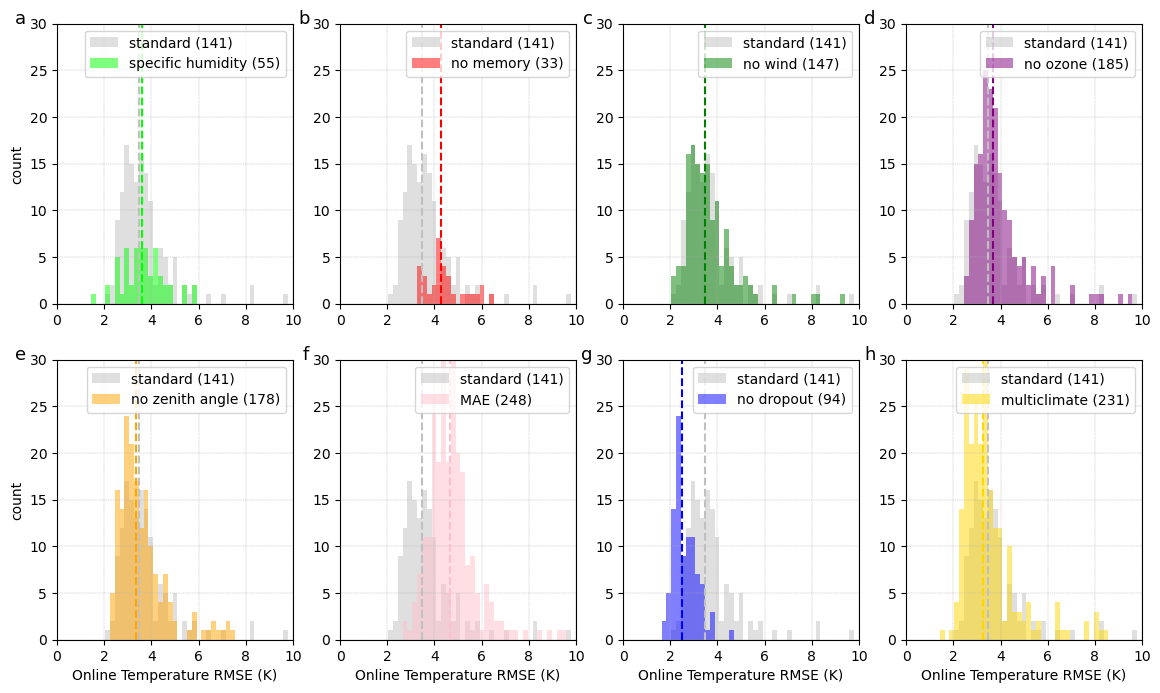

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(14, 8))
alpha = .5
# Define the number of bins and bin edges
bins = np.linspace(0, 10, 50)

# Plot histograms
axs[0,0].hist(survived_dict['standard']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[0,0].axvline(np.median(survived_dict['standard']['online_temperature']), color = color_dict['standard'], linestyle='--')
axs[0,0].hist(survived_dict['specific']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['specific'], len(survived_dict['specific'])), color = color_dict['specific'], alpha = alpha)
axs[0,0].axvline(np.median(survived_dict['specific']['online_temperature']), color = color_dict['specific'], linestyle='--')
axs[0,0].set_ylim(0, 30)
axs[0,0].set_xlim(0, 10)
axs[0,0].set_ylabel('count')

axs[0,0].legend()

axs[0,1].hist(survived_dict['standard']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[0,1].axvline(np.median(survived_dict['standard']['online_temperature']), color = color_dict['standard'], linestyle='--')
axs[0,1].hist(survived_dict['nomemory']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['nomemory'], len(survived_dict['nomemory'])), color = color_dict['nomemory'], alpha = alpha)
axs[0,1].axvline(np.median(survived_dict['nomemory']['online_temperature']), color = color_dict['nomemory'], linestyle='--')
axs[0,1].set_ylim(0, 30)
axs[0,1].set_xlim(0, 10)
axs[0,1].legend()

axs[0,2].hist(survived_dict['standard']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[0,2].axvline(np.median(survived_dict['standard']['online_temperature']), color = color_dict['standard'], linestyle='--')
axs[0,2].hist(survived_dict['nowind']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['nowind'], len(survived_dict['nowind'])), color = color_dict['nowind'], alpha = alpha)
axs[0,2].axvline(np.median(survived_dict['nowind']['online_temperature']), color = color_dict['nowind'], linestyle='--')
axs[0,2].set_ylim(0, 30)
axs[0,2].set_xlim(0, 10)
axs[0,2].legend()

axs[0,3].hist(survived_dict['standard']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[0,3].axvline(np.median(survived_dict['standard']['online_temperature']), color = color_dict['standard'], linestyle='--')
axs[0,3].hist(survived_dict['noozone']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['noozone'], len(survived_dict['noozone'])), color = color_dict['noozone'], alpha = alpha)
axs[0,3].axvline(np.median(survived_dict['noozone']['online_temperature']), color = color_dict['noozone'], linestyle='--')
axs[0,3].set_ylim(0, 30)
axs[0,3].set_xlim(0, 10)
axs[0,3].legend()

axs[1,0].hist(survived_dict['standard']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[1,0].axvline(np.median(survived_dict['standard']['online_temperature']), color = color_dict['standard'], linestyle='--')
axs[1,0].hist(survived_dict['nocoszrs']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['nocoszrs'], len(survived_dict['nocoszrs'])), color = color_dict['nocoszrs'], alpha = alpha)
axs[1,0].axvline(np.median(survived_dict['nocoszrs']['online_temperature']), color = color_dict['nocoszrs'], linestyle='--')
axs[1,0].set_ylim(0, 30)
axs[1,0].set_xlim(0, 10)
axs[1,0].legend()
axs[1,0].set_xlabel('Online Temperature RMSE (K)')
axs[1,0].set_ylabel('count')

axs[1,1].hist(survived_dict['standard']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[1,1].axvline(np.median(survived_dict['standard']['online_temperature']), color = color_dict['standard'], linestyle='--')
axs[1,1].hist(survived_dict['mae']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['mae'], len(survived_dict['mae'])), color = color_dict['mae'], alpha = alpha)
axs[1,1].axvline(np.median(survived_dict['mae']['online_temperature']), color = color_dict['mae'], linestyle='--')
axs[1,1].set_ylim(0, 30)
axs[1,1].set_xlim(0, 10)
axs[1,1].legend()
axs[1,1].set_xlabel('Online Temperature RMSE (K)')

axs[1,2].hist(survived_dict['standard']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[1,2].axvline(np.median(survived_dict['standard']['online_temperature']), color = color_dict['standard'], linestyle='--')
axs[1,2].hist(survived_dict['nodropout']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['nodropout'], len(survived_dict['nodropout'])), color = color_dict['nodropout'], alpha = alpha)
axs[1,2].axvline(np.median(survived_dict['nodropout']['online_temperature']), color = color_dict['nodropout'], linestyle='--')
axs[1,2].set_ylim(0, 30)
axs[1,2].set_xlim(0, 10)
axs[1,2].legend()
axs[1,2].set_xlabel('Online Temperature RMSE (K)')

axs[1,3].hist(survived_dict['standard']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[1,3].axvline(np.median(survived_dict['standard']['online_temperature']), color = color_dict['standard'], linestyle='--')
axs[1,3].hist(survived_dict['multiclimate']['online_temperature'], bins = bins, label="{} ({})".format(label_dict['multiclimate'], len(survived_dict['multiclimate'])), color = color_dict['multiclimate'], alpha = alpha)
axs[1,3].axvline(np.median(survived_dict['multiclimate']['online_temperature']), color = color_dict['multiclimate'], linestyle='--')
axs[1,3].set_ylim(0, 30)
axs[1,3].set_xlim(0, 10)
axs[1,3].legend()
axs[1,3].set_xlabel('Online Temperature RMSE (K)')

axs[0,0].grid(True, which="both", ls="--", linewidth = .3)
axs[0,1].grid(True, which="both", ls="--", linewidth = .3)
axs[0,2].grid(True, which="both", ls="--", linewidth = .3)
axs[0,3].grid(True, which="both", ls="--", linewidth = .3)
axs[1,0].grid(True, which="both", ls="--", linewidth = .3)
axs[1,1].grid(True, which="both", ls="--", linewidth = .3)
axs[1,2].grid(True, which="both", ls="--", linewidth = .3)
axs[1,3].grid(True, which="both", ls="--", linewidth = .3)

sublabels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
for i, ax in enumerate(axs.flat):
    ax.text(-0.13, 1.05, sublabels[i], transform=ax.transAxes,
            fontsize=13, va='top', ha='right')

plt.show()

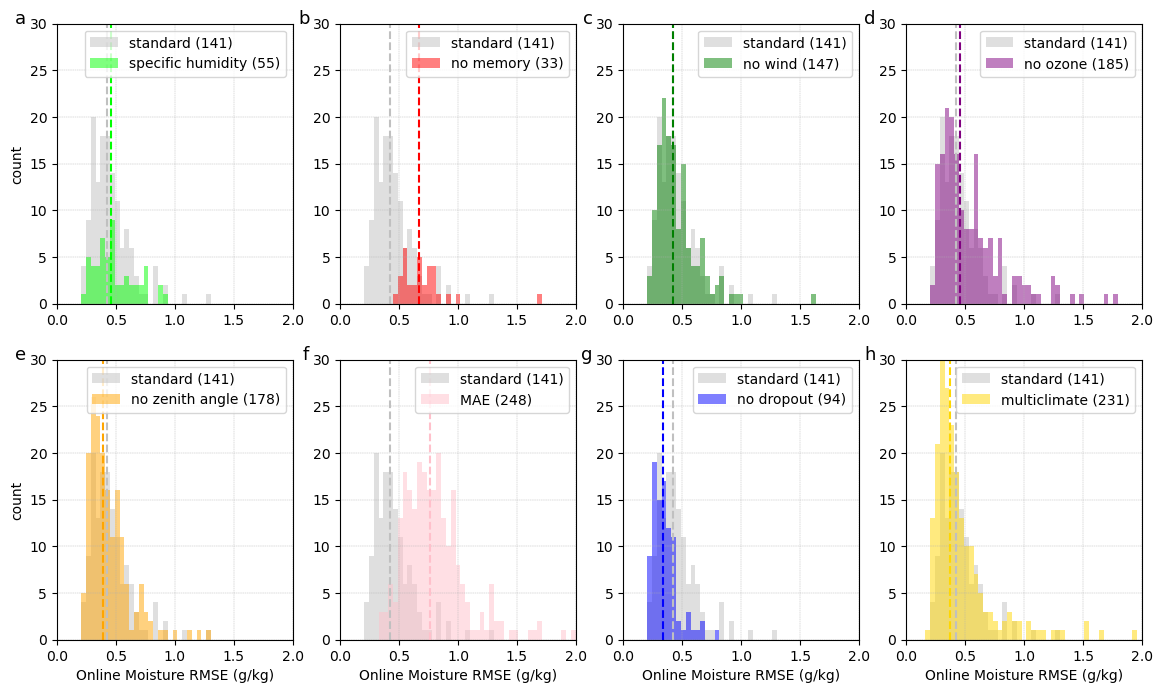

In [10]:
fig, axs = plt.subplots(2, 4, figsize=(14, 8))
alpha = .5
# Define the number of bins and bin edges
bins = np.linspace(0, 2, 50)

# Plot histograms
axs[0,0].hist(survived_dict['standard']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[0,0].axvline(np.median(survived_dict['standard']['online_moisture']), color = color_dict['standard'], linestyle='--')
axs[0,0].hist(survived_dict['specific']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['specific'], len(survived_dict['specific'])), color = color_dict['specific'], alpha = alpha)
axs[0,0].axvline(np.median(survived_dict['specific']['online_moisture']), color = color_dict['specific'], linestyle='--')
axs[0,0].set_ylim(0, 30)
axs[0,0].set_xlim(0, 2)
axs[0,0].set_ylabel('count')

axs[0,0].legend()

axs[0,1].hist(survived_dict['standard']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[0,1].axvline(np.median(survived_dict['standard']['online_moisture']), color = color_dict['standard'], linestyle='--')
axs[0,1].hist(survived_dict['nomemory']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['nomemory'], len(survived_dict['nomemory'])), color = color_dict['nomemory'], alpha = alpha)
axs[0,1].axvline(np.median(survived_dict['nomemory']['online_moisture']), color = color_dict['nomemory'], linestyle='--')
axs[0,1].set_ylim(0, 30)
axs[0,1].set_xlim(0, 2)
axs[0,1].legend()

axs[0,2].hist(survived_dict['standard']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[0,2].axvline(np.median(survived_dict['standard']['online_moisture']), color = color_dict['standard'], linestyle='--')
axs[0,2].hist(survived_dict['nowind']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['nowind'], len(survived_dict['nowind'])), color = color_dict['nowind'], alpha = alpha)
axs[0,2].axvline(np.median(survived_dict['nowind']['online_moisture']), color = color_dict['nowind'], linestyle='--')
axs[0,2].set_ylim(0, 30)
axs[0,2].set_xlim(0, 2)
axs[0,2].legend()

axs[0,3].hist(survived_dict['standard']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[0,3].axvline(np.median(survived_dict['standard']['online_moisture']), color = color_dict['standard'], linestyle='--')
axs[0,3].hist(survived_dict['noozone']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['noozone'], len(survived_dict['noozone'])), color = color_dict['noozone'], alpha = alpha)
axs[0,3].axvline(np.median(survived_dict['noozone']['online_moisture']), color = color_dict['noozone'], linestyle='--')
axs[0,3].set_ylim(0, 30)
axs[0,3].set_xlim(0, 2)
axs[0,3].legend()

axs[1,0].hist(survived_dict['standard']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[1,0].axvline(np.median(survived_dict['standard']['online_moisture']), color = color_dict['standard'], linestyle='--')
axs[1,0].hist(survived_dict['nocoszrs']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['nocoszrs'], len(survived_dict['nocoszrs'])), color = color_dict['nocoszrs'], alpha = alpha)
axs[1,0].axvline(np.median(survived_dict['nocoszrs']['online_moisture']), color = color_dict['nocoszrs'], linestyle='--')
axs[1,0].set_ylim(0, 30)
axs[1,0].set_xlim(0, 2)
axs[1,0].legend()
axs[1,0].set_xlabel('Online Moisture RMSE (g/kg)')
axs[1,0].set_ylabel('count')

axs[1,1].hist(survived_dict['standard']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[1,1].axvline(np.median(survived_dict['standard']['online_moisture']), color = color_dict['standard'], linestyle='--')
axs[1,1].hist(survived_dict['mae']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['mae'], len(survived_dict['mae'])), color = color_dict['mae'], alpha = alpha)
axs[1,1].axvline(np.median(survived_dict['mae']['online_moisture']), color = color_dict['mae'], linestyle='--')
axs[1,1].set_ylim(0, 30)
axs[1,1].set_xlim(0, 2)
axs[1,1].legend()
axs[1,1].set_xlabel('Online Moisture RMSE (g/kg)')

axs[1,2].hist(survived_dict['standard']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[1,2].axvline(np.median(survived_dict['standard']['online_moisture']), color = color_dict['standard'], linestyle='--')
axs[1,2].hist(survived_dict['nodropout']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['nodropout'], len(survived_dict['nodropout'])), color = color_dict['nodropout'], alpha = alpha)
axs[1,2].axvline(np.median(survived_dict['nodropout']['online_moisture']), color = color_dict['nodropout'], linestyle='--')
axs[1,2].set_ylim(0, 30)
axs[1,2].set_xlim(0, 2)
axs[1,2].legend()
axs[1,2].set_xlabel('Online Moisture RMSE (g/kg)')

axs[1,3].hist(survived_dict['standard']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['standard'], len(survived_dict['standard'])), color = color_dict['standard'], alpha = alpha)
axs[1,3].axvline(np.median(survived_dict['standard']['online_moisture']), color = color_dict['standard'], linestyle='--')
axs[1,3].hist(survived_dict['multiclimate']['online_moisture'], bins = bins, label="{} ({})".format(label_dict['multiclimate'], len(survived_dict['multiclimate'])), color = color_dict['multiclimate'], alpha = alpha)
axs[1,3].axvline(np.median(survived_dict['multiclimate']['online_moisture']), color = color_dict['multiclimate'], linestyle='--')
axs[1,3].set_ylim(0, 30)
axs[1,3].set_xlim(0, 2)
axs[1,3].legend()
axs[1,3].set_xlabel('Online Moisture RMSE (g/kg)')

axs[0,0].grid(True, which="both", ls="--", linewidth = .3)
axs[0,1].grid(True, which="both", ls="--", linewidth = .3)
axs[0,2].grid(True, which="both", ls="--", linewidth = .3)
axs[0,3].grid(True, which="both", ls="--", linewidth = .3)
axs[1,0].grid(True, which="both", ls="--", linewidth = .3)
axs[1,1].grid(True, which="both", ls="--", linewidth = .3)
axs[1,2].grid(True, which="both", ls="--", linewidth = .3)
axs[1,3].grid(True, which="both", ls="--", linewidth = .3)

sublabels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
for i, ax in enumerate(axs.flat):
    ax.text(-0.13, 1.05, sublabels[i], transform=ax.transAxes,
            fontsize=13, va='top', ha='right')

# Show the plot
plt.show()

# Offline vs. Online story

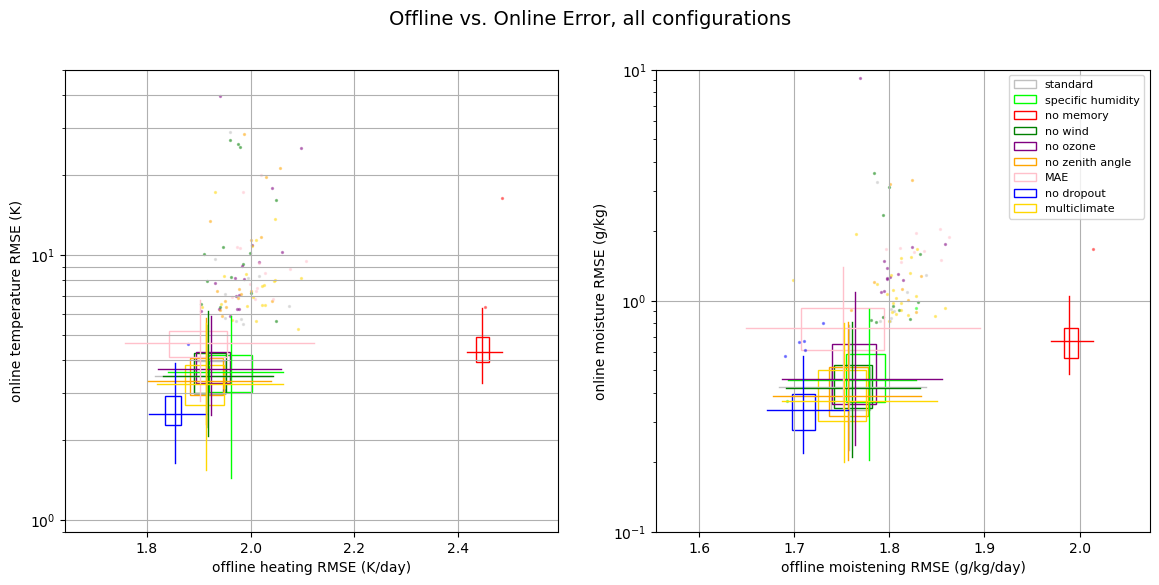

In [11]:
def make_boxplots(model_dicts):
    # Create a new figure and axis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Define the position and size of the square
    handles_Q = []
    for config in model_dicts:
        model_info = model_dicts[config]
        label = label_dict[config]
        color = color_dict[config]

        offline_min_T = model_info[model_info['num_months']==12]['offline_heating'].min()
        offline_25_T = model_info[model_info['num_months']==12]['offline_heating'].quantile(.25)
        offline_50_T = model_info[model_info['num_months']==12]['offline_heating'].quantile(.5)
        offline_75_T = model_info[model_info['num_months']==12]['offline_heating'].quantile(.75)
        offline_max_T = model_info[model_info['num_months']==12]['offline_heating'].max()
        offline_iqr_T = offline_75_T - offline_25_T
        offline_outlier_mask_low_T = model_info[model_info['num_months']==12]['offline_heating'] < offline_25_T - 1.5*offline_iqr_T
        offline_outlier_mask_high_T = model_info[model_info['num_months']==12]['offline_heating'] > offline_75_T + 1.5*offline_iqr_T
        online_min_T = model_info[model_info['num_months']==12]['online_temperature'].min()
        online_25_T = model_info[model_info['num_months']==12]['online_temperature'].quantile(.25)
        online_50_T = model_info[model_info['num_months']==12]['online_temperature'].quantile(.5)
        online_75_T = model_info[model_info['num_months']==12]['online_temperature'].quantile(.75)
        online_max_T = model_info[model_info['num_months']==12]['online_temperature'].max()
        online_iqr_T = online_75_T - online_25_T
        online_outlier_mask_low_T = model_info[model_info['num_months']==12]['online_temperature'] < online_25_T - 1.5*online_iqr_T
        online_outlier_mask_high_T = model_info[model_info['num_months']==12]['online_temperature'] > online_75_T + 1.5*online_iqr_T
        outlier_mask_T = offline_outlier_mask_low_T | offline_outlier_mask_high_T | online_outlier_mask_low_T | online_outlier_mask_high_T
        outliers_T = model_info[model_info['num_months']==12][outlier_mask_T]
        x_T, y_T = offline_25_T, online_25_T  # bottom left corner
        width_T, height_T = offline_75_T - offline_25_T, online_75_T - online_25_T  # width and height of the square
        square_T = patches.Rectangle((x_T, y_T), width_T, height_T, linewidth=1, edgecolor = color, facecolor = 'none')
        ax1.plot([offline_50_T, offline_50_T], [max(online_min_T, online_25_T - 1.5*online_iqr_T), min(online_max_T, online_75_T + 1.5*online_iqr_T)], color = color, linewidth=1)
        ax1.plot([max(offline_min_T, offline_25_T - 1.5*offline_iqr_T), min(offline_max_T, offline_75_T + 1.5*offline_iqr_T)], [online_50_T, online_50_T], color=color, linewidth=1)
        ax1.scatter(outliers_T['offline_heating'], outliers_T['online_temperature'], color = color, s = 2, alpha = .4)
        ax1.add_patch(square_T)

        offline_min_Q = model_info[model_info['num_months']==12]['offline_moistening'].min()
        offline_25_Q = model_info[model_info['num_months']==12]['offline_moistening'].quantile(.25)
        offline_50_Q = model_info[model_info['num_months']==12]['offline_moistening'].quantile(.5)
        offline_75_Q = model_info[model_info['num_months']==12]['offline_moistening'].quantile(.75)
        offline_max_Q = model_info[model_info['num_months']==12]['offline_moistening'].max()
        offline_iqr_Q = offline_75_Q - offline_25_Q
        offline_outlier_mask_low_Q = model_info[model_info['num_months']==12]['offline_moistening'] < offline_25_Q - 1.5*offline_iqr_Q
        offline_outlier_mask_high_Q = model_info[model_info['num_months']==12]['offline_moistening'] > offline_75_Q + 1.5*offline_iqr_Q
        online_min_Q = model_info[model_info['num_months']==12]['online_moisture'].min()
        online_25_Q = model_info[model_info['num_months']==12]['online_moisture'].quantile(.25)
        online_50_Q = model_info[model_info['num_months']==12]['online_moisture'].quantile(.5)
        online_75_Q = model_info[model_info['num_months']==12]['online_moisture'].quantile(.75)
        online_max_Q = model_info[model_info['num_months']==12]['online_moisture'].max()
        online_iqr_Q = online_75_Q - online_25_Q
        online_outlier_mask_low_Q = model_info[model_info['num_months']==12]['online_moisture'] < online_25_Q - 1.5*online_iqr_Q
        online_outlier_mask_high_Q = model_info[model_info['num_months']==12]['online_moisture'] > online_75_Q + 1.5*online_iqr_Q
        outlier_mask_Q = offline_outlier_mask_low_Q | offline_outlier_mask_high_Q | online_outlier_mask_low_Q | online_outlier_mask_high_Q
        outliers_Q = model_info[model_info['num_months']==12][outlier_mask_Q]
        x_Q, y_Q = offline_25_Q, online_25_Q  # bottom left corner
        width_Q, height_Q = offline_75_Q - offline_25_Q, online_75_Q - online_25_Q  # width and height of the square
        square_Q = patches.Rectangle((x_Q, y_Q), width_Q, height_Q, linewidth=1, edgecolor = color, facecolor = 'none', label = label)
        handles_Q.append(square_Q)
        ax2.plot([offline_50_Q, offline_50_Q], [max(online_min_Q, online_25_Q - 1.5*online_iqr_Q), min(online_max_Q, online_75_Q + 1.5*online_iqr_Q)], color = color, linewidth=1)
        ax2.plot([max(offline_min_Q, offline_25_Q - 1.5*offline_iqr_Q), min(offline_max_Q, offline_75_Q + 1.5*offline_iqr_Q)], [online_50_Q, online_50_Q], color=color, linewidth=1)
        ax2.scatter(outliers_Q['offline_moistening'], outliers_Q['online_moisture'], color = color, s = 2, alpha = .4)
        ax2.add_patch(square_Q)

    # Set the limits of the plot
    ax1.set_xlim(1.9e-5*86400, 3e-5*86400)
    ax1.set_ylim(.9, 50)
    ax1.set_xlabel('offline heating RMSE (K/day)')
    ax1.set_ylabel('online temperature RMSE (K)')
    ax2.set_xlim(1.8e-5*86400, 2.4e-5*86400)
    ax2.set_ylim(1e-1, 10)
    ax2.set_xlabel('offline moistening RMSE (g/kg/day)')
    ax2.set_ylabel('online moisture RMSE (g/kg)')

    # Add grid
    ax1.grid(True, which = 'both')
    ax1.set_yscale('log')
    ax2.grid(True)
    ax2.set_yscale('log')
    ax2.legend(handles = handles_Q, fontsize = 8)

    # Show the plot
    fig.suptitle('Offline vs. Online Error, all configurations', fontsize = 14)
    plt.show()

make_boxplots(config_dict)

# Effects of various hyperparameters on offline error, online error, and online stability

In [12]:
print(spearmanr(combined_df_dropout['dropout'], combined_df_dropout['online_temperature']))
print(spearmanr(combined_df_dropout['dropout'], combined_df_dropout['online_moisture']))
print(spearmanr(combined_df_dropout['dropout'], combined_df_dropout['offline_heating']))
print(spearmanr(combined_df_dropout['dropout'], combined_df_dropout['offline_moistening']))

SpearmanrResult(correlation=0.5354264128544127, pvalue=2.667981701556318e-91)
SpearmanrResult(correlation=0.4711849900489014, pvalue=2.485168303354617e-68)
SpearmanrResult(correlation=0.6371983517000868, pvalue=1.0164448408544516e-139)
SpearmanrResult(correlation=0.6553227672733289, pvalue=2.3441754322090692e-150)


2.667981701556318e-91
2.485168303354617e-68
1.0164448408544516e-139
2.3441754322090692e-150


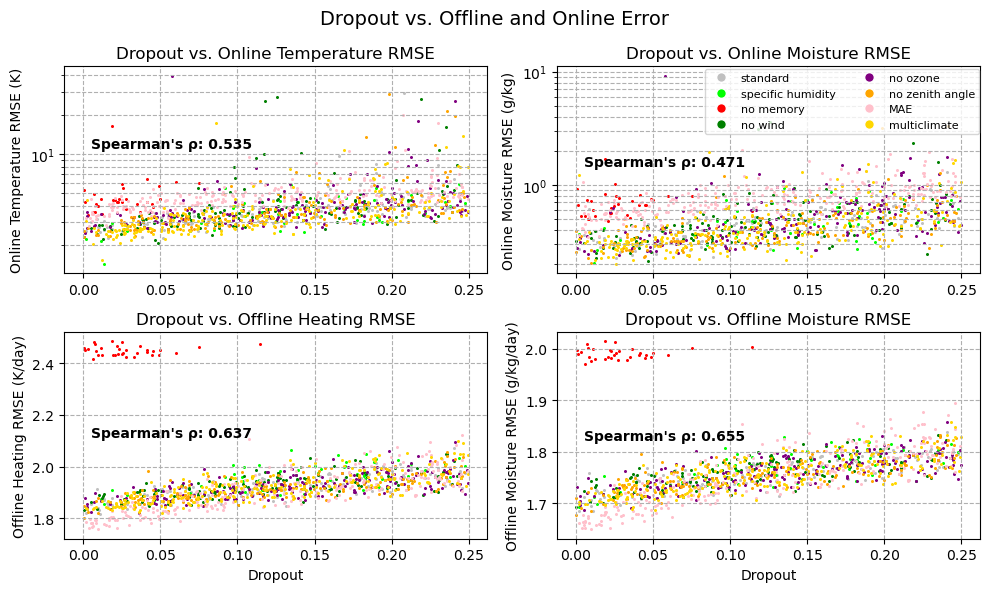

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
# axs.flatten()

axs[0,0].scatter(survived_dict['standard']['dropout'], survived_dict['standard']['online_temperature'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[0,0].scatter(survived_dict['specific']['dropout'], survived_dict['specific']['online_temperature'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[0,0].scatter(survived_dict['nomemory']['dropout'], survived_dict['nomemory']['online_temperature'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[0,0].scatter(survived_dict['nowind']['dropout'], survived_dict['nowind']['online_temperature'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[0,0].scatter(survived_dict['noozone']['dropout'], survived_dict['noozone']['online_temperature'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[0,0].scatter(survived_dict['nocoszrs']['dropout'], survived_dict['nocoszrs']['online_temperature'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[0,0].scatter(survived_dict['mae']['dropout'], survived_dict['mae']['online_temperature'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[0,0].scatter(survived_dict['multiclimate']['dropout'], survived_dict['multiclimate']['online_temperature'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[0,0].set_ylabel('Online Temperature RMSE (K)')
axs[0,0].set_title('Dropout vs. Online Temperature RMSE')
axs[0,0].grid(True, which="both", ls="--")
axs[0,0].set_yscale('log')
spearman_rho, dropout_online_T_pval = spearmanr(combined_df_dropout['dropout'], combined_df_dropout['online_temperature'])
spearman_rho = np.round(spearman_rho, 3)
print(dropout_online_T_pval)
axs[0,0].text(0.005, 12, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, fontweight = 'bold', ha='left', va='center')

axs[0,1].scatter(survived_dict['standard']['dropout'], survived_dict['standard']['online_moisture'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[0,1].scatter(survived_dict['specific']['dropout'], survived_dict['specific']['online_moisture'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[0,1].scatter(survived_dict['nomemory']['dropout'], survived_dict['nomemory']['online_moisture'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[0,1].scatter(survived_dict['nowind']['dropout'], survived_dict['nowind']['online_moisture'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[0,1].scatter(survived_dict['noozone']['dropout'], survived_dict['noozone']['online_moisture'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[0,1].scatter(survived_dict['nocoszrs']['dropout'], survived_dict['nocoszrs']['online_moisture'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[0,1].scatter(survived_dict['mae']['dropout'], survived_dict['mae']['online_moisture'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[0,1].scatter(survived_dict['multiclimate']['dropout'], survived_dict['multiclimate']['online_moisture'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[0,1].set_ylabel('Online Moisture RMSE (g/kg)')
axs[0,1].set_title('Dropout vs. Online Moisture RMSE')
axs[0,1].grid(True, which="both", ls="--")
axs[0,1].set_yscale('log')
spearman_rho, dropout_online_Q_pval = spearmanr(combined_df_dropout['dropout'], combined_df_dropout['online_moisture'])
spearman_rho = np.round(spearman_rho, 3)
print(dropout_online_Q_pval)
axs[0,1].text(0.005, 1.6, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, fontweight = 'bold', ha='left', va='center')

axs[1,0].scatter(survived_dict['standard']['dropout'], survived_dict['standard']['offline_heating'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[1,0].scatter(survived_dict['specific']['dropout'], survived_dict['specific']['offline_heating'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[1,0].scatter(survived_dict['nomemory']['dropout'], survived_dict['nomemory']['offline_heating'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[1,0].scatter(survived_dict['nowind']['dropout'], survived_dict['nowind']['offline_heating'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[1,0].scatter(survived_dict['noozone']['dropout'], survived_dict['noozone']['offline_heating'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[1,0].scatter(survived_dict['nocoszrs']['dropout'], survived_dict['nocoszrs']['offline_heating'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[1,0].scatter(survived_dict['mae']['dropout'], survived_dict['mae']['offline_heating'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[1,0].scatter(survived_dict['multiclimate']['dropout'], survived_dict['multiclimate']['offline_heating'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[1,0].set_xlabel('Dropout')
axs[1,0].set_ylabel('Offline Heating RMSE (K/day)')
axs[1,0].set_title('Dropout vs. Offline Heating RMSE')
axs[1,0].grid(True, which="both", ls="--")
spearman_rho, dropout_offline_T_pval = spearmanr(combined_df_dropout['dropout'], combined_df_dropout['offline_heating'])
spearman_rho = np.round(spearman_rho, 3)
print(dropout_offline_T_pval)
axs[1,0].text(0.005, 2.13, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, fontweight = 'bold', ha='left', va='center')

axs[1,1].scatter(survived_dict['standard']['dropout'], survived_dict['standard']['offline_moistening'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[1,1].scatter(survived_dict['specific']['dropout'], survived_dict['specific']['offline_moistening'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[1,1].scatter(survived_dict['nomemory']['dropout'], survived_dict['nomemory']['offline_moistening'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[1,1].scatter(survived_dict['nowind']['dropout'], survived_dict['nowind']['offline_moistening'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[1,1].scatter(survived_dict['noozone']['dropout'], survived_dict['noozone']['offline_moistening'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[1,1].scatter(survived_dict['nocoszrs']['dropout'], survived_dict['nocoszrs']['offline_moistening'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[1,1].scatter(survived_dict['mae']['dropout'], survived_dict['mae']['offline_moistening'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[1,1].scatter(survived_dict['multiclimate']['dropout'], survived_dict['multiclimate']['offline_moistening'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[1,1].set_xlabel('Dropout')
axs[1,1].set_ylabel('Offline Moisture RMSE (g/kg/day)')
axs[1,1].set_title('Dropout vs. Offline Moisture RMSE')
axs[1,1].grid(True, which="both", ls="--")
spearman_rho, dropout_offline_Q_pval = spearmanr(combined_df_dropout['dropout'], combined_df_dropout['offline_moistening'])
spearman_rho = np.round(spearman_rho, 3)
print(dropout_offline_Q_pval)
axs[1,1].text(0.005, 1.83, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, fontweight = 'bold', ha='left', va='center')

handles, labels = axs[1,1].get_legend_handles_labels()
labels = ['standard', 'specific humidity', 'no memory', 'no wind', 'no ozone', 'no zenith angle', 'MAE', 'multiclimate']
colors = ['silver', 'lime', 'red', 'green', 'purple', 'orange', 'pink', 'gold']
custom_handles = [Line2D([0], [0], marker='o', color='w', label=label,
                         markerfacecolor=color, markersize=7) for color, label in zip(colors, labels)]
fig.legend(handles=custom_handles, labels=labels, loc='upper right', ncol=2, fontsize=8, bbox_to_anchor=(.99, .89))

fig.suptitle('Dropout vs. Offline and Online Error', fontsize = 14)

plt.tight_layout()

0.18791149264041196
0.15597517026106067
0.20220345458830488
0.29893336737673665


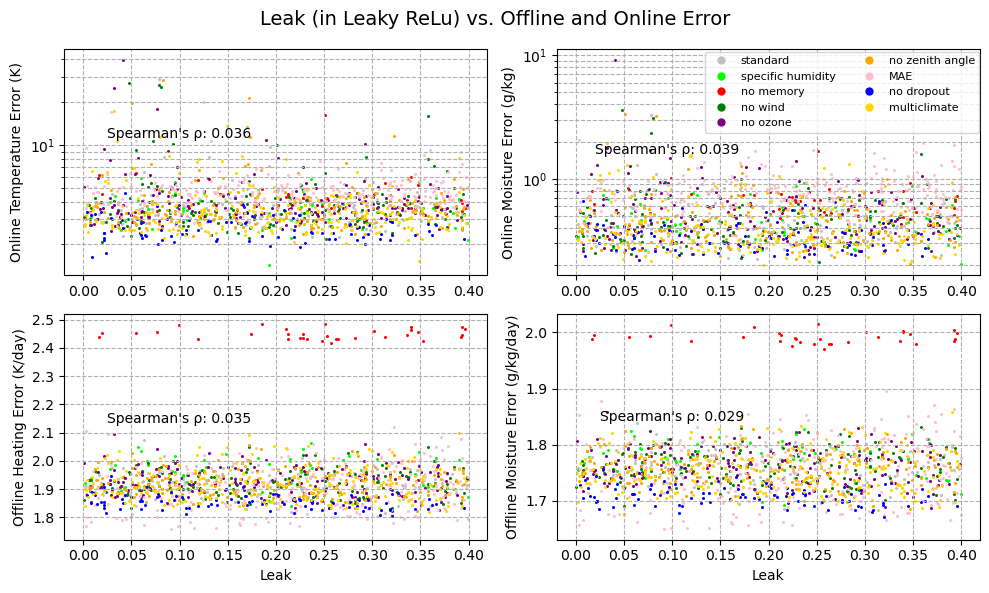

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0,0].scatter(survived_dict['standard']['leak'], survived_dict['standard']['online_temperature'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[0,0].scatter(survived_dict['specific']['leak'], survived_dict['specific']['online_temperature'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[0,0].scatter(survived_dict['nomemory']['leak'], survived_dict['nomemory']['online_temperature'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[0,0].scatter(survived_dict['nowind']['leak'], survived_dict['nowind']['online_temperature'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[0,0].scatter(survived_dict['noozone']['leak'], survived_dict['noozone']['online_temperature'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[0,0].scatter(survived_dict['nocoszrs']['leak'], survived_dict['nocoszrs']['online_temperature'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[0,0].scatter(survived_dict['mae']['leak'], survived_dict['mae']['online_temperature'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[0,0].scatter(survived_dict['nodropout']['leak'], survived_dict['nodropout']['online_temperature'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[0,0].scatter(survived_dict['multiclimate']['leak'], survived_dict['multiclimate']['online_temperature'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[0,0].set_ylabel('Online Temperature Error (K)')
axs[0,0].grid(True, which="both", ls="--")
axs[0,0].set_yscale('log')
spearman_rho, leak_online_T_pval = spearmanr(combined_df['leak'], combined_df['online_temperature'])
spearman_rho = np.round(spearman_rho, 3)
print(leak_online_T_pval)
axs[0,0].text(0.025, 12, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, ha='left', va='center')

axs[0,1].scatter(survived_dict['standard']['leak'], survived_dict['standard']['online_moisture'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[0,1].scatter(survived_dict['specific']['leak'], survived_dict['specific']['online_moisture'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[0,1].scatter(survived_dict['nomemory']['leak'], survived_dict['nomemory']['online_moisture'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[0,1].scatter(survived_dict['nowind']['leak'], survived_dict['nowind']['online_moisture'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[0,1].scatter(survived_dict['noozone']['leak'], survived_dict['noozone']['online_moisture'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[0,1].scatter(survived_dict['nocoszrs']['leak'], survived_dict['nocoszrs']['online_moisture'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[0,1].scatter(survived_dict['mae']['leak'], survived_dict['mae']['online_moisture'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[0,1].scatter(survived_dict['nodropout']['leak'], survived_dict['nodropout']['online_moisture'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[0,1].scatter(survived_dict['multiclimate']['leak'], survived_dict['multiclimate']['online_moisture'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[0,1].set_ylabel('Online Moisture Error (g/kg)')
axs[0,1].grid(True, which="both", ls="--")
axs[0,1].set_yscale('log')
spearman_rho, leak_online_Q_pval = spearmanr(combined_df['leak'], combined_df['online_moisture'])
spearman_rho = np.round(spearman_rho, 3)
print(leak_online_Q_pval)
axs[0,1].text(0.02, 1.7, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, ha='left', va='center')

axs[1,0].scatter(survived_dict['standard']['leak'], survived_dict['standard']['offline_heating'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[1,0].scatter(survived_dict['specific']['leak'], survived_dict['specific']['offline_heating'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[1,0].scatter(survived_dict['nomemory']['leak'], survived_dict['nomemory']['offline_heating'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[1,0].scatter(survived_dict['nowind']['leak'], survived_dict['nowind']['offline_heating'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[1,0].scatter(survived_dict['noozone']['leak'], survived_dict['noozone']['offline_heating'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[1,0].scatter(survived_dict['nocoszrs']['leak'], survived_dict['nocoszrs']['offline_heating'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[1,0].scatter(survived_dict['mae']['leak'], survived_dict['mae']['offline_heating'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[1,0].scatter(survived_dict['nodropout']['leak'], survived_dict['nodropout']['offline_heating'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[1,0].scatter(survived_dict['multiclimate']['leak'], survived_dict['multiclimate']['offline_heating'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[1,0].set_xlabel('Leak')
axs[1,0].set_ylabel('Offline Heating Error (K/day)')
axs[1,0].grid(True, which="both", ls="--")
spearman_rho, leak_offline_T_pval = spearmanr(combined_df['leak'], combined_df['offline_heating'])
spearman_rho = np.round(spearman_rho, 3)
print(leak_offline_T_pval)
axs[1,0].text(0.025, 2.15, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, ha='left', va='center')

axs[1,1].scatter(survived_dict['standard']['leak'], survived_dict['standard']['offline_moistening'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[1,1].scatter(survived_dict['specific']['leak'], survived_dict['specific']['offline_moistening'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[1,1].scatter(survived_dict['nomemory']['leak'], survived_dict['nomemory']['offline_moistening'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[1,1].scatter(survived_dict['nowind']['leak'], survived_dict['nowind']['offline_moistening'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[1,1].scatter(survived_dict['noozone']['leak'], survived_dict['noozone']['offline_moistening'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[1,1].scatter(survived_dict['nocoszrs']['leak'], survived_dict['nocoszrs']['offline_moistening'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[1,1].scatter(survived_dict['mae']['leak'], survived_dict['mae']['offline_moistening'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[1,1].scatter(survived_dict['nodropout']['leak'], survived_dict['nodropout']['offline_moistening'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[1,1].scatter(survived_dict['multiclimate']['leak'], survived_dict['multiclimate']['offline_moistening'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[1,1].set_xlabel('Leak')
axs[1,1].set_ylabel('Offline Moisture Error (g/kg/day)')
axs[1,1].grid(True, which="both", ls="--")
spearman_rho, leak_offline_Q_pval = spearmanr(combined_df['leak'], combined_df['offline_moistening'])
spearman_rho = np.round(spearman_rho, 3)
print(leak_offline_Q_pval)
axs[1,1].text(0.025, 1.85, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, ha='left', va='center')

handles, labels = axs[0,1].get_legend_handles_labels()
labels = ['standard', 'specific humidity', 'no memory', 'no wind', 'no ozone', 'no zenith angle', 'MAE', 'no dropout', 'multiclimate']
colors = ['silver', 'lime', 'red', 'green', 'purple', 'orange', 'pink', 'blue', 'gold']
custom_handles = [Line2D([0], [0], marker='o', color='w', label=label,
                         markerfacecolor=color, markersize=7) for color, label in zip(colors, labels)]
fig.legend(handles=custom_handles, labels=labels, loc='upper right', ncol=2, fontsize=8, bbox_to_anchor=(.99, .92))

fig.suptitle('Leak (in Leaky ReLu) vs. Offline and Online Error', fontsize = 14)
plt.tight_layout()

0.008708389721248514
0.0787098523856171
0.0022143038954283343
0.06044521964279632


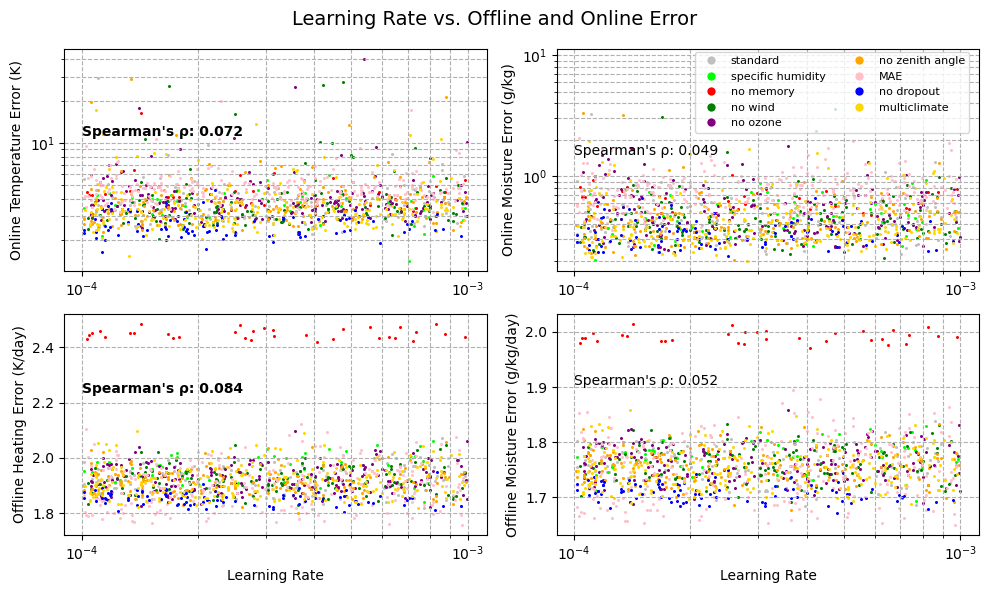

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0,0].scatter(survived_dict['standard']['lr'], survived_dict['standard']['online_temperature'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[0,0].scatter(survived_dict['specific']['lr'], survived_dict['specific']['online_temperature'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[0,0].scatter(survived_dict['nomemory']['lr'], survived_dict['nomemory']['online_temperature'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[0,0].scatter(survived_dict['nowind']['lr'], survived_dict['nowind']['online_temperature'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[0,0].scatter(survived_dict['noozone']['lr'], survived_dict['noozone']['online_temperature'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[0,0].scatter(survived_dict['nocoszrs']['lr'], survived_dict['nocoszrs']['online_temperature'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[0,0].scatter(survived_dict['mae']['lr'], survived_dict['mae']['online_temperature'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[0,0].scatter(survived_dict['nodropout']['lr'], survived_dict['nodropout']['online_temperature'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[0,0].scatter(survived_dict['multiclimate']['lr'], survived_dict['multiclimate']['online_temperature'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel('Online Temperature Error (K)')
axs[0,0].grid(True, which="both", ls="--")
spearman_rho, lr_online_T_pval = spearmanr(combined_df['lr'], combined_df['online_temperature'])
spearman_rho = np.round(spearman_rho, 3)
print(lr_online_T_pval)
axs[0,0].text(1e-4, 12, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, fontweight = 'bold', ha='left', va='center')

axs[0,1].scatter(survived_dict['standard']['lr'], survived_dict['standard']['online_moisture'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[0,1].scatter(survived_dict['specific']['lr'], survived_dict['specific']['online_moisture'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[0,1].scatter(survived_dict['nomemory']['lr'], survived_dict['nomemory']['online_moisture'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[0,1].scatter(survived_dict['nowind']['lr'], survived_dict['nowind']['online_moisture'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[0,1].scatter(survived_dict['noozone']['lr'], survived_dict['noozone']['online_moisture'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[0,1].scatter(survived_dict['nocoszrs']['lr'], survived_dict['nocoszrs']['online_moisture'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[0,1].scatter(survived_dict['mae']['lr'], survived_dict['mae']['online_moisture'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[0,1].scatter(survived_dict['nodropout']['lr'], survived_dict['nodropout']['online_moisture'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[0,1].scatter(survived_dict['multiclimate']['lr'], survived_dict['multiclimate']['online_moisture'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_ylabel('Online Moisture Error (g/kg)')
axs[0,1].grid(True, which="both", ls="--")
spearman_rho, lr_online_Q_pval = spearmanr(combined_df['lr'], combined_df['online_moisture'])
spearman_rho = np.round(spearman_rho, 3)
print(lr_online_Q_pval)
axs[0,1].text(1e-4, 1.6, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, ha='left', va='center')

axs[1,0].scatter(survived_dict['standard']['lr'], survived_dict['standard']['offline_heating'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[1,0].scatter(survived_dict['specific']['lr'], survived_dict['specific']['offline_heating'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[1,0].scatter(survived_dict['nomemory']['lr'], survived_dict['nomemory']['offline_heating'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[1,0].scatter(survived_dict['nowind']['lr'], survived_dict['nowind']['offline_heating'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[1,0].scatter(survived_dict['noozone']['lr'], survived_dict['noozone']['offline_heating'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[1,0].scatter(survived_dict['nocoszrs']['lr'], survived_dict['nocoszrs']['offline_heating'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[1,0].scatter(survived_dict['mae']['lr'], survived_dict['mae']['offline_heating'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[1,0].scatter(survived_dict['nodropout']['lr'], survived_dict['nodropout']['offline_heating'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[1,0].scatter(survived_dict['multiclimate']['lr'], survived_dict['multiclimate']['offline_heating'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[1,0].set_xscale('log')
axs[1,0].set_xlabel('Learning Rate')
axs[1,0].set_ylabel('Offline Heating Error (K/day)')
axs[1,0].grid(True, which="both", ls="--")
spearman_rho, lr_offline_T_pval = spearmanr(combined_df['lr'], combined_df['offline_heating'])
spearman_rho = np.round(spearman_rho, 3)
print(lr_offline_T_pval)
axs[1,0].text(1e-4, 2.25, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, fontweight = 'bold', ha='left', va='center')

axs[1,1].scatter(survived_dict['standard']['lr'], survived_dict['standard']['offline_moistening'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[1,1].scatter(survived_dict['specific']['lr'], survived_dict['specific']['offline_moistening'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[1,1].scatter(survived_dict['nomemory']['lr'], survived_dict['nomemory']['offline_moistening'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[1,1].scatter(survived_dict['nowind']['lr'], survived_dict['nowind']['offline_moistening'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[1,1].scatter(survived_dict['noozone']['lr'], survived_dict['noozone']['offline_moistening'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[1,1].scatter(survived_dict['nocoszrs']['lr'], survived_dict['nocoszrs']['offline_moistening'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[1,1].scatter(survived_dict['mae']['lr'], survived_dict['mae']['offline_moistening'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[1,1].scatter(survived_dict['nodropout']['lr'], survived_dict['nodropout']['offline_moistening'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[1,1].scatter(survived_dict['multiclimate']['lr'], survived_dict['multiclimate']['offline_moistening'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[1,1].set_xscale('log')
axs[1,1].set_xlabel('Learning Rate')
axs[1,1].set_ylabel('Offline Moisture Error (g/kg/day)')
axs[1,1].grid(True, which="both", ls="--")
spearman_rho, lr_offline_Q_pval = spearmanr(combined_df['lr'], combined_df['offline_moistening'])
spearman_rho = np.round(spearman_rho, 3)
print(lr_offline_Q_pval)
axs[1,1].text(1e-4, 1.91, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, ha='left', va='center')

handles, labels = axs[0,1].get_legend_handles_labels()
labels = ['standard', 'specific humidity', 'no memory', 'no wind', 'no ozone', 'no zenith angle', 'MAE', 'no dropout', 'multiclimate']
colors = ['silver', 'lime', 'red', 'green', 'purple', 'orange', 'pink', 'blue', 'gold']
custom_handles = [Line2D([0], [0], marker='o', color='w', label=label,
                         markerfacecolor=color, markersize=7) for color, label in zip(colors, labels)]
fig.legend(handles=custom_handles, labels=labels, loc='upper right', ncol=2, fontsize=8, bbox_to_anchor=(.98, .92))

fig.suptitle('Learning Rate vs. Offline and Online Error', fontsize = 14)
plt.tight_layout()

0.02635145470040952
0.033373634583522806
3.734678462320316e-11
3.734678462320316e-11


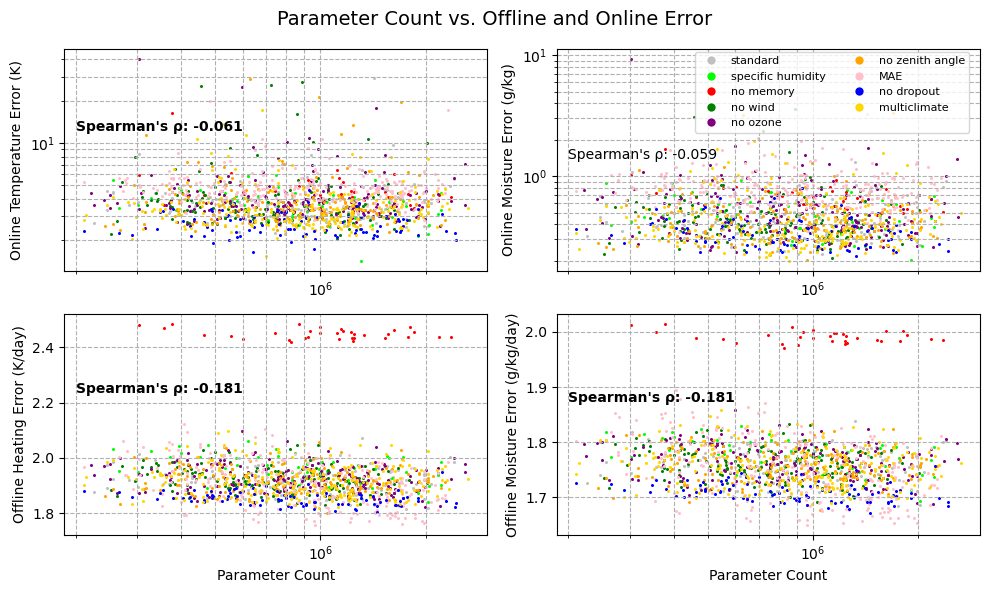

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0,0].scatter(survived_dict['standard']['parameter_count'], survived_dict['standard']['online_temperature'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[0,0].scatter(survived_dict['specific']['parameter_count'], survived_dict['specific']['online_temperature'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[0,0].scatter(survived_dict['nomemory']['parameter_count'], survived_dict['nomemory']['online_temperature'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[0,0].scatter(survived_dict['nowind']['parameter_count'], survived_dict['nowind']['online_temperature'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[0,0].scatter(survived_dict['noozone']['parameter_count'], survived_dict['noozone']['online_temperature'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[0,0].scatter(survived_dict['nocoszrs']['parameter_count'], survived_dict['nocoszrs']['online_temperature'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[0,0].scatter(survived_dict['mae']['parameter_count'], survived_dict['mae']['online_temperature'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[0,0].scatter(survived_dict['nodropout']['parameter_count'], survived_dict['nodropout']['online_temperature'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[0,0].scatter(survived_dict['multiclimate']['parameter_count'], survived_dict['multiclimate']['online_temperature'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[0,0].set_yscale('log')
axs[0,0].set_xscale('log')
axs[0,0].set_ylabel('Online Temperature Error (K)')
axs[0,0].grid(True, which="both", ls="--")
spearman_rho, pc_online_T_pval = spearmanr(combined_df['parameter_count'], combined_df['online_temperature'])
spearman_rho = np.round(spearman_rho, 3)
print(pc_online_T_pval)
axs[0,0].text(2e5, 13, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, fontweight = 'bold', ha='left', va='center')

axs[0,1].scatter(survived_dict['standard']['parameter_count'], survived_dict['standard']['online_moisture'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[0,1].scatter(survived_dict['specific']['parameter_count'], survived_dict['specific']['online_moisture'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[0,1].scatter(survived_dict['nomemory']['parameter_count'], survived_dict['nomemory']['online_moisture'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[0,1].scatter(survived_dict['nowind']['parameter_count'], survived_dict['nowind']['online_moisture'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[0,1].scatter(survived_dict['noozone']['parameter_count'], survived_dict['noozone']['online_moisture'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[0,1].scatter(survived_dict['nocoszrs']['parameter_count'], survived_dict['nocoszrs']['online_moisture'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[0,1].scatter(survived_dict['mae']['parameter_count'], survived_dict['mae']['online_moisture'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[0,1].scatter(survived_dict['nodropout']['parameter_count'], survived_dict['nodropout']['online_moisture'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[0,1].scatter(survived_dict['multiclimate']['parameter_count'], survived_dict['multiclimate']['online_moisture'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[0,1].set_yscale('log')
axs[0,1].set_xscale('log')
axs[0,1].set_ylabel('Online Moisture Error (g/kg)')
axs[0,1].grid(True, which="both", ls="--")
spearman_rho, pc_online_Q_pval = spearmanr(combined_df['parameter_count'], combined_df['online_moisture'])
spearman_rho = np.round(spearman_rho, 3)
print(pc_online_Q_pval)
axs[0,1].text(2e5, 1.5, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, ha='left', va='center')

axs[1,0].scatter(survived_dict['standard']['parameter_count'], survived_dict['standard']['offline_heating'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[1,0].scatter(survived_dict['specific']['parameter_count'], survived_dict['specific']['offline_heating'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[1,0].scatter(survived_dict['nomemory']['parameter_count'], survived_dict['nomemory']['offline_heating'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[1,0].scatter(survived_dict['nowind']['parameter_count'], survived_dict['nowind']['offline_heating'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[1,0].scatter(survived_dict['noozone']['parameter_count'], survived_dict['noozone']['offline_heating'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[1,0].scatter(survived_dict['nocoszrs']['parameter_count'], survived_dict['nocoszrs']['offline_heating'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[1,0].scatter(survived_dict['mae']['parameter_count'], survived_dict['mae']['offline_heating'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[1,0].scatter(survived_dict['nodropout']['parameter_count'], survived_dict['nodropout']['offline_heating'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[1,0].scatter(survived_dict['multiclimate']['parameter_count'], survived_dict['multiclimate']['offline_heating'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[1,0].set_xscale('log')
axs[1,0].set_xlabel('Parameter Count')
axs[1,0].set_ylabel('Offline Heating Error (K/day)')
axs[1,0].grid(True, which="both", ls="--")
spearman_rho, pc_offline_T_pval = spearmanr(combined_df['parameter_count'], combined_df['offline_heating'])
spearman_rho = np.round(spearman_rho, 3)
print(pc_offline_T_pval)
axs[1,0].text(2e5, 2.25, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, fontweight = 'bold', ha='left', va='center')

axs[1,1].scatter(survived_dict['standard']['parameter_count'], survived_dict['standard']['offline_moistening'], color = color_dict['standard'], label = 'standard', s = 1.4)
axs[1,1].scatter(survived_dict['specific']['parameter_count'], survived_dict['specific']['offline_moistening'], color = color_dict['specific'], label = 'specific humidity', s = 1.4)
axs[1,1].scatter(survived_dict['nomemory']['parameter_count'], survived_dict['nomemory']['offline_moistening'], color = color_dict['nomemory'], label = 'no memory', s = 1.4)
axs[1,1].scatter(survived_dict['nowind']['parameter_count'], survived_dict['nowind']['offline_moistening'], color = color_dict['nowind'], label = 'no wind', s = 1.4)
axs[1,1].scatter(survived_dict['noozone']['parameter_count'], survived_dict['noozone']['offline_moistening'], color = color_dict['noozone'], label = 'no ozone', s = 1.4)
axs[1,1].scatter(survived_dict['nocoszrs']['parameter_count'], survived_dict['nocoszrs']['offline_moistening'], color = color_dict['nocoszrs'], label = 'no zenith angle', s = 1.4)
axs[1,1].scatter(survived_dict['mae']['parameter_count'], survived_dict['mae']['offline_moistening'], color = color_dict['mae'], label = 'MAE', s = 1.4)
axs[1,1].scatter(survived_dict['nodropout']['parameter_count'], survived_dict['nodropout']['offline_moistening'], color = color_dict['nodropout'], label = 'no dropout', s = 1.4)
axs[1,1].scatter(survived_dict['multiclimate']['parameter_count'], survived_dict['multiclimate']['offline_moistening'], color = color_dict['multiclimate'], label = 'multiclimate', s = 1.4)
axs[1,1].set_xscale('log')
axs[1,1].set_xlabel('Parameter Count')
axs[1,1].set_ylabel('Offline Moisture Error (g/kg/day)')
axs[1,1].grid(True, which="both", ls="--")
spearman_rho, pc_offline_Q_pval = spearmanr(combined_df['parameter_count'], combined_df['offline_heating'])
spearman_rho = np.round(spearman_rho, 3)
print(pc_offline_Q_pval)
axs[1,1].text(2e5, 1.88, f"Spearman's \u03C1: {spearman_rho}", fontsize=10, fontweight = 'bold', ha='left', va='center')

handles, labels = axs[0,1].get_legend_handles_labels()
labels = ['standard', 'specific humidity', 'no memory', 'no wind', 'no ozone', 'no zenith angle', 'MAE', 'no dropout', 'multiclimate', 'minimum error']
colors = ['silver', 'lime', 'red', 'green', 'purple', 'orange', 'pink', 'blue', 'gold']
custom_handles = [Line2D([0], [0], marker='o', color='w', label=label,
                         markerfacecolor=color, markersize=7) for color, label in zip(colors, labels)]
fig.legend(handles=custom_handles, labels=labels, loc='upper right', ncol=2, fontsize=8, bbox_to_anchor=(.98, .92))

fig.suptitle('Parameter Count vs. Offline and Online Error', fontsize = 14)
plt.tight_layout()

4.039501349430273
4.042365962034366
4.3037388455032035
1.403858852119255 0.24601681055802638
0.531281472795435
0.5336130991434669
0.598594366466911
3.663869919714634 0.025896358497688985
1.9275788609858595
1.9262140335620574
1.9300173458257883
0.1487948610308529 0.861760447573513
1.7590405081788192
1.758696541699739
1.7630880271962817
0.8506004738314447 0.427394320748435
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.002     0.996    -0.064     0.059
 (0 - 2)     -0.067     0.042    -0.133    -0.002
 (1 - 0)      0.002     0.996    -0.059     0.064
 (1 - 2)     -0.065     0.049    -0.130    -0.000
 (2 - 0)      0.067     0.042     0.002     0.133
 (2 - 1)      0.065     0.049     0.000     0.130



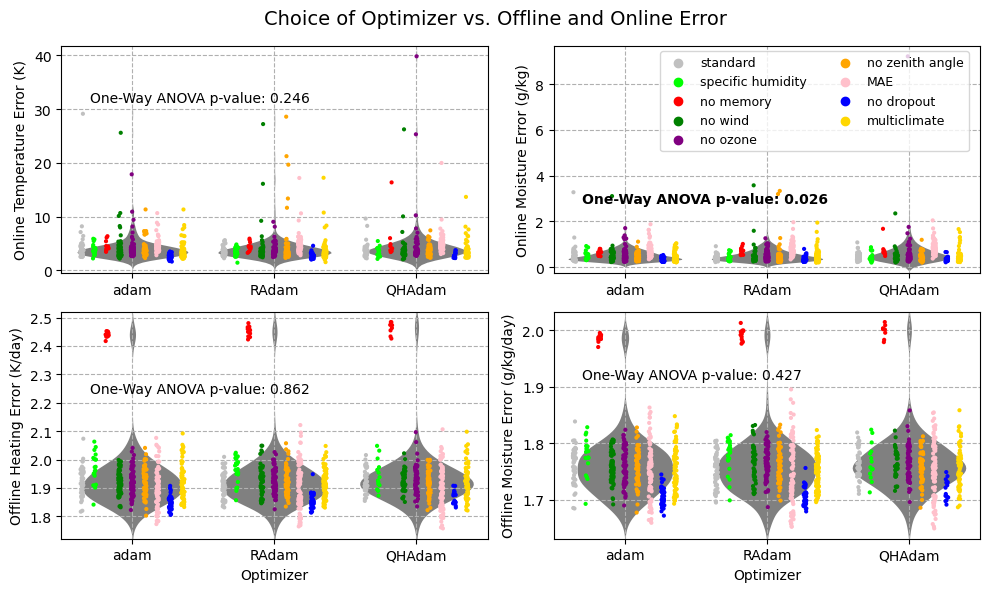

In [17]:
print(combined_df[combined_df['optimizer']=='adam']['online_temperature'].mean())
print(combined_df[combined_df['optimizer']=='RAdam']['online_temperature'].mean())
print(combined_df[combined_df['optimizer']=='QHAdam']['online_temperature'].mean())
opt_online_t_anova_stat, opt_online_t_anova_pval = stats.f_oneway(combined_df[combined_df['optimizer']=='adam']['online_temperature'], \
                                                                   combined_df[combined_df['optimizer']=='RAdam']['online_temperature'], \
                                                                   combined_df[combined_df['optimizer']=='QHAdam']['online_temperature'])
print(opt_online_t_anova_stat, opt_online_t_anova_pval)

print(combined_df[combined_df['optimizer']=='adam']['online_moisture'].mean())
print(combined_df[combined_df['optimizer']=='RAdam']['online_moisture'].mean())
print(combined_df[combined_df['optimizer']=='QHAdam']['online_moisture'].mean())
opt_online_q_anova_stat, opt_online_q_anova_pval = stats.f_oneway(combined_df[combined_df['optimizer']=='adam']['online_moisture'], \
                                                                   combined_df[combined_df['optimizer']=='RAdam']['online_moisture'], \
                                                                   combined_df[combined_df['optimizer']=='QHAdam']['online_moisture'])
print(opt_online_q_anova_stat, opt_online_q_anova_pval)

print(combined_df[combined_df['optimizer']=='adam']['offline_heating'].mean())
print(combined_df[combined_df['optimizer']=='RAdam']['offline_heating'].mean())
print(combined_df[combined_df['optimizer']=='QHAdam']['offline_heating'].mean())
opt_offline_t_anova_stat, opt_offline_t_anova_pval = stats.f_oneway(combined_df[combined_df['optimizer']=='adam']['offline_heating'], \
                                                                     combined_df[combined_df['optimizer']=='RAdam']['offline_heating'], \
                                                                     combined_df[combined_df['optimizer']=='QHAdam']['offline_heating'])
print(opt_offline_t_anova_stat, opt_offline_t_anova_pval)

print(combined_df[combined_df['optimizer']=='adam']['offline_moistening'].mean())
print(combined_df[combined_df['optimizer']=='RAdam']['offline_moistening'].mean())
print(combined_df[combined_df['optimizer']=='QHAdam']['offline_moistening'].mean())
opt_offline_q_anova_stat, opt_offline_q_anova_pval = stats.f_oneway(combined_df[combined_df['optimizer']=='adam']['offline_moistening'], \
                                                                     combined_df[combined_df['optimizer']=='RAdam']['offline_moistening'], \
                                                                     combined_df[combined_df['optimizer']=='QHAdam']['offline_moistening'])
print(opt_offline_q_anova_stat, opt_offline_q_anova_pval)

res = stats.tukey_hsd(combined_df[combined_df['optimizer']=='adam']['online_moisture'], \
                      combined_df[combined_df['optimizer']=='RAdam']['online_moisture'], \
                      combined_df[combined_df['optimizer']=='QHAdam']['online_moisture'])
print(res)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

violin_palette = sns.color_palette(['grey', 'grey', 'grey'])
strip_palette = sns.color_palette(['silver', 'lime', 'red', 'green', 'purple', 'orange', 'pink', 'blue', 'gold'])

sns.violinplot(x='optimizer', y='online_temperature', data=combined_df, order = ['adam', 'RAdam', 'QHAdam'], ax = axes[0,0], linewidth = 0, palette = violin_palette)
sns.violinplot(x='optimizer', y='online_moisture', data=combined_df, order = ['adam', 'RAdam', 'QHAdam'], ax = axes[0,1], linewidth = 0, palette = violin_palette)
sns.violinplot(x='optimizer', y='offline_heating', data=combined_df, order = ['adam', 'RAdam', 'QHAdam'], ax = axes[1,0], linewidth = 0, palette = violin_palette)
sns.violinplot(x='optimizer', y='offline_moistening', data=combined_df, order = ['adam', 'RAdam', 'QHAdam'], ax = axes[1,1], linewidth = 0, palette = violin_palette)

sns.stripplot(x='optimizer', y='online_temperature', data=combined_df, hue = 'config_name', order = ['adam', 'RAdam', 'QHAdam'], ax = axes[0,0], size = 3, palette = strip_palette, dodge = True)
sns.stripplot(x='optimizer', y='online_moisture', data=combined_df, hue = 'config_name', order = ['adam', 'RAdam', 'QHAdam'], ax = axes[0,1], size = 3, palette = strip_palette, dodge = True)
sns.stripplot(x='optimizer', y='offline_heating', data=combined_df, hue = 'config_name', order = ['adam', 'RAdam', 'QHAdam'], ax = axes[1,0], size = 3, palette = strip_palette, dodge = True)
sns.stripplot(x='optimizer', y='offline_moistening', data=combined_df, hue = 'config_name', order = ['adam', 'RAdam', 'QHAdam'], ax = axes[1,1], size = 3, palette = strip_palette, dodge = True)

axes[0,0].text(-.3, 32, f"One-Way ANOVA p-value: {np.round(opt_online_t_anova_pval,3)}", fontsize=10, ha='left', va='center')
axes[0,1].text(-.3, 3, f"One-Way ANOVA p-value: {np.round(opt_online_q_anova_pval,3)}", fontsize=10, fontweight = 'bold', ha='left', va='center')
axes[1,0].text(-.3, 2.25, f"One-Way ANOVA p-value: {np.round(opt_offline_t_anova_pval,3)}", fontsize=10, ha='left', va='center')
axes[1,1].text(-.3, 1.92, f"One-Way ANOVA p-value: {np.round(opt_offline_q_anova_pval,3)}", fontsize=10, ha='left', va='center')

axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[1,0].set_xlabel('Optimizer')
axes[1,1].set_xlabel('Optimizer')

axes[0,0].set_ylabel('Online Temperature Error (K)')
axes[0,1].set_ylabel('Online Moisture Error (g/kg)')
axes[1,0].set_ylabel('Offline Heating Error (K/day)')
axes[1,1].set_ylabel('Offline Moisture Error (g/kg/day)')

axes[0,0].grid(True, ls="--")
axes[1,0].grid(True, ls="--")
axes[0,1].grid(True, ls="--")
axes[1,1].grid(True, ls="--")

axes[0,0].get_legend().set_visible(False)
axes[0,1].get_legend().set_visible(False)
axes[1,0].get_legend().set_visible(False)
axes[1,1].get_legend().set_visible(False)

handles, labels = axes[0,1].get_legend_handles_labels()
labels = ['standard', 'specific humidity', 'no memory', 'no wind', 'no ozone', 'no zenith angle', 'MAE', 'no dropout', 'multiclimate']
fig.legend(handles, labels, loc='upper right', ncol=2, fontsize = 9, bbox_to_anchor=(.98, .92))

fig.suptitle('Choice of Optimizer vs. Offline and Online Error', fontsize = 14)
plt.tight_layout()

In [18]:
adam_vs_radam_online_Q_pval = 0.996
adam_vs_qhadam_online_Q_pval = 0.042
radam_vs_qhadam_online_Q_pval = 0.049

3.7120372531241554
4.775397675138736
-6.105495403332872 1.9060623531976923e-09
0.49513035800046795
0.643265446764305
-5.4836176375998535 6.218958865807267e-08
1.920162737747565
1.9401992904372283
-3.5801165465810403 0.00035781793586385545
1.7553642092958244
1.7677592930504362
-4.2013677434334395 2.864165880205721e-05


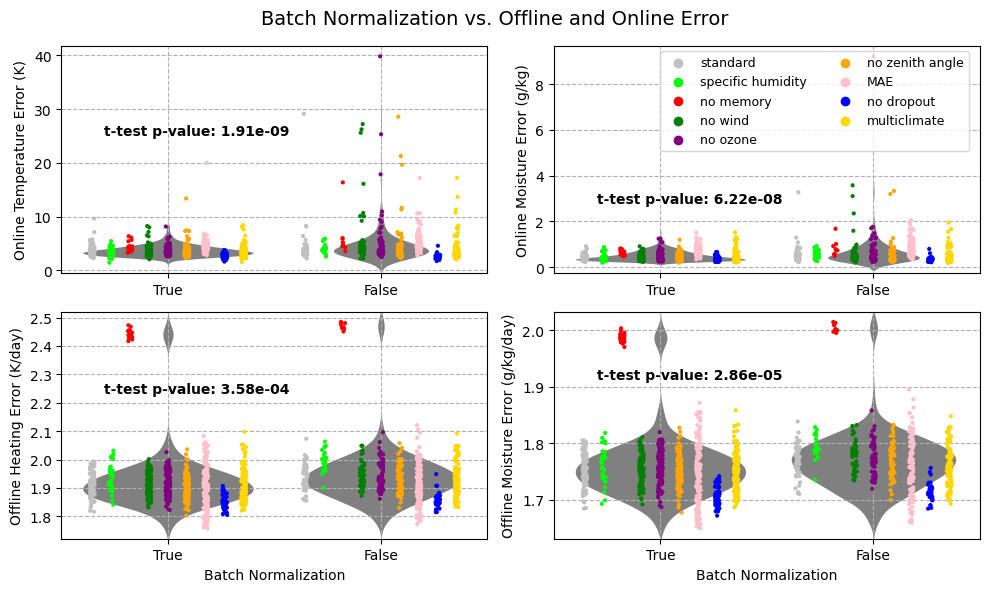

In [19]:
print(combined_df[combined_df['batch_normalization']==True]['online_temperature'].mean())
print(combined_df[combined_df['batch_normalization']==False]['online_temperature'].mean())
bn_online_t_ttest_stat, bn_online_t_ttest_pval = stats.ttest_ind(combined_df[combined_df['batch_normalization']==True]['online_temperature'], \
                                                                  combined_df[combined_df['batch_normalization']==False]['online_temperature'], equal_var = False)
print(bn_online_t_ttest_stat, bn_online_t_ttest_pval)

print(combined_df[combined_df['batch_normalization']==True]['online_moisture'].mean())
print(combined_df[combined_df['batch_normalization']==False]['online_moisture'].mean())
bn_online_q_ttest_stat, bn_online_q_ttest_pval = stats.ttest_ind(combined_df[combined_df['batch_normalization']==True]['online_moisture'], \
                                                                  combined_df[combined_df['batch_normalization']==False]['online_moisture'], equal_var = False)
print(bn_online_q_ttest_stat, bn_online_q_ttest_pval)

print(combined_df[combined_df['batch_normalization']==True]['offline_heating'].mean())
print(combined_df[combined_df['batch_normalization']==False]['offline_heating'].mean())
bn_offline_t_ttest_stat, bn_offline_t_ttest_pval = stats.ttest_ind(combined_df[combined_df['batch_normalization']==True]['offline_heating'], \
                                                                    combined_df[combined_df['batch_normalization']==False]['offline_heating'], equal_var = False)
print(bn_offline_t_ttest_stat, bn_offline_t_ttest_pval)

print(combined_df[combined_df['batch_normalization']==True]['offline_moistening'].mean())
print(combined_df[combined_df['batch_normalization']==False]['offline_moistening'].mean())
bn_offline_q_ttest_stat, bn_offline_q_ttest_pval = stats.ttest_ind(combined_df[combined_df['batch_normalization']==True]['offline_moistening'], \
                                                                    combined_df[combined_df['batch_normalization']==False]['offline_moistening'], equal_var = False)
print(bn_offline_q_ttest_stat, bn_offline_q_ttest_pval)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

violin_palette = sns.color_palette(['grey', 'grey'])
strip_palette = sns.color_palette(['silver', 'lime', 'red', 'green', 'purple', 'orange', 'pink', 'blue', 'gold'])

sns.violinplot(x='batch_normalization', y='online_temperature', data=combined_df, order = [True, False], ax = axes[0,0], linewidth = 0, palette = violin_palette)
sns.violinplot(x='batch_normalization', y='online_moisture', data=combined_df, order = [True, False], ax = axes[0,1], linewidth = 0, palette = violin_palette)
sns.violinplot(x='batch_normalization', y='offline_heating', data=combined_df, order = [True, False], ax = axes[1,0], linewidth = 0, palette = violin_palette)
sns.violinplot(x='batch_normalization', y='offline_moistening', data=combined_df, order = [True, False], ax = axes[1,1], linewidth = 0, palette = violin_palette)

sns.stripplot(x='batch_normalization', y='online_temperature', data=combined_df, hue = 'config_name', order = [True, False], ax = axes[0,0], size = 3, palette = strip_palette, dodge = True)
sns.stripplot(x='batch_normalization', y='online_moisture', data=combined_df, hue = 'config_name', order = [True, False], ax = axes[0,1], size = 3, palette = strip_palette, dodge = True)
sns.stripplot(x='batch_normalization', y='offline_heating', data=combined_df, hue = 'config_name', order = [True, False], ax = axes[1,0], size = 3, palette = strip_palette, dodge = True)
sns.stripplot(x='batch_normalization', y='offline_moistening', data=combined_df, hue = 'config_name', order = [True, False], ax = axes[1,1], size = 3, palette = strip_palette, dodge = True)

axes[0,0].text(-.3, 26, f"t-test p-value: {bn_online_t_ttest_pval:.2e}", fontsize=10, fontweight = 'bold', ha='left', va='center')
axes[0,1].text(-.3, 3, f"t-test p-value: {bn_online_q_ttest_pval:.2e}", fontsize=10, fontweight = 'bold', ha='left', va='center')
axes[1,0].text(-.3, 2.25, f"t-test p-value: {bn_offline_t_ttest_pval:.2e}", fontsize=10, fontweight = 'bold', ha='left', va='center')
axes[1,1].text(-.3, 1.92, f"t-test p-value: {bn_offline_q_ttest_pval:.2e}", fontsize=10, fontweight = 'bold', ha='left', va='center')

axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[1,0].set_xlabel('Batch Normalization')
axes[1,1].set_xlabel('Batch Normalization')

axes[0,0].get_legend().set_visible(False)
axes[0,1].get_legend().set_visible(False)
axes[1,0].get_legend().set_visible(False)
axes[1,1].get_legend().set_visible(False)

axes[0,0].set_ylabel('Online Temperature Error (K)')
axes[0,1].set_ylabel('Online Moisture Error (g/kg)')
axes[1,0].set_ylabel('Offline Heating Error (K/day)')
axes[1,1].set_ylabel('Offline Moisture Error (g/kg/day)')

axes[0,0].grid(True, ls="--")
axes[1,0].grid(True, ls="--")
axes[0,1].grid(True, ls="--")
axes[1,1].grid(True, ls="--")

handles, labels = axes[0,1].get_legend_handles_labels()
labels = ['standard', 'specific humidity', 'no memory', 'no wind', 'no ozone', 'no zenith angle', 'MAE', 'no dropout', 'multiclimate']
fig.legend(handles, labels, loc='upper right', ncol=2, fontsize = 9, bbox_to_anchor=(.98, .92))

fig.suptitle('Batch Normalization vs. Offline and Online Error', fontsize = 14)
plt.tight_layout()

0.12313590176319794
0.12751528951498686
-1.5495912493172423 0.12136107035254383
0.20008593895445165
0.19850634837707568
0.3723330455337543 0.7096725300916646
0.00036084853943991666
0.00041122539312731963
-5.532523260570228 3.440504198913371e-08
970956.7233231707
988170.2448733414
-0.9185461374293127 0.3584106082757349
adam stability: 0.4521224086870681
radam stability: 0.48133198789101916
qhadam stability: 0.39026915113871635
radam vs adam stability p-value:
0.19004304050876297
qhadam vs adam stability p-value:
0.005353057024465031
radam vs qhadam stability p-value:
4.88389071691131e-05
0.0


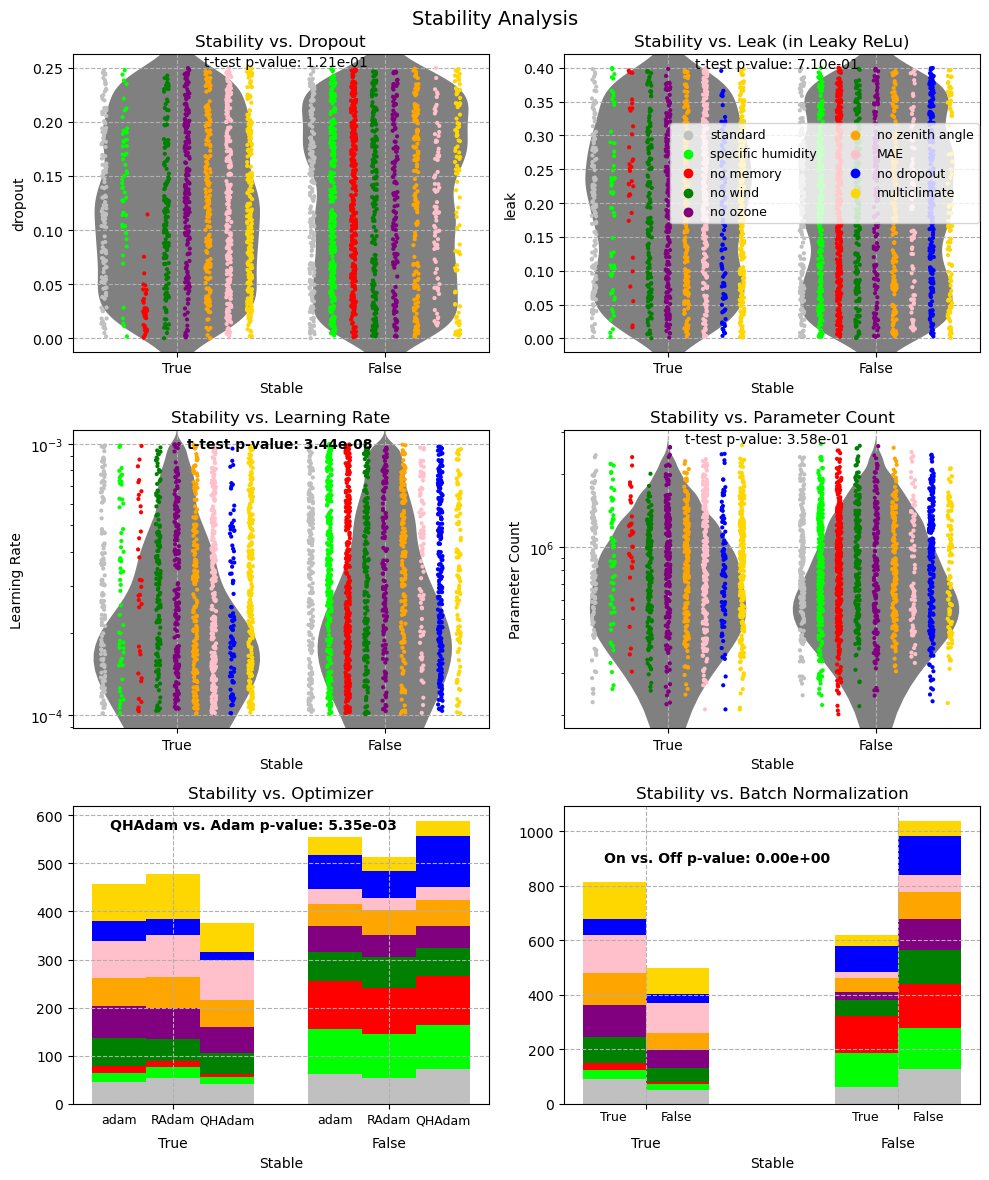

In [20]:
print(combined_df_dropout_complete[combined_df_dropout_complete['stable']==True]['dropout'].mean())
print(combined_df_dropout_complete[combined_df_dropout_complete['stable']==False]['dropout'].mean())
stable_dropout_ttest_stat, stable_dropout_ttest_pval = stats.ttest_ind(combined_df_dropout_complete[combined_df_dropout_complete['stable']==True]['dropout'], \
                                                                       combined_df_dropout_complete[combined_df_dropout_complete['stable']==False]['dropout'], equal_var = False)
print(stable_dropout_ttest_stat, stable_dropout_ttest_pval)

print(combined_df_complete[combined_df_complete['stable']==True]['leak'].mean())
print(combined_df_complete[combined_df_complete['stable']==False]['leak'].mean())
stable_leak_ttest_stat, stable_leak_ttest_pval = stats.ttest_ind(combined_df_complete[combined_df_complete['stable']==True]['leak'], \
                                                                 combined_df_complete[combined_df_complete['stable']==False]['leak'], equal_var = False)
print(stable_leak_ttest_stat, stable_leak_ttest_pval)

print(combined_df_complete[combined_df_complete['stable']==True]['lr'].mean())
print(combined_df_complete[combined_df_complete['stable']==False]['lr'].mean())
stable_lr_ttest_stat, stable_lr_ttest_pval = stats.ttest_ind(combined_df_complete[combined_df_complete['stable']==True]['lr'], \
                                                             combined_df_complete[combined_df_complete['stable']==False]['lr'], equal_var = False)
print(stable_lr_ttest_stat, stable_lr_ttest_pval)

print(combined_df_complete[combined_df_complete['stable']==True]['parameter_count'].mean())
print(combined_df_complete[combined_df_complete['stable']==False]['parameter_count'].mean())
stable_pc_ttest_stat, stable_pc_ttest_pval = stats.ttest_ind(combined_df_complete[combined_df_complete['stable']==True]['parameter_count'], \
                                                             combined_df_complete[combined_df_complete['stable']==False]['parameter_count'], equal_var = False)
print(stable_pc_ttest_stat, stable_pc_ttest_pval)

def two_sample_prop_pvalue(x1, x2, n1, n2):
    p1 = x1 / n1
    p2 = x2 / n2
    p = (x1 + x2) / (n1 + n2)
    zstatistic = (p1 - p2) / np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))
    if zstatistic < 0:
        return (stats.norm.cdf(zstatistic))*2
    else:
        return (1 - stats.norm.cdf(zstatistic))*2

adam_stable = sum(combined_df_complete[combined_df_complete['optimizer']=='adam']['stable'])
adam_unstable = sum(~combined_df_complete[combined_df_complete['optimizer']=='adam']['stable'])
radam_stable = sum(combined_df_complete[combined_df_complete['optimizer']=='RAdam']['stable'])
radam_unstable = sum(~combined_df_complete[combined_df_complete['optimizer']=='RAdam']['stable'])
qhadam_stable = sum(combined_df_complete[combined_df_complete['optimizer']=='QHAdam']['stable'])
qhadam_unstable = sum(~combined_df_complete[combined_df_complete['optimizer']=='QHAdam']['stable'])

print('adam stability:', adam_stable/(adam_stable + adam_unstable))
print('radam stability:', radam_stable/(radam_stable + radam_unstable))
print('qhadam stability:', qhadam_stable/(qhadam_stable + qhadam_unstable))

radam_stability_pvalue = two_sample_prop_pvalue(radam_stable, adam_stable, radam_stable + radam_unstable, adam_stable + adam_unstable)
print('radam vs adam stability p-value:')
print(radam_stability_pvalue)

qhadam_stability_pvalue = two_sample_prop_pvalue(qhadam_stable, adam_stable, qhadam_stable + qhadam_unstable, adam_stable + adam_unstable)
print('qhadam vs adam stability p-value:')
print(qhadam_stability_pvalue)

radamvsqhadam_stability_pvalue = two_sample_prop_pvalue(radam_stable, qhadam_stable, radam_stable + radam_unstable, qhadam_stable + qhadam_unstable)
print('radam vs qhadam stability p-value:')
print(radamvsqhadam_stability_pvalue)

bn_on_stable = sum(combined_df_complete[combined_df_complete['batch_normalization']==True]['stable'])
bn_on_unstable = sum(~combined_df_complete[combined_df_complete['batch_normalization']==True]['stable'])
bn_off_stable = sum(combined_df_complete[combined_df_complete['batch_normalization']==False]['stable'])
bn_off_unstable = sum(~combined_df_complete[combined_df_complete['batch_normalization']==False]['stable'])

bn_stability_pvalue = two_sample_prop_pvalue(bn_on_stable, bn_off_stable, bn_on_stable + bn_on_unstable, bn_off_stable + bn_off_unstable)
print(bn_stability_pvalue)

fig, axes = plt.subplots(3, 2, figsize=(10, 12))

violin_palette = sns.color_palette(['grey', 'grey'])
strip_palette = sns.color_palette(['silver', 'lime', 'red', 'green', 'purple', 'orange', 'pink', 'gold'])

sns.violinplot(x='stable', y='dropout', data=combined_df_dropout_complete, order = [True, False], ax = axes[0,0], linewidth = 0, palette = violin_palette)
sns.stripplot(x='stable', y='dropout', data=combined_df_dropout_complete, hue = 'config_name', order = [True, False], ax = axes[0,0], size = 3, palette = strip_palette, dodge = True)
axes[0,0].set_title('Stability vs. Dropout')
axes[0,0].set_xlabel('Stable')
axes[0,0].text(.13, .255, f"t-test p-value: {stable_dropout_ttest_pval:.2e}", fontsize=10, ha='left', va='center')

strip_palette = sns.color_palette(['silver', 'lime', 'red', 'green', 'purple', 'orange', 'pink', 'blue', 'gold'])
sns.violinplot(x='stable', y='leak', data=combined_df_complete, order = [True, False], ax = axes[0,1], linewidth = 0, palette = violin_palette)
sns.stripplot(x='stable', y='leak', data=combined_df_complete, hue = 'config_name', order = [True, False], ax = axes[0,1], size = 3, palette = strip_palette, dodge = True)
axes[0,1].set_title('Stability vs. Leak (in Leaky ReLu)')
axes[0,1].set_xlabel('Stable')
axes[0,1].text(.13, .405, f"t-test p-value: {stable_leak_ttest_pval:.2e}", fontsize=10, ha='left', va='center')

sns.violinplot(x='stable', y='lr', data=combined_df_complete, order = [True, False], ax = axes[1,0], linewidth = 0, palette = violin_palette)
sns.stripplot(x='stable', y='lr', data=combined_df_complete, hue = 'config_name', order = [True, False], ax = axes[1,0], size = 3, palette = strip_palette, dodge = True)
axes[1,0].set_yscale('log')
axes[1,0].set_xlabel('Stable')
axes[1,0].set_ylabel('Learning Rate')
axes[1,0].set_title('Stability vs. Learning Rate')
axes[1,0].text(.05, 1e-3, f"t-test p-value: {stable_lr_ttest_pval:.2e}", fontweight = 'bold', fontsize=10, ha='left', va='center')

sns.violinplot(x='stable', y='parameter_count', data=combined_df_complete, order = [True, False], ax = axes[1,1], linewidth = 0, palette = violin_palette)
sns.stripplot(x='stable', y='parameter_count', data=combined_df_complete, hue = 'config_name', order = [True, False], ax = axes[1,1], size = 3, palette = strip_palette, dodge = True)
axes[1,1].set_yscale('log')
axes[1,1].set_xlabel('Stable')
axes[1,1].set_ylabel('Parameter Count')
axes[1,1].set_title('Stability vs. Parameter Count')
axes[1,1].text(.08, 2.8e6, f"t-test p-value: {stable_pc_ttest_pval:.2e}", fontsize=10, ha='left', va='center')

optimizer_counts = Counter(zip(combined_df_complete["optimizer"], combined_df_complete["stable"], combined_df_complete["config_name"]))
optimizers = ['adam', 'RAdam', 'QHAdam']
stability_values = [True, False]
configs_sorted = ['standard', 'specific', 'nomemory', 'nowind', 'noozone', 'nocoszrs', 'mae', 'nodropout', 'multiclimate']
color_map = {
    'standard': 'silver',
    'specific': 'lime',
    'nomemory': 'red',
    'nowind': 'green',
    'noozone': 'purple',
    'nocoszrs': 'orange',
    'mae':'pink',
    'nodropout': 'blue',
    'multiclimate': 'gold'
}
bar_width = 0.25
x = np.arange(len(stability_values))
for i, optimizer in enumerate(optimizers):
    base_heights = np.zeros(len(stability_values))
    for config in configs_sorted:
        heights = np.array([optimizer_counts[(optimizer, stability_val, config)] for stability_val in stability_values])
        bar_positions = x + i * bar_width  # Offset positions for grouped bars
        axes[2,0].bar(
            bar_positions, 
            heights, 
            bar_width, 
            bottom=base_heights, 
            color=color_map[config], 
            label=config if i == 0 else None  # Add label only for the first set of bars
        )
        base_heights += heights
for i, optimizer in enumerate(optimizers):
    for stability_val_idx, stability_val in enumerate(stability_values):
        x_pos = stability_val_idx + i * bar_width - (len(optimizers) - 1) * bar_width / 2 + .25
        axes[2,0].text(
            x_pos, 
            -20,  # Place below the x-axis
            optimizer, 
            ha="center", 
            va="top", 
            rotation=0, 
            fontsize=9
        )
axes[2,0].set_xticks(x + (len(optimizers) - 1) * bar_width / 2)
axes[2,0].set_xticklabels(stability_values)
axes[2,0].tick_params(axis="x", pad=20)  # Increase padding to accommodate new labels
axes[2,0].set_title('Stability vs. Optimizer')
axes[2,0].set_xlabel('Stable')
axes[2,0].text(-.04, 580, f"QHAdam vs. Adam p-value: {qhadam_stability_pvalue:.2e}", fontweight = 'bold', fontsize=10, ha='left', va='center')

bn_counts = Counter(zip(combined_df_complete["batch_normalization"], combined_df_complete["stable"], combined_df_complete["config_name"]))
bn_options = [True, False]
stability_values = [True, False]
configs_sorted = ['standard', 'specific', 'nomemory', 'nowind', 'noozone', 'nocoszrs', 'mae', 'nodropout', 'multiclimate']
color_map = {
    'standard': 'silver',
    'specific': 'lime',
    'nomemory': 'red',
    'nowind': 'green',
    'noozone': 'purple',
    'nocoszrs': 'orange',
    'mae':'pink',
    'nodropout': 'blue',
    'multiclimate': 'gold'
}
bar_width = 0.25
x = np.arange(len(stability_values))
for i, bn in enumerate(bn_options):
    base_heights = np.zeros(len(stability_values))
    for config in configs_sorted:
        heights = np.array([bn_counts[(bn, stability_val, config)] for stability_val in stability_values])
        bar_positions = x + i * bar_width  # Offset positions for grouped bars
        axes[2,1].bar(
            bar_positions, 
            heights, 
            bar_width, 
            bottom=base_heights, 
            color=color_map[config], 
            label=config if i == 0 else None  # Add label only for the first set of bars
        )
        base_heights += heights
for i, bn in enumerate(bn_options):
    for stability_val_idx, stability_val in enumerate(stability_values):
        x_pos = stability_val_idx + i * bar_width - (len(bn_options) - 1) * bar_width / 2 + .12
        axes[2,1].text(
            x_pos, 
            -23,  # Place below the x-axis
            bn, 
            ha="center", 
            va="top", 
            rotation=0, 
            fontsize=9
        )
axes[2,1].set_xticks(x + (len(bn_options) - 1) * bar_width / 2)
axes[2,1].set_xticklabels(stability_values)
axes[2,1].tick_params(axis="x", pad=20)  # Increase padding to accommodate new labels
axes[2,1].set_title('Stability vs. Batch Normalization')
axes[2,1].set_xlabel('Stable')
axes[2,1].text(-.04, 900, f"On vs. Off p-value: {bn_stability_pvalue:.2e}", fontweight = 'bold', fontsize=10, ha='left', va='center')

axes[0,0].get_legend().set_visible(False)
axes[0,1].get_legend().set_visible(False)
axes[1,0].get_legend().set_visible(False)
axes[1,1].get_legend().set_visible(False)

axes[0,0].grid(True, ls="--")
axes[0,1].grid(True, ls="--")
axes[1,0].grid(True, ls="--")
axes[1,1].grid(True, ls="--")
axes[2,0].grid(True, ls="--")
axes[2,1].grid(True, ls="--")

handles, labels = axes[0,1].get_legend_handles_labels()
labels = ['standard', 'specific humidity', 'no memory', 'no wind', 'no ozone', 'no zenith angle', 'MAE', 'no dropout', 'multiclimate']
fig.legend(handles, labels, loc='upper right', ncol=2, fontsize = 9, bbox_to_anchor=(.99, .89))

fig.suptitle('Stability Analysis', fontsize = 14)
plt.tight_layout()

# Hypothesis tests

In [21]:
heating_pvals = [scipy.stats.ttest_ind(specific_model_info['offline_heating'], standard_model_info['offline_heating'], equal_var = False)[1], \
                 scipy.stats.ttest_ind(nomemory_model_info['offline_heating'], standard_model_info['offline_heating'], equal_var = False)[1], \
                 scipy.stats.ttest_ind(nowind_model_info['offline_heating'], standard_model_info['offline_heating'], equal_var = False)[1], \
                 scipy.stats.ttest_ind(noozone_model_info['offline_heating'], standard_model_info['offline_heating'], equal_var = False)[1], \
                 scipy.stats.ttest_ind(nocoszrs_model_info['offline_heating'], standard_model_info['offline_heating'], equal_var = False)[1], \
                 scipy.stats.ttest_ind(mae_model_info['offline_heating'], standard_model_info['offline_heating'], equal_var = False)[1], \
                 scipy.stats.ttest_ind(nodropout_model_info['offline_heating'], standard_model_info['offline_heating'], equal_var = False)[1], \
                 scipy.stats.ttest_ind(multiclimate_model_info['offline_heating'], standard_model_info['offline_heating'], equal_var = False)[1]]

moistening_pvals = [scipy.stats.ttest_ind(specific_model_info['offline_moistening'], standard_model_info['offline_moistening'], equal_var = False)[1], \
                    scipy.stats.ttest_ind(nomemory_model_info['offline_moistening'], standard_model_info['offline_moistening'], equal_var = False)[1], \
                    scipy.stats.ttest_ind(nowind_model_info['offline_moistening'], standard_model_info['offline_moistening'], equal_var = False)[1], \
                    scipy.stats.ttest_ind(noozone_model_info['offline_moistening'], standard_model_info['offline_moistening'], equal_var = False)[1], \
                    scipy.stats.ttest_ind(nocoszrs_model_info['offline_moistening'], standard_model_info['offline_moistening'], equal_var = False)[1], \
                    scipy.stats.ttest_ind(mae_model_info['offline_moistening'], standard_model_info['offline_moistening'], equal_var = False)[1], \
                    scipy.stats.ttest_ind(nodropout_model_info['offline_moistening'], standard_model_info['offline_moistening'], equal_var = False)[1], \
                    scipy.stats.ttest_ind(multiclimate_model_info['offline_moistening'], standard_model_info['offline_moistening'], equal_var = False)[1]]

heating_multi_pvals = [scipy.stats.ttest_ind(specific_model_info['offline_heating_multi'], standard_model_info['offline_heating_multi'], equal_var = False)[1], \
                       scipy.stats.ttest_ind(nomemory_model_info['offline_heating_multi'], standard_model_info['offline_heating_multi'], equal_var = False)[1], \
                       scipy.stats.ttest_ind(nowind_model_info['offline_heating_multi'], standard_model_info['offline_heating_multi'], equal_var = False)[1], \
                       scipy.stats.ttest_ind(noozone_model_info['offline_heating_multi'], standard_model_info['offline_heating_multi'], equal_var = False)[1], \
                       scipy.stats.ttest_ind(nocoszrs_model_info['offline_heating_multi'], standard_model_info['offline_heating_multi'], equal_var = False)[1], \
                       scipy.stats.ttest_ind(mae_model_info['offline_heating_multi'], standard_model_info['offline_heating_multi'], equal_var = False)[1], \
                       scipy.stats.ttest_ind(nodropout_model_info['offline_heating_multi'], standard_model_info['offline_heating_multi'], equal_var = False)[1], \
                       scipy.stats.ttest_ind(multiclimate_model_info['offline_heating_multi'], standard_model_info['offline_heating_multi'], equal_var = False)[1]]

moistening_multi_pvals = [scipy.stats.ttest_ind(specific_model_info['offline_moistening_multi'], standard_model_info['offline_moistening_multi'], equal_var = False)[1], \
                          scipy.stats.ttest_ind(nomemory_model_info['offline_moistening_multi'], standard_model_info['offline_moistening_multi'], equal_var = False)[1], \
                          scipy.stats.ttest_ind(nowind_model_info['offline_moistening_multi'], standard_model_info['offline_moistening_multi'], equal_var = False)[1], \
                          scipy.stats.ttest_ind(noozone_model_info['offline_moistening_multi'], standard_model_info['offline_moistening_multi'], equal_var = False)[1], \
                          scipy.stats.ttest_ind(nocoszrs_model_info['offline_moistening_multi'], standard_model_info['offline_moistening_multi'], equal_var = False)[1], \
                          scipy.stats.ttest_ind(mae_model_info['offline_moistening_multi'], standard_model_info['offline_moistening_multi'], equal_var = False)[1], \
                          scipy.stats.ttest_ind(nodropout_model_info['offline_moistening_multi'], standard_model_info['offline_moistening_multi'], equal_var = False)[1], \
                          scipy.stats.ttest_ind(multiclimate_model_info['offline_moistening_multi'], standard_model_info['offline_moistening_multi'], equal_var = False)[1]]

def permutation_test(df1, df2, var, quantile = .50, num_permutations = 10000):
    n1 = len(df1)
    observed_diff = df1[var].quantile(quantile) - df2[var].quantile(quantile)
    df = pd.concat([df1, df2], axis = 0)
    differences = []
    for i in range(num_permutations):
        df = df.sample(frac = 1).reset_index(drop=True)
        diff = df.iloc[:n1][var].quantile(quantile) - df.iloc[n1:][var].quantile(quantile)
        differences.append(diff)
    diffs = pd.Series(differences).sort_values()
    if observed_diff >= 0:
        pvalue = 2*sum(diffs >= observed_diff)/num_permutations
    else:
        pvalue = 2*sum(diffs < observed_diff)/num_permutations
    if pvalue >= 1:
        pvalue = 1
    return pvalue

temperature_pvals = [permutation_test(survived_dict['specific'], survived_dict['standard'], var = 'online_temperature'),
                     permutation_test(survived_dict['nomemory'], survived_dict['standard'], var = 'online_temperature'),
                     permutation_test(survived_dict['nowind'], survived_dict['standard'], var = 'online_temperature'),
                     permutation_test(survived_dict['noozone'], survived_dict['standard'], var = 'online_temperature'),
                     permutation_test(survived_dict['nocoszrs'], survived_dict['standard'], var = 'online_temperature'),
                     permutation_test(survived_dict['mae'], survived_dict['standard'], var = 'online_temperature'),
                     permutation_test(survived_dict['nodropout'], survived_dict['standard'], var = 'online_temperature'),
                     permutation_test(survived_dict['multiclimate'], survived_dict['standard'], var = 'online_temperature')]

moisture_pvals = [permutation_test(survived_dict['specific'], survived_dict['standard'], var = 'online_moisture'),
                  permutation_test(survived_dict['nomemory'], survived_dict['standard'], var = 'online_moisture'),
                  permutation_test(survived_dict['nowind'], survived_dict['standard'], var = 'online_moisture'),
                  permutation_test(survived_dict['noozone'], survived_dict['standard'], var = 'online_moisture'),
                  permutation_test(survived_dict['nocoszrs'], survived_dict['standard'], var = 'online_moisture'),
                  permutation_test(survived_dict['mae'], survived_dict['standard'], var = 'online_moisture'),
                  permutation_test(survived_dict['nodropout'], survived_dict['standard'], var = 'online_moisture'),
                  permutation_test(survived_dict['multiclimate'], survived_dict['standard'], var = 'online_moisture')]

standard_T_corr, standard_T_pval = spearmanr(survived_dict['standard']['offline_heating'], survived_dict['standard']['online_temperature'])
specific_T_corr, specific_T_pval = spearmanr(survived_dict['specific']['offline_heating'], survived_dict['specific']['online_temperature'])
nomemory_T_corr, nomemory_T_pval = spearmanr(survived_dict['nomemory']['offline_heating'], survived_dict['nomemory']['online_temperature'])
nowind_T_corr, nowind_T_pval = spearmanr(survived_dict['nowind']['offline_heating'], survived_dict['nowind']['online_temperature'])
noozone_T_corr, noozone_T_pval = spearmanr(survived_dict['noozone']['offline_heating'], survived_dict['noozone']['online_temperature'])
nocoszrs_T_corr, nocoszrs_T_pval = spearmanr(survived_dict['nocoszrs']['offline_heating'], survived_dict['nocoszrs']['online_temperature'])
mae_T_corr, mae_T_pval = spearmanr(survived_dict['mae']['offline_heating'], survived_dict['mae']['online_temperature'])
nodropout_T_corr, nodropout_T_pval = spearmanr(survived_dict['nodropout']['offline_heating'], survived_dict['nodropout']['online_temperature'])
multiclimate_T_corr, multiclimate_T_pval = spearmanr(survived_dict['multiclimate']['offline_heating'], survived_dict['multiclimate']['online_temperature'])

standard_Q_corr, standard_Q_pval = spearmanr(survived_dict['standard']['offline_moistening'], survived_dict['standard']['online_moisture'])
specific_Q_corr, specific_Q_pval = spearmanr(survived_dict['specific']['offline_moistening'], survived_dict['specific']['online_moisture'])
nomemory_Q_corr, nomemory_Q_pval = spearmanr(survived_dict['nomemory']['offline_moistening'], survived_dict['nomemory']['online_moisture'])
nowind_Q_corr, nowind_Q_pval = spearmanr(survived_dict['nowind']['offline_moistening'], survived_dict['nowind']['online_moisture'])
noozone_Q_corr, noozone_Q_pval = spearmanr(survived_dict['noozone']['offline_moistening'], survived_dict['noozone']['online_moisture'])
nocoszrs_Q_corr, nocoszrs_Q_pval = spearmanr(survived_dict['nocoszrs']['offline_moistening'], survived_dict['nocoszrs']['online_moisture'])
mae_Q_corr, mae_Q_pval = spearmanr(survived_dict['mae']['offline_moistening'], survived_dict['mae']['online_moisture'])
nodropout_Q_corr, nodropout_Q_pval = spearmanr(survived_dict['nodropout']['offline_moistening'], survived_dict['nodropout']['online_moisture'])
multiclimate_Q_corr, multiclimate_Q_pval = spearmanr(survived_dict['multiclimate']['offline_moistening'], survived_dict['multiclimate']['online_moisture'])

standard_T_multi_corr, standard_T_multi_pval = spearmanr(survived_dict['standard']['offline_heating_multi'], survived_dict['standard']['online_temperature'])
specific_T_multi_corr, specific_T_multi_pval = spearmanr(survived_dict['specific']['offline_heating_multi'], survived_dict['specific']['online_temperature'])
nomemory_T_multi_corr, nomemory_T_multi_pval = spearmanr(survived_dict['nomemory']['offline_heating_multi'], survived_dict['nomemory']['online_temperature'])
nowind_T_multi_corr, nowind_T_multi_pval = spearmanr(survived_dict['nowind']['offline_heating_multi'], survived_dict['nowind']['online_temperature'])
noozone_T_multi_corr, noozone_T_multi_pval = spearmanr(survived_dict['noozone']['offline_heating_multi'], survived_dict['noozone']['online_temperature'])
nocoszrs_T_multi_corr, nocoszrs_T_multi_pval = spearmanr(survived_dict['nocoszrs']['offline_heating_multi'], survived_dict['nocoszrs']['online_temperature'])
mae_T_multi_corr, mae_T_multi_pval = spearmanr(survived_dict['mae']['offline_heating_multi'], survived_dict['mae']['online_temperature'])
nodropout_T_multi_corr, nodropout_T_multi_pval = spearmanr(survived_dict['nodropout']['offline_heating_multi'], survived_dict['nodropout']['online_temperature'])
multiclimate_T_multi_corr, multiclimate_T_multi_pval = spearmanr(survived_dict['multiclimate']['offline_heating_multi'], survived_dict['multiclimate']['online_temperature'])

standard_Q_multi_corr, standard_Q_multi_pval = spearmanr(survived_dict['standard']['offline_moistening_multi'], survived_dict['standard']['online_moisture'])
specific_Q_multi_corr, specific_Q_multi_pval = spearmanr(survived_dict['specific']['offline_moistening_multi'], survived_dict['specific']['online_moisture'])
nomemory_Q_multi_corr, nomemory_Q_multi_pval = spearmanr(survived_dict['nomemory']['offline_moistening_multi'], survived_dict['nomemory']['online_moisture'])
nowind_Q_multi_corr, nowind_Q_multi_pval = spearmanr(survived_dict['nowind']['offline_moistening_multi'], survived_dict['nowind']['online_moisture'])
noozone_Q_multi_corr, noozone_Q_multi_pval = spearmanr(survived_dict['noozone']['offline_moistening_multi'], survived_dict['noozone']['online_moisture'])
nocoszrs_Q_multi_corr, nocoszrs_Q_multi_pval = spearmanr(survived_dict['nocoszrs']['offline_moistening_multi'], survived_dict['nocoszrs']['online_moisture'])
mae_Q_multi_corr, mae_Q_multi_pval = spearmanr(survived_dict['mae']['offline_moistening_multi'], survived_dict['mae']['online_moisture'])
nodropout_Q_multi_corr, nodropout_Q_multi_pval = spearmanr(survived_dict['nodropout']['offline_moistening_multi'], survived_dict['nodropout']['online_moisture'])
multiclimate_Q_multi_corr, multiclimate_Q_multi_pval = spearmanr(survived_dict['multiclimate']['offline_moistening_multi'], survived_dict['multiclimate']['online_moisture'])

offline_heating_overall = pd.concat([survived_dict['standard']['offline_heating'], \
                                     survived_dict['specific']['offline_heating'], \
                                     survived_dict['nomemory']['offline_heating'], \
                                     survived_dict['nowind']['offline_heating'], \
                                     survived_dict['noozone']['offline_heating'], \
                                     survived_dict['nocoszrs']['offline_heating'], \
                                     survived_dict['mae']['offline_heating'], \
                                     survived_dict['nodropout']['offline_heating'], \
                                     survived_dict['multiclimate']['offline_heating']], axis = 0)

offline_moistening_overall = pd.concat([survived_dict['standard']['offline_moistening'], \
                                        survived_dict['specific']['offline_moistening'], \
                                        survived_dict['nomemory']['offline_moistening'], \
                                        survived_dict['nowind']['offline_moistening'], \
                                        survived_dict['noozone']['offline_moistening'], \
                                        survived_dict['nocoszrs']['offline_moistening'], \
                                        survived_dict['mae']['offline_moistening'], \
                                        survived_dict['nodropout']['offline_moistening'], \
                                        survived_dict['multiclimate']['offline_moistening']], axis = 0)

online_temperature_overall = pd.concat([survived_dict['standard']['online_temperature'], \
                                        survived_dict['specific']['offline_moistening'], \
                                        survived_dict['nomemory']['online_temperature'], \
                                        survived_dict['nowind']['online_temperature'], \
                                        survived_dict['noozone']['online_temperature'], \
                                        survived_dict['nocoszrs']['online_temperature'], \
                                        survived_dict['mae']['online_temperature'], \
                                        survived_dict['nodropout']['online_temperature'], \
                                        survived_dict['multiclimate']['online_temperature']], axis = 0)
                            
online_moisture_overall = pd.concat([survived_dict['standard']['online_moisture'], \
                                     survived_dict['specific']['offline_moistening'], \
                                     survived_dict['nomemory']['online_moisture'], \
                                     survived_dict['nowind']['online_moisture'], \
                                     survived_dict['noozone']['online_moisture'], \
                                     survived_dict['nocoszrs']['online_moisture'], \
                                     survived_dict['mae']['online_moisture'], \
                                     survived_dict['nodropout']['online_moisture'], \
                                     survived_dict['multiclimate']['online_moisture']], axis = 0)

overall_T_corr, overall_T_pval = spearmanr(offline_heating_overall, online_temperature_overall)
overall_Q_corr, overall_Q_pval = spearmanr(offline_moistening_overall, online_moisture_overall)

def get_stability_pvalue(p1, p2, n1 = 330, n2 = 330):
    p = (p1 * n1 + p2 * n2) / (n1 + n2)
    zstatistic = (p1 - p2) / np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))
    if zstatistic < 0:
        return (stats.norm.cdf(zstatistic))*2
    else:
        return (1 - stats.norm.cdf(zstatistic))*2

stability_ablation_pvals = [get_stability_pvalue(len(survived_dict['specific'])/330, len(survived_dict['standard'])/330), \
                            get_stability_pvalue(len(survived_dict['nomemory'])/330, len(survived_dict['standard'])/330), \
                            get_stability_pvalue(len(survived_dict['nowind'])/330, len(survived_dict['standard'])/330), \
                            get_stability_pvalue(len(survived_dict['noozone'])/330, len(survived_dict['standard'])/330), \
                            get_stability_pvalue(len(survived_dict['nocoszrs'])/330, len(survived_dict['standard'])/330), \
                            get_stability_pvalue(len(survived_dict['mae'])/330, len(survived_dict['standard'])/330), \
                            get_stability_pvalue(len(survived_dict['nodropout'])/330, len(survived_dict['standard'])/330), \
                            get_stability_pvalue(len(survived_dict['multiclimate'])/330, len(survived_dict['standard'])/330)]

offline_pvals = heating_pvals + moistening_pvals
online_pvals = temperature_pvals + moisture_pvals

offlinevsonline_T_pvals = [standard_T_pval, specific_T_pval, nomemory_T_pval, nowind_T_pval, noozone_T_pval, nocoszrs_T_pval, mae_T_pval, nodropout_T_pval, multiclimate_T_pval]

offlinevsonline_Q_pvals = [standard_Q_pval, specific_Q_pval, nomemory_Q_pval, nowind_Q_pval, noozone_Q_pval, nocoszrs_Q_pval, mae_Q_pval, nodropout_Q_pval, multiclimate_Q_pval]

offlinevsonline_T_multi_pvals = [standard_T_multi_pval, specific_T_multi_pval, nomemory_T_multi_pval, nowind_T_multi_pval, noozone_T_multi_pval, nocoszrs_T_multi_pval, mae_T_multi_pval, nodropout_T_multi_pval, multiclimate_T_multi_pval]

offlinevsonline_Q_multi_pvals = [standard_Q_multi_pval, specific_Q_multi_pval, nomemory_Q_multi_pval, nowind_Q_multi_pval, noozone_Q_multi_pval, nocoszrs_Q_multi_pval, mae_Q_multi_pval, nodropout_Q_multi_pval, multiclimate_Q_multi_pval]

offlinevsonline_pvals = offlinevsonline_T_pvals + offlinevsonline_Q_pvals + offlinevsonline_T_multi_pvals + offlinevsonline_Q_multi_pvals + [overall_T_pval, overall_Q_pval]

dropout_pvals = [dropout_online_T_pval, dropout_online_Q_pval, dropout_offline_T_pval, dropout_offline_Q_pval]

leak_pvals = [leak_online_T_pval, leak_online_Q_pval, leak_offline_T_pval, leak_offline_Q_pval]

lr_pvals = [lr_online_T_pval, lr_online_Q_pval, lr_offline_T_pval, lr_offline_Q_pval]

pc_pvals = [pc_online_T_pval, pc_online_Q_pval, pc_offline_T_pval, pc_offline_Q_pval]

opt_pvals = [opt_online_t_anova_pval, opt_online_q_anova_pval, opt_offline_t_anova_pval, opt_offline_q_anova_pval]

opt_hsd_pvals = [adam_vs_radam_online_Q_pval, adam_vs_qhadam_online_Q_pval, radam_vs_qhadam_online_Q_pval]

bn_pvals = [bn_online_t_ttest_pval, bn_online_q_ttest_pval, bn_offline_t_ttest_pval, bn_offline_q_ttest_pval]

stability_searchspace_pvals = [stable_dropout_ttest_pval, stable_leak_ttest_pval, stable_lr_ttest_pval, stable_pc_ttest_pval, radam_stability_pvalue, qhadam_stability_pvalue, radamvsqhadam_stability_pvalue, bn_stability_pvalue]

searchspace_pvals = dropout_pvals + leak_pvals + lr_pvals + pc_pvals + opt_pvals + opt_hsd_pvals + bn_pvals + stability_searchspace_pvals

pvals = heating_pvals + heating_multi_pvals + moistening_pvals + moistening_multi_pvals + temperature_pvals + moisture_pvals + offlinevsonline_pvals + stability_ablation_pvals + searchspace_pvals

hypothesis_tests = ['specific humidity (heating)', 'no memory (heating)', 'no wind (heating)', 'no ozone (heating)', 'no zenith angle (heating)', 'MAE (heating)', 'no dropout (heating)', 'multiclimate (heating)', \
                    'specific humidity (heating$^*$)', 'no memory (heating$^*$)', 'no wind (heating$^*$)', 'no ozone (heating$^*$)', 'no zenith angle (heating$^*$)', 'MAE (heating$^*$)', 'no dropout (heating$^*$)', 'multiclimate (heating$^*$)', \
                    'specific humidity (moistening)', 'no memory (moistening)', 'no wind (moistening)', 'no ozone (moistening)', 'no zenith angle (moistening)', 'MAE (moistening)', 'no dropout (moistening)', 'multiclimate (moistening)', \
                    'specific humidity (moistening$^*$)', 'no memory (moistening$^*$)', 'no wind (moistening$^*$)', 'no ozone (moistening$^*$)', 'no zenith angle (moistening$^*$)', 'MAE (moistening$^*$)', 'no dropout (moistening$^*$)', 'multiclimate (moistening$^*$)', \
                    'specific humidity (temperature)', 'no memory (temperature)', 'no wind (temperature)', 'no ozone (temperature)', 'no zenith angle (temperature)', 'MAE (temperature)', 'no dropout (temperature)', 'multiclimate (temperature)', \
                    'specific humidity (moisture)', 'no memory (moisture)', 'no wind (moisture)', 'no ozone (moisture)', 'no zenith angle (moisture)', 'MAE (moisture)', 'no dropout (moisture)', 'multiclimate (moisture)', \
                    'offline vs. online T (standard)', 'offline vs. online T (specific)', 'offline vs. online T (no memory)', 'offline vs. online T (no wind)', 'offline vs. online T (no ozone)', 'offline vs. online T (no zenith angle)', 'offline vs. online T (MAE)', 'offline vs. online T (no dropout)', 'offline vs. online T (multiclimate)', \
                    'offline vs. online Q (standard)', 'offline vs. online Q (specific)', 'offline vs. online Q (no memory)', 'offline vs. online Q (no wind)', 'offline vs. online Q (no ozone)', 'offline vs. online Q (no zenith angle)', 'offline vs. online Q (MAE)', 'offline vs. online Q (no dropout)', 'offline vs. online Q (multiclimate)', \
                    'offline$^*$ vs. online T (standard)', 'offline$^*$ vs. online T (specific)', 'offline$^*$ vs. online T (no memory)', 'offline$^*$ vs. online T (no wind)', 'offline$^*$ vs. online T (no ozone)', 'offline$^*$ vs. online T (no zenith angle)', 'offline$^*$ vs. online T (MAE)', 'offline$^*$ vs. online T (no dropout)', 'offline$^*$ vs. online T (multiclimate)', \
                    'offline$^*$ vs. online Q (standard)', 'offline$^*$ vs. online Q (specific)', 'offline$^*$ vs. online Q (no memory)', 'offline$^*$ vs. online Q (no wind)', 'offline$^*$ vs. online Q (no ozone)', 'offline$^*$ vs. online Q (no zenith angle)', 'offline$^*$ vs. online Q (MAE)', 'offline$^*$ vs. online Q (no dropout)', 'offline$^*$ vs. online Q (multiclimate)', \
                    'offline vs. online T (overall)', 'offline vs. online Q (overall)', \
                    'specific humidity (stability)', 'no memory (stability)', 'no wind (stability)', 'no ozone (stability)', 'no zenith angle (stability)', 'MAE (stability)', 'no dropout (stability)', 'multiclimate (stability)', \
                    'dropout (online T)', 'dropout (online Q)', 'dropout (offline T)', 'dropout (offline Q)', \
                    'leak (online T)', 'leak (online Q)', 'leak (offline T)', 'leak (offline Q)', \
                    'learning rate (online T)', 'learning rate (online Q)', 'learning rate (offline T)', 'learning rate (offline Q)', \
                    'parameter count (online T)', 'parameter count (online Q)', 'parameter count (offline T)', 'parameter count (offline Q)', \
                    'optimizer (online T)', 'optimizer (online Q)', 'optimizer (offline T)', 'optimizer (offline Q)', \
                    'Adam vs RAdam (online Q)', 'Adam vs QHAdam (online Q)', 'RAdam vs QHAdam (online Q)', \
                    'batch normalization (online T)', 'batch normalization (online Q)', 'batch normalization (offline T)', 'batch normalization (offline Q)', \
                    'dropout (stability)', 'leak (stability)', 'learning rate (stability)', 'parameter count (stability)', 'RAdam vs Adam (stability)', 'QHAdam vs Adam (stability)', 'RAdam vs QHAdam (stability)', 'batch normalization (stability)']

assert len(pvals) == len(hypothesis_tests)

alpha_global = .05
num_tests = len(pvals)
alpha_scaled = [alpha_global*(i+1)/num_tests for i in range(num_tests)]
sorted_pvals, sorted_tests = zip(*sorted(zip(pvals, hypothesis_tests)))

In [22]:
T_corrs = [standard_T_corr, specific_T_corr, nomemory_T_corr, nowind_T_corr, noozone_T_corr, nocoszrs_T_corr, mae_T_corr, nodropout_T_corr, multiclimate_T_corr]
Q_corrs = [standard_Q_corr, specific_Q_corr, nomemory_Q_corr, nowind_Q_corr, noozone_Q_corr, nocoszrs_Q_corr, mae_Q_corr, nodropout_Q_corr, multiclimate_Q_corr]

survival_rates = [len(survived_dict['standard'])/330, \
                  len(survived_dict['specific'])/330 - len(survived_dict['standard'])/330, \
                  len(survived_dict['nomemory'])/330 - len(survived_dict['standard'])/330, \
                  len(survived_dict['nowind'])/330 - len(survived_dict['standard'])/330, \
                  len(survived_dict['noozone'])/330 - len(survived_dict['standard'])/330, \
                  len(survived_dict['nocoszrs'])/330 - len(survived_dict['standard'])/330, \
                  len(survived_dict['mae'])/330 - len(survived_dict['standard'])/330, \
                  len(survived_dict['nodropout'])/330 - len(survived_dict['standard'])/330, \
                  len(survived_dict['multiclimate'])/330 - len(survived_dict['standard'])/330]
survival_rates

[0.42727272727272725,
 -0.2606060606060606,
 -0.32727272727272727,
 0.018181818181818188,
 0.1333333333333333,
 0.11212121212121218,
 0.3242424242424242,
 -0.1424242424242424,
 0.2727272727272727]

# Benjamini Hochberg correction

Text(0.5, 1.0, 'Hypothesis Tests (using Benjamini-Hochberg procedure)')

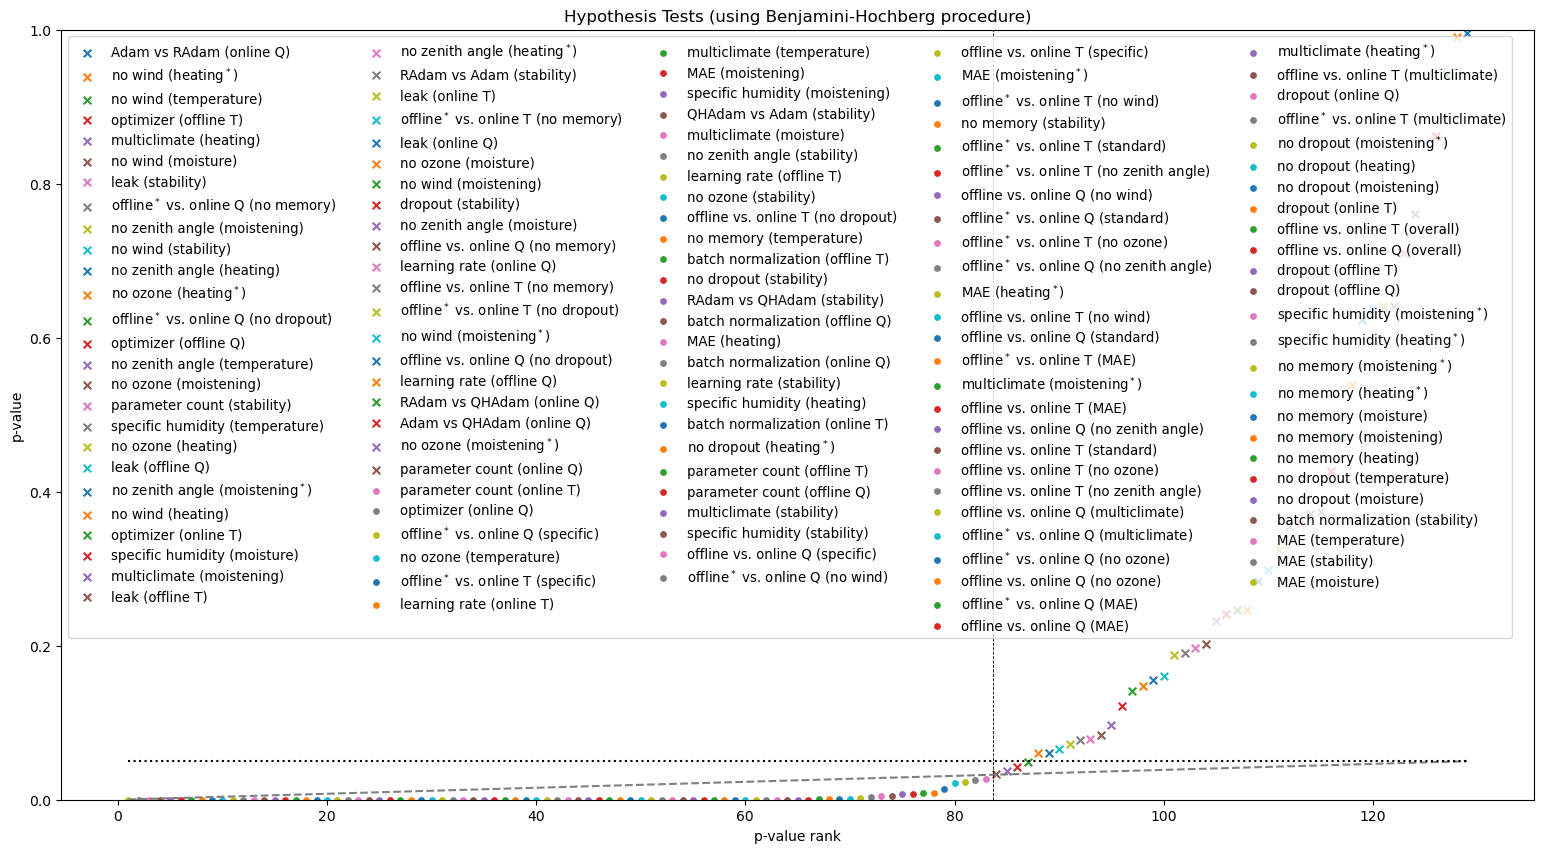

In [23]:
plt.figure(figsize=(19, 10))
x_range = range(1, num_tests + 1)
plt.plot(x_range, alpha_scaled, color = 'grey', linestyle = '--')
plt.plot(x_range, [alpha_global for x in range(num_tests)], color = 'black', linestyle = ':')
plt.ylim(0, 1)
plt.xlabel('p-value rank')
plt.ylabel('p-value')
crossed = False
handles = []
for rank, pval, test in reversed(list(zip(x_range, sorted_pvals, sorted_tests))):
    if pval >= alpha_scaled[rank - 1] and not crossed:
        handle = plt.scatter(rank, pval, s = 30, marker = 'x', label = test)
        handles.append(handle)
    elif pval < alpha_scaled[rank - 1]:
        crossed = True
        handle = plt.scatter(rank, pval, s = 60, marker = '.', label = test)
        handles.append(handle)
plt.axvline(x = 83.7, linestyle = '--', linewidth = .6, color = 'black')
plt.legend(loc = 'upper left', handles = handles, ncol = 5, fontsize = 9.6)
plt.title('Hypothesis Tests (using Benjamini-Hochberg procedure)')

In [24]:
print('survival')
print(len(survived_dict['standard'])/330)
print(len(survived_dict['specific'])/330 - len(survived_dict['standard'])/330, stability_ablation_pvals[0] < .05)
print(len(survived_dict['nomemory'])/330 - len(survived_dict['standard'])/330, stability_ablation_pvals[1] < .05)
print(len(survived_dict['nowind'])/330 - len(survived_dict['standard'])/330, stability_ablation_pvals[2] < .05)
print(len(survived_dict['noozone'])/330 - len(survived_dict['standard'])/330, stability_ablation_pvals[3] < .05)
print(len(survived_dict['nocoszrs'])/330 - len(survived_dict['standard'])/330, stability_ablation_pvals[4] < .05)
print(len(survived_dict['mae'])/330 - len(survived_dict['standard'])/330, stability_ablation_pvals[5] < .05)
print(len(survived_dict['nodropout'])/330 - len(survived_dict['standard'])/330, stability_ablation_pvals[6] < .05)
print(len(survived_dict['multiclimate'])/330 - len(survived_dict['standard'])/330, stability_ablation_pvals[7] < .05)

survival
0.42727272727272725
-0.2606060606060606 True
-0.32727272727272727 True
0.018181818181818188 False
0.1333333333333333 True
0.11212121212121218 True
0.3242424242424242 True
-0.1424242424242424 True
0.2727272727272727 True


In [25]:
print('online error (K)')
print(np.median(survived_dict['standard']['online_temperature']))
print(np.median(survived_dict['specific']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), temperature_pvals[0] < .05)
print(np.median(survived_dict['nomemory']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), temperature_pvals[1] < .05)
print(np.median(survived_dict['nowind']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), temperature_pvals[2] < .05)
print(np.median(survived_dict['noozone']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), temperature_pvals[3] < .05)
print(np.median(survived_dict['nocoszrs']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), temperature_pvals[4] < .05)
print(np.median(survived_dict['mae']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), temperature_pvals[5] < .05)
print(np.median(survived_dict['nodropout']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), temperature_pvals[6] < .05)
print(np.median(survived_dict['multiclimate']['online_temperature']) - np.median(survived_dict['standard']['online_temperature']), temperature_pvals[7] < .05)

online error (K)
3.4780082804404766
0.12914702347090223 False
0.8003082017706524 True
-0.004295516229865903 False
0.21153035298171918 True
-0.1420046011551439 False
1.1631363874347236 True
-0.9669908030712429 True
-0.23700296615562344 True


In [26]:
print('online error (g/kg)')
print(np.median(survived_dict['standard']['online_moisture']))
print(np.median(survived_dict['specific']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), moisture_pvals[0] < .05)
print(np.median(survived_dict['nomemory']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), moisture_pvals[1] < .05)
print(np.median(survived_dict['nowind']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), moisture_pvals[2] < .05)
print(np.median(survived_dict['noozone']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), moisture_pvals[3] < .05)
print(np.median(survived_dict['nocoszrs']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), moisture_pvals[4] < .05)
print(np.median(survived_dict['mae']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), moisture_pvals[5] < .05)
print(np.median(survived_dict['nodropout']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), moisture_pvals[6] < .05)
print(np.median(survived_dict['multiclimate']['online_moisture']) - np.median(survived_dict['standard']['online_moisture']), moisture_pvals[7] < .05)

online error (g/kg)
0.4226935787467443
0.03248380676971424 False
0.24626014591345136 True
-0.003886166129508428 False
0.0353588123285733 False
-0.0357015203739367 False
0.3356690348474941 True
-0.08502207684522423 True
-0.05349891200375928 True


In [27]:
print('offline error (K/day)')
print(np.mean(standard_model_info['offline_heating']))
print(np.mean(specific_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), heating_pvals[0] < .05)
print(np.mean(nomemory_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), heating_pvals[1] < .05)
print(np.mean(nowind_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), heating_pvals[2] < .05)
print(np.mean(noozone_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), heating_pvals[3] < .05)
print(np.mean(nocoszrs_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), heating_pvals[4] < .05)
print(np.mean(mae_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), heating_pvals[5] < .05)
print(np.mean(nodropout_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), heating_pvals[6] < .05)
print(np.mean(multiclimate_model_info['offline_heating']) - np.mean(standard_model_info['offline_heating']), heating_pvals[7] < .05)

offline error (K/day)
1.9298983889166266
0.028779023559764028 True
0.5674592875981364 True
0.005255769514902031 False
0.004431993213736218 False
0.0022596620361914344 False
-0.022605283725583458 True
-0.07652693597430527 True
-0.000903203406117159 False


In [28]:
print('offline error (g/kg/day)')
print(np.mean(standard_model_info['offline_moistening']))
print(np.mean(specific_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), moistening_pvals[0] < .05)
print(np.mean(nomemory_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), moistening_pvals[1] < .05)
print(np.mean(nowind_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), moistening_pvals[2] < .05)
print(np.mean(noozone_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), moistening_pvals[3] < .05)
print(np.mean(nocoszrs_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), moistening_pvals[4] < .05)
print(np.mean(mae_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), moistening_pvals[5] < .05)
print(np.mean(nodropout_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), moistening_pvals[6] < .05)
print(np.mean(multiclimate_model_info['offline_moistening']) - np.mean(standard_model_info['offline_moistening']), moistening_pvals[7] < .05)

offline error (g/kg/day)
1.7632746091112494
0.007890034996142381 True
0.2556914173659277 True
0.0041206859962337195 False
0.002517276972701543 False
0.0013387847204946457 False
-0.009521116682497555 True
-0.05449874390085996 True
-0.003601525677368045 False


In [29]:
print('offline online T error rank correlation')
print(standard_T_corr, standard_T_pval < .05)
print(specific_T_corr, specific_T_pval < .05)
print(nomemory_T_corr, nomemory_T_pval < .05)
print(nowind_T_corr, nowind_T_pval < .05)
print(noozone_T_corr, noozone_T_pval < .05)
print(nocoszrs_T_corr, nocoszrs_T_pval < .05)
print(mae_T_corr, mae_T_pval < .05)
print(nodropout_T_corr, nodropout_T_pval < .05)
print(multiclimate_T_corr, multiclimate_T_pval < .05)

offline online T error rank correlation
0.8551778757652296 True
0.8340548340548343 True
0.3114973262032086 False
0.7894052845129167 True
0.8032371782722414 True
0.8286040754142068 True
0.7061913580926815 True
0.3532059386627172 True
0.8579927568683191 True


In [30]:
print('offline online Q error rank correlation')
print(standard_Q_corr, standard_Q_pval < .05)
print(specific_Q_corr, specific_Q_pval < .05)
print(nomemory_Q_corr, nomemory_Q_pval < .05)
print(nowind_Q_corr, nowind_Q_pval < .05)
print(noozone_Q_corr, noozone_Q_pval < .05)
print(nocoszrs_Q_corr, nocoszrs_Q_pval < .05)
print(mae_Q_corr, mae_Q_pval < .05)
print(nodropout_Q_corr, nodropout_Q_pval < .05)
print(multiclimate_Q_corr, multiclimate_Q_pval < .05)

offline online Q error rank correlation
0.8114260028254633 True
0.8062770562770565 True
0.3058155080213904 False
0.7162728845703406 True
0.8473958530760776 True
0.7982996588040161 True
0.7898851511570638 True
0.19385904706859808 False
0.7728752506863452 True


In [31]:
print('offline error multiclimate (K/day)')
print(np.mean(standard_model_info['offline_heating_multi']))
print(np.mean(specific_model_info['offline_heating_multi']) - np.mean(standard_model_info['offline_heating_multi']), heating_multi_pvals[0] < .05)
print(np.mean(nomemory_model_info['offline_heating_multi']) - np.mean(standard_model_info['offline_heating_multi']), heating_multi_pvals[1] < .05)
print(np.mean(nowind_model_info['offline_heating_multi']) - np.mean(standard_model_info['offline_heating_multi']), heating_multi_pvals[2] < .05)
print(np.mean(noozone_model_info['offline_heating_multi']) - np.mean(standard_model_info['offline_heating_multi']), heating_multi_pvals[3] < .05)
print(np.mean(nocoszrs_model_info['offline_heating_multi']) - np.mean(standard_model_info['offline_heating_multi']), heating_multi_pvals[4] < .05)
print(np.mean(mae_model_info['offline_heating_multi']) - np.mean(standard_model_info['offline_heating_multi']), heating_multi_pvals[5] < .05)
print(np.mean(nodropout_model_info['offline_heating_multi']) - np.mean(standard_model_info['offline_heating_multi']), heating_multi_pvals[6] < .05)
print(np.mean(multiclimate_model_info['offline_heating_multi']) - np.mean(standard_model_info['offline_heating_multi']), heating_multi_pvals[7] < .05)

offline error multiclimate (K/day)
2.0374581498220903
1.537269630141302 True
0.8717621662865644 True
5.428234792548281e-05 False
0.00258644529491292 False
0.005608968627215827 False
-0.05746836551803769 True
-0.025896064630201554 True
-0.08415576134046376 True


In [32]:
print('offline error multiclimate (g/kg/day)')
print(np.mean(standard_model_info['offline_moistening_multi']))
print(np.mean(specific_model_info['offline_moistening_multi']) - np.mean(standard_model_info['offline_moistening_multi']), moistening_multi_pvals[0] < .05)
print(np.mean(nomemory_model_info['offline_moistening_multi']) - np.mean(standard_model_info['offline_moistening_multi']), moistening_multi_pvals[1] < .05)
print(np.mean(nowind_model_info['offline_moistening_multi']) - np.mean(standard_model_info['offline_moistening_multi']), moistening_multi_pvals[2] < .05)
print(np.mean(noozone_model_info['offline_moistening_multi']) - np.mean(standard_model_info['offline_moistening_multi']), moistening_multi_pvals[3] < .05)
print(np.mean(nocoszrs_model_info['offline_moistening_multi']) - np.mean(standard_model_info['offline_moistening_multi']), moistening_multi_pvals[4] < .05)
print(np.mean(mae_model_info['offline_moistening_multi']) - np.mean(standard_model_info['offline_moistening_multi']), moistening_multi_pvals[5] < .05)
print(np.mean(nodropout_model_info['offline_moistening_multi']) - np.mean(standard_model_info['offline_moistening_multi']), moistening_multi_pvals[6] < .05)
print(np.mean(multiclimate_model_info['offline_moistening_multi']) - np.mean(standard_model_info['offline_moistening_multi']), moistening_multi_pvals[7] < .05)

offline error multiclimate (g/kg/day)
1.854181266231039
0.39273071700749407 True
0.39464787924027256 True
0.004446170059964061 False
-0.005338446036065925 True
0.0026723436101085962 False
-0.02580055474854004 True
0.07773153213995765 True
-0.040539322336289096 True


In [33]:
print('offline online multiclimate T error rank correlation')
print(standard_T_multi_corr, standard_T_multi_pval < .05)
print(specific_T_multi_corr, specific_T_multi_pval < .05)
print(nomemory_T_multi_corr, nomemory_T_multi_pval < .05)
print(nowind_T_multi_corr, nowind_T_multi_pval < .05)
print(noozone_T_multi_corr, noozone_T_multi_pval < .05)
print(nocoszrs_T_multi_corr, nocoszrs_T_multi_pval < .05)
print(mae_T_multi_corr, mae_T_multi_pval < .05)
print(nodropout_T_multi_corr, nodropout_T_multi_pval < .05)
print(multiclimate_T_multi_corr, multiclimate_T_multi_pval < .05)

offline online multiclimate T error rank correlation
0.6975812320732907 True
0.330880230880231 True
0.25 False
0.6235294562104738 True
0.6981274402031766 True
0.6589465800076388 True
0.6881647000697055 True
0.18608532312249396 False
0.8597938043965031 True


In [34]:
print('offline online multiclimate Q error rank correlation')
print(standard_Q_multi_corr, standard_Q_multi_pval < .05)
print(specific_Q_multi_corr, specific_Q_multi_pval < .05)
print(nomemory_Q_multi_corr, nomemory_Q_multi_pval < .05)
print(nowind_Q_multi_corr, nowind_Q_multi_pval < .05)
print(noozone_Q_multi_corr, noozone_Q_multi_pval < .05)
print(nocoszrs_Q_multi_corr, nocoszrs_Q_multi_pval < .05)
print(mae_Q_multi_corr, mae_Q_multi_pval < .05)
print(nodropout_Q_multi_corr, nodropout_Q_multi_pval < .05)
print(multiclimate_Q_multi_corr, multiclimate_Q_multi_pval < .05)

offline online multiclimate Q error rank correlation
0.7342994135022902 True
0.3054834054834056 True
0.08422459893048129 False
0.5849571965031847 True
0.845542246313635 True
0.7084013792531139 True
0.7831427577883691 True
0.07523028573492757 False
0.774363792129909 True


In [63]:
def get_median_error(error_dict):
    median_error = []
    for month in range(12):
        median_error.append(np.nanmedian([error_dict[x][month] if len(error_dict[x])>month else np.nan for x in range(1,331)]))
    return np.array(median_error)

def get_mean_error(error_dict):
    mean_error = []
    for month in range(12):
        mean_error.append(np.nanmean([error_dict[x][month] if len(error_dict[x])>month else np.nan for x in range(1,331)]))
    return np.array(mean_error)

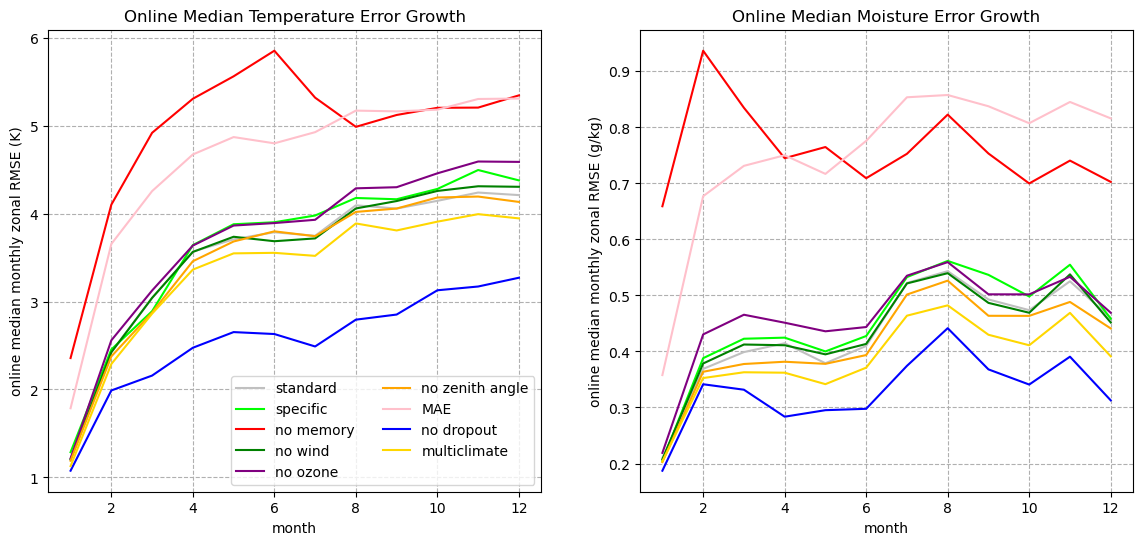

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(np.arange(1,13), get_median_error(standard_prognostic_T), label = 'standard', color = color_dict['standard'])
ax1.plot(np.arange(1,13), get_median_error(specific_prognostic_T), label = 'specific', color = color_dict['specific'])
ax1.plot(np.arange(1,13), get_median_error(nomemory_prognostic_T), label = 'no memory', color = color_dict['nomemory'])
ax1.plot(np.arange(1,13), get_median_error(nowind_prognostic_T), label = 'no wind', color = color_dict['nowind'])
ax1.plot(np.arange(1,13), get_median_error(noozone_prognostic_T), label = 'no ozone', color = color_dict['noozone'])
ax1.plot(np.arange(1,13), get_median_error(nocoszrs_prognostic_T), label = 'no zenith angle', color = color_dict['nocoszrs'])
ax1.plot(np.arange(1,13), get_median_error(mae_prognostic_T), label = 'MAE', color = color_dict['mae'])
ax1.plot(np.arange(1,13), get_median_error(nodropout_prognostic_T), label = 'no dropout', color = color_dict['nodropout'])
ax1.plot(np.arange(1,13), get_median_error(multiclimate_prognostic_T), label = 'multiclimate', color = color_dict['multiclimate'])
ax1.set_xlabel('month')
ax1.legend(ncol = 2)
ax1.set_ylabel('online median monthly zonal RMSE (K)')
ax1.set_title('Online Median Temperature Error Growth')

ax2.plot(np.arange(1,13), get_median_error(standard_prognostic_Q), label = 'standard', color = color_dict['standard'])
ax2.plot(np.arange(1,13), get_median_error(specific_prognostic_Q), label = 'specific', color = color_dict['specific'])
ax2.plot(np.arange(1,13), get_median_error(nomemory_prognostic_Q), label = 'no memory', color = color_dict['nomemory'])
ax2.plot(np.arange(1,13), get_median_error(nowind_prognostic_Q), label = 'no wind', color = color_dict['nowind'])
ax2.plot(np.arange(1,13), get_median_error(noozone_prognostic_Q), label = 'no ozone', color = color_dict['noozone'])
ax2.plot(np.arange(1,13), get_median_error(nocoszrs_prognostic_Q), label = 'no zenith angle', color = color_dict['nocoszrs'])
ax2.plot(np.arange(1,13), get_median_error(mae_prognostic_Q), label = 'MAE', color = color_dict['mae'])
ax2.plot(np.arange(1,13), get_median_error(nodropout_prognostic_Q), label = 'no dropout', color = color_dict['nodropout'])
ax2.plot(np.arange(1,13), get_median_error(multiclimate_prognostic_Q), label = 'multiclimate', color = color_dict['multiclimate'])
ax2.set_xlabel('month')
ax2.set_ylabel('online median monthly zonal RMSE (g/kg)')
ax2.set_title('Online Median Moisture Error Growth')

ax1.grid(True, ls="--")
ax2.grid(True, ls="--")


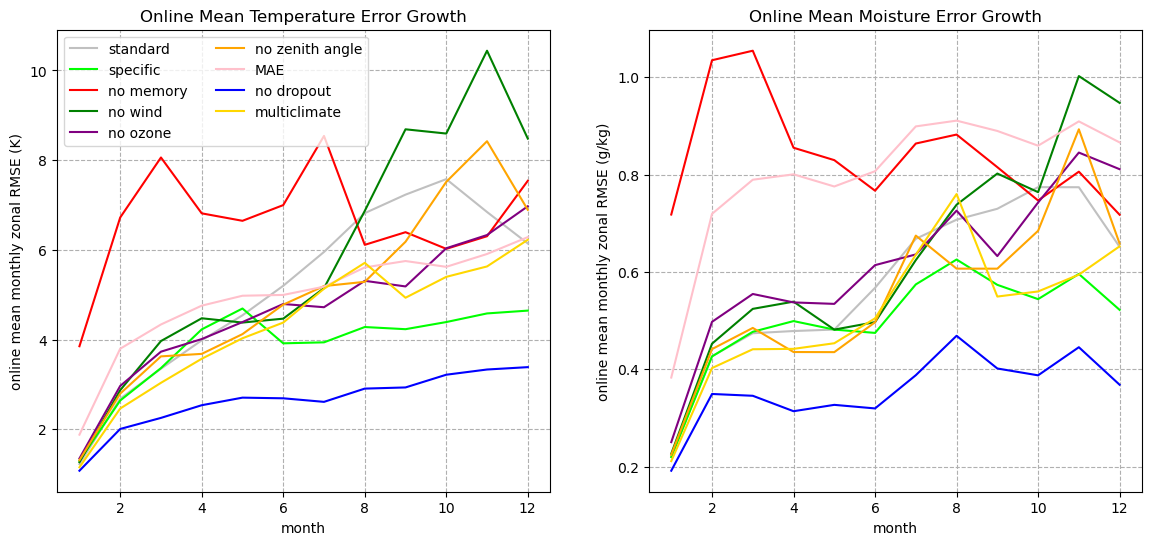

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(np.arange(1,13), get_mean_error(standard_prognostic_T), label = 'standard', color = color_dict['standard'])
ax1.plot(np.arange(1,13), get_mean_error(specific_prognostic_T), label = 'specific', color = color_dict['specific'])
ax1.plot(np.arange(1,13), get_mean_error(nomemory_prognostic_T), label = 'no memory', color = color_dict['nomemory'])
ax1.plot(np.arange(1,13), get_mean_error(nowind_prognostic_T), label = 'no wind', color = color_dict['nowind'])
ax1.plot(np.arange(1,13), get_mean_error(noozone_prognostic_T), label = 'no ozone', color = color_dict['noozone'])
ax1.plot(np.arange(1,13), get_mean_error(nocoszrs_prognostic_T), label = 'no zenith angle', color = color_dict['nocoszrs'])
ax1.plot(np.arange(1,13), get_mean_error(mae_prognostic_T), label = 'MAE', color = color_dict['mae'])
ax1.plot(np.arange(1,13), get_mean_error(nodropout_prognostic_T), label = 'no dropout', color = color_dict['nodropout'])
ax1.plot(np.arange(1,13), get_mean_error(multiclimate_prognostic_T), label = 'multiclimate', color = color_dict['multiclimate'])
ax1.set_xlabel('month')
ax1.legend(ncol = 2)
ax1.set_ylabel('online mean monthly zonal RMSE (K)')
ax1.set_title('Online Mean Temperature Error Growth')

ax2.plot(np.arange(1,13), get_mean_error(standard_prognostic_Q), label = 'standard', color = color_dict['standard'])
ax2.plot(np.arange(1,13), get_mean_error(specific_prognostic_Q), label = 'specific', color = color_dict['specific'])
ax2.plot(np.arange(1,13), get_mean_error(nomemory_prognostic_Q), label = 'no memory', color = color_dict['nomemory'])
ax2.plot(np.arange(1,13), get_mean_error(nowind_prognostic_Q), label = 'no wind', color = color_dict['nowind'])
ax2.plot(np.arange(1,13), get_mean_error(noozone_prognostic_Q), label = 'no ozone', color = color_dict['noozone'])
ax2.plot(np.arange(1,13), get_mean_error(nocoszrs_prognostic_Q), label = 'no zenith angle', color = color_dict['nocoszrs'])
ax2.plot(np.arange(1,13), get_mean_error(mae_prognostic_Q), label = 'MAE', color = color_dict['mae'])
ax2.plot(np.arange(1,13), get_mean_error(nodropout_prognostic_Q), label = 'no dropout', color = color_dict['nodropout'])
ax2.plot(np.arange(1,13), get_mean_error(multiclimate_prognostic_Q), label = 'multiclimate', color = color_dict['multiclimate'])
ax2.set_xlabel('month')
ax2.set_ylabel('online mean monthly zonal RMSE (g/kg)')
ax2.set_title('Online Mean Moisture Error Growth')

ax1.grid(True, ls="--")
ax2.grid(True, ls="--")


In [66]:
standard_bn_true_idx = standard_model_info[standard_model_info['batch_normalization']==True].index
standard_bn_false_idx = standard_model_info[standard_model_info['batch_normalization']==False].index
specific_bn_true_idx = specific_model_info[specific_model_info['batch_normalization']==True].index
specific_bn_false_idx = specific_model_info[specific_model_info['batch_normalization']==False].index
nomemory_bn_true_idx = nomemory_model_info[nomemory_model_info['batch_normalization']==True].index
nomemory_bn_false_idx = nomemory_model_info[nomemory_model_info['batch_normalization']==False].index
nowind_bn_true_idx = nowind_model_info[nowind_model_info['batch_normalization']==True].index
nowind_bn_false_idx = nowind_model_info[nowind_model_info['batch_normalization']==False].index
noozone_bn_true_idx = noozone_model_info[noozone_model_info['batch_normalization']==True].index
noozone_bn_false_idx = noozone_model_info[noozone_model_info['batch_normalization']==False].index
nocoszrs_bn_true_idx = nocoszrs_model_info[nocoszrs_model_info['batch_normalization']==True].index
nocoszrs_bn_false_idx = nocoszrs_model_info[nocoszrs_model_info['batch_normalization']==False].index
mae_bn_true_idx = mae_model_info[mae_model_info['batch_normalization']==True].index
mae_bn_false_idx = mae_model_info[mae_model_info['batch_normalization']==False].index
nodropout_bn_true_idx = nodropout_model_info[nodropout_model_info['batch_normalization']==True].index
nodropout_bn_false_idx = nodropout_model_info[nodropout_model_info['batch_normalization']==False].index
multiclimate_bn_true_idx = multiclimate_model_info[multiclimate_model_info['batch_normalization']==True].index
multiclimate_bn_false_idx = multiclimate_model_info[multiclimate_model_info['batch_normalization']==False].index

bn_T_true = [standard_prognostic_T[x] for x in standard_bn_true_idx] + \
            [specific_prognostic_T[x] for x in specific_bn_true_idx] + \
            [nomemory_prognostic_T[x] for x in nomemory_bn_true_idx] + \
            [nowind_prognostic_T[x] for x in nowind_bn_true_idx] + \
            [noozone_prognostic_T[x] for x in noozone_bn_true_idx] + \
            [nocoszrs_prognostic_T[x] for x in nocoszrs_bn_true_idx] + \
            [mae_prognostic_T[x] for x in mae_bn_true_idx] + \
            [nodropout_prognostic_T[x] for x in nodropout_bn_true_idx] + \
            [multiclimate_prognostic_T[x] for x in multiclimate_bn_true_idx]

bn_T_false = [standard_prognostic_T[x] for x in standard_bn_false_idx] + \
             [specific_prognostic_T[x] for x in specific_bn_false_idx] + \
             [nomemory_prognostic_T[x] for x in nomemory_bn_false_idx] + \
             [nowind_prognostic_T[x] for x in nowind_bn_false_idx] + \
             [noozone_prognostic_T[x] for x in noozone_bn_false_idx] + \
             [nocoszrs_prognostic_T[x] for x in nocoszrs_bn_false_idx] + \
             [mae_prognostic_T[x] for x in mae_bn_false_idx] + \
             [nodropout_prognostic_T[x] for x in nodropout_bn_false_idx] + \
             [multiclimate_prognostic_T[x] for x in multiclimate_bn_false_idx]

bn_Q_true = [standard_prognostic_Q[x] for x in standard_bn_true_idx] + \
            [specific_prognostic_Q[x] for x in specific_bn_true_idx] + \
            [nomemory_prognostic_Q[x] for x in nomemory_bn_true_idx] + \
            [nowind_prognostic_Q[x] for x in nowind_bn_true_idx] + \
            [noozone_prognostic_Q[x] for x in noozone_bn_true_idx] + \
            [nocoszrs_prognostic_Q[x] for x in nocoszrs_bn_true_idx] + \
            [mae_prognostic_Q[x] for x in mae_bn_true_idx] + \
            [nodropout_prognostic_Q[x] for x in nodropout_bn_true_idx] + \
            [multiclimate_prognostic_Q[x] for x in multiclimate_bn_true_idx]

bn_Q_false = [standard_prognostic_Q[x] for x in standard_bn_false_idx] + \
             [specific_prognostic_Q[x] for x in specific_bn_false_idx] + \
             [nomemory_prognostic_Q[x] for x in nomemory_bn_false_idx] + \
             [nowind_prognostic_Q[x] for x in nowind_bn_false_idx] + \
             [noozone_prognostic_Q[x] for x in noozone_bn_false_idx] + \
             [nocoszrs_prognostic_Q[x] for x in nocoszrs_bn_false_idx] + \
             [mae_prognostic_Q[x] for x in mae_bn_false_idx] + \
             [nodropout_prognostic_Q[x] for x in nodropout_bn_false_idx] + \
             [multiclimate_prognostic_Q[x] for x in multiclimate_bn_false_idx]

def get_mean_error_list(error_list):
    mean_error = []
    for month in range(12):
        mean_error.append(np.nanmean([error_list[x][month] if len(error_list[x])>month else np.nan for x in range(len(error_list))]))
    return np.array(mean_error)

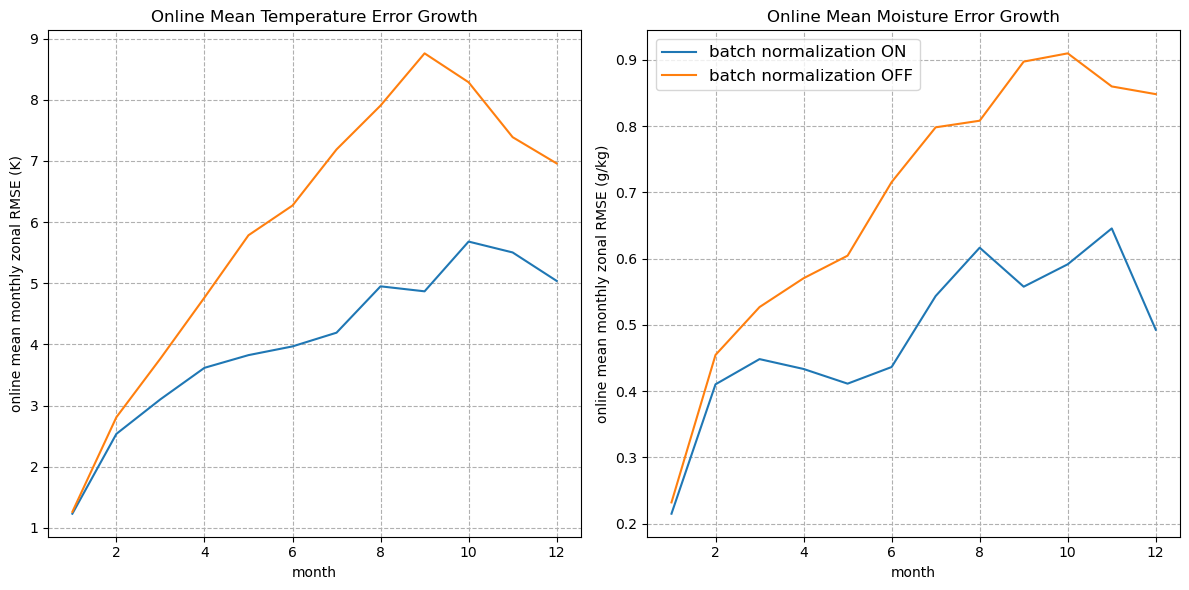

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(np.arange(1,13), get_mean_error(bn_T_true), label='batch normalization ON')
axs[0].plot(np.arange(1,13), get_mean_error(bn_T_false), label='batch normalization OFF')
axs[0].grid(True, ls="--")
axs[0].set_xlabel('month')
axs[0].set_ylabel('online mean monthly zonal RMSE (K)')
axs[0].set_title('Online Mean Temperature Error Growth')

axs[1].plot(np.arange(1,13), get_mean_error(bn_Q_true), label='batch normalization ON')
axs[1].plot(np.arange(1,13), get_mean_error(bn_Q_false), label='batch normalization OFF')
axs[1].grid(True, ls="--")
axs[1].legend(fontsize = 12)
axs[1].set_xlabel('month')
axs[1].set_ylabel('online mean monthly zonal RMSE (g/kg)')
axs[1].set_title('Online Mean Moisture Error Growth')

plt.tight_layout()
plt.show()

# Sample size estimation

In [69]:
# def getpower(baseline_arr, loc_shift, sample_size, num_iter = 10000):
#     num_reject = 0
#     for i in range(num_iter):
#         bootstrap = baseline_arr.sample(sample_size*2, replace = True)
#         bootstrap[sample_size:] = bootstrap[sample_size:] + loc_shift
#         stat, pvalue = ranksums(bootstrap[:sample_size], bootstrap[sample_size:])
#         if pvalue < 0.05:
#             num_reject += 1
#     return num_reject/num_iter

# mann whitney approach
loc_shift = np.median(survived_dict['noozone']['online_temperature']) - np.median(survived_dict['standard']['online_temperature'])
ustat, u_pval = mannwhitneyu(survived_dict['standard']['online_temperature'], survived_dict['standard']['online_temperature'] + loc_shift)
math.ceil(math.ceil(((norm.ppf(.8) + norm.ppf(.95))**2)/(6*(((ustat/(141*141))-.5)**2)))*(330/141))

384

In [70]:
ustat

8363.0

# Zonal mean eval

In [71]:
sp_path = '/ocean/projects/atm200007p/jlin96/longSPrun_clean/trim_dir/trimmed/'
sp_list = os.popen(" ".join(["ls", sp_path + "*.h1.0000*"])).read().splitlines()
sp_data = xr.open_mfdataset(sp_list)
sp_temp = sp_data['NNTBSP'].mean(dim = ['time', 'lon'])
sp_hum = sp_data['NNQBSP'].mean(dim = ['time', 'lon'])*1000
X, Y = np.meshgrid(np.sin(sp_data["lat"]*np.pi/180), np.array(range(30)))
pressure_grid = sp_data['P0']*sp_data['hyam'] + sp_data['hybm']*sp_data['NNPSBSP']
Y = pressure_grid.mean(dim = ['lon', 'time']).values/100

def plot_zonal_diff(survived_dict, var = 'NNTBSP', figsize = (10,20)):
    fig, ax = plt.subplots(nrows=len(survived_dict), ncols=5, figsize=figsize,
                         gridspec_kw={'width_ratios': [1, 1, 1, 1, 1.2]})
    for i, config in enumerate(survived_dict):
        if var == 'NNTBSP':
            ranks = survived_dict[config]['online_temperature'].sort_values().head().index
        elif var == 'NNQBSP':
            ranks = survived_dict[config]['online_moisture'].sort_values().head().index
        for j in range(5):
            model_rank = str(ranks[j]).zfill(3)
            nn_path = '/ocean/projects/atm200007p/jlin96/nnspreadtesting_good/{}/coupled_results/{}_model_{}/'.format(config, config, model_rank)
            nn_list = os.popen(" ".join(["ls", nn_path + "*.h1.0000*"])).read().splitlines()
            nn_data = xr.open_mfdataset(nn_list)
            if var == 'NNTBSP':
                nn_var = nn_data['NNTBSP'].mean(dim = ['time', 'lon'])
                sp_var = sp_temp
                vmin = -5
                vmax = 5
                var_title = 'Zonal mean temperature difference in (K)'
                cmap = 'bwr'
            elif var == 'NNQBSP':
                nn_var = nn_data['NNQBSP'].mean(dim = ['time', 'lon'])*1000
                sp_var = sp_hum
                vmin = -2
                vmax = 2
                var_title = 'Zonal mean humidity difference in (g/kg)'
                cmap = 'BrBG'
            axi = ax[i,j]
            pcm = axi.pcolormesh(X, Y, nn_var - sp_var, cmap = cmap, vmin = vmin, vmax = vmax)
            if i == 0:
                axi.set_title('Rank #{}'.format(j+1), fontsize = 12)
            if i == len(survived_dict)-1:
                axi.set_xticks([np.sin(-50/180*np.pi), 0, np.sin(50/180*np.pi)], ['50$^\circ$S', '0$^\circ$', '50$^\circ$N'])
                axi.set_xlabel('latitude')
            else:
                axi.set_xticks([])
            if j == 0:
                axi.set_ylabel("{} \n \n Pressure (hPa)".format(label_dict[config]))
            else:
                axi.set_yticks([])
            if j == 4:
                fig.colorbar(pcm, ax = axi)
            axi.set_ylim(axi.get_ylim()[::-1])
    if var == 'NNTBSP':
        var_name = 'temperature'
    else:
        var_name = 'moisture'
    fig.suptitle('Zonal mean {} difference (emulator - SP)'.format(var_name))
    plt.subplots_adjust(top=0.92)
    
def showplots(config, model_info, var = "NNTBSP"):
    if var == 'NNTBSP':
        ranks = model_info[model_info['num_months']==12]['online_temperature'].sort_values().head().index
    elif var == 'NNQBSP':
        ranks = model_info[model_info['num_months']==12]['online_moisture'].sort_values().head().index
    for rank in ranks:
        plot_zonal_diff(config, rank, var)

/var/tmp/ipykernel_85000/1660439861.py:38: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = axi.pcolormesh(X, Y, nn_var - sp_var, cmap = cmap, vmin = vmin, vmax = vmax)
/var/tmp/ipykernel_85000/1660439861.py:38: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = axi.pcolormesh(X, Y, nn_var - sp_var, cmap = cmap, vmin = vmin, vmax = vmax)
/var/tmp/ipykernel_85000/1660439861.py:38: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, 

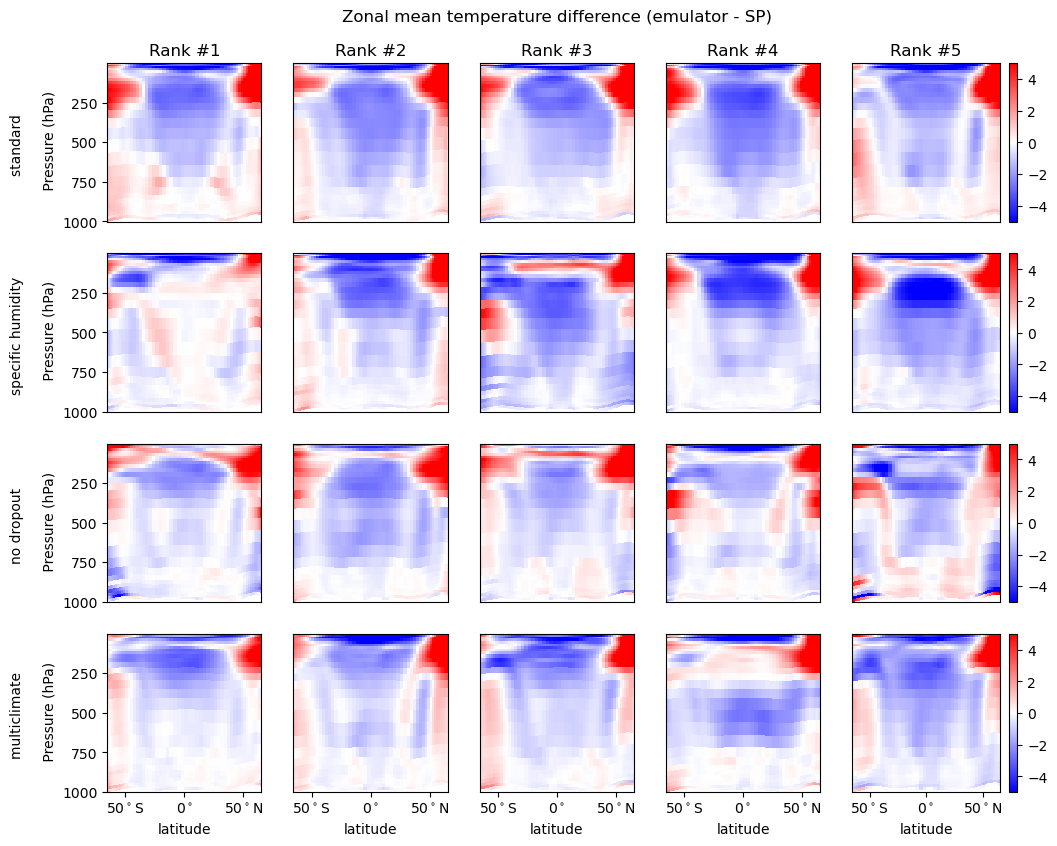

In [72]:
rel_configs = ['standard', 'specific', 'nodropout', 'multiclimate']
subset_dict = {config: survived_dict[config] for config in rel_configs}
plot_zonal_diff(subset_dict, figsize = (12, 9))